In [1]:
#Import some packages for visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fname = 'data/dry_eye_disease_parsed.csv'
df0 = pd.read_csv(fname)

In [3]:
df = df0.copy()
# Print the info of the datasets
df.describe()

age  sleep_duration  sleep_quality  stress_level  \
count  20000.000000    20000.000000   20000.000000  20000.000000   
mean      31.422800        6.998245       2.997250      2.993750   
std        8.103717        1.731723       1.412283      1.407235   
min       18.000000        4.000000       1.000000      1.000000   
25%       24.000000        5.500000       2.000000      2.000000   
50%       31.000000        7.000000       3.000000      3.000000   
75%       39.000000        8.500000       4.000000      4.000000   
max       45.000000       10.000000       5.000000      5.000000   

         heart_rate   daily_steps  physical_activity        height  \
count  20000.000000  20000.000000       20000.000000  20000.000000   
mean      79.912200  10536.900000          90.069750    174.865900   
std       11.808279   5752.729186          52.317283     14.719903   
min       60.000000   1000.000000           0.000000    150.000000   
25%       70.000000   6000.000000          45.000000    162.000000   
50%       80.000000  11000.000000          91.000000    175.000000   
75%       90.000000  16000.000000         135.000000    188.000000   
max      100.000000  20000.000000         180.000000    200.000000   

             weight  average_screen_time      systolic     diastolic  
count  20000.000000         20000.000000  20000.000000  20000.000000  
mean      74.891850             5.519885    114.985450     74.999300  
std       14.733839             2.606305     14.725589      8.975034  
min       50.000000             1.000000     90.000000     60.000000  
25%       62.000000             3.300000    102.000000     67.000000  
50%       75.000000             5.500000    115.000000     75.000000  
75%       88.000000             7.800000    128.000000     83.000000  
max      100.000000            10.000000    140.000000     90.000000

In [4]:
%run 'data/utils.py'
%run 'data/features_list.py'

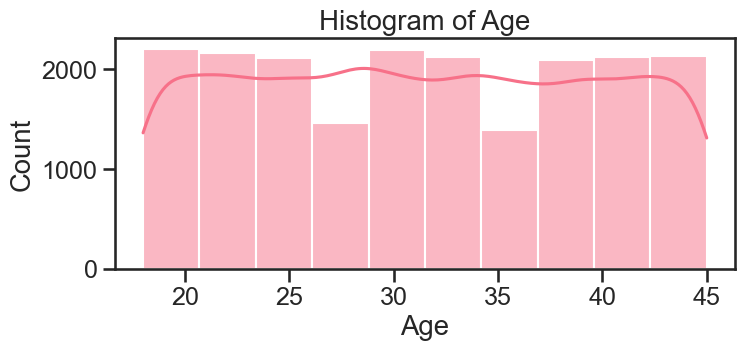

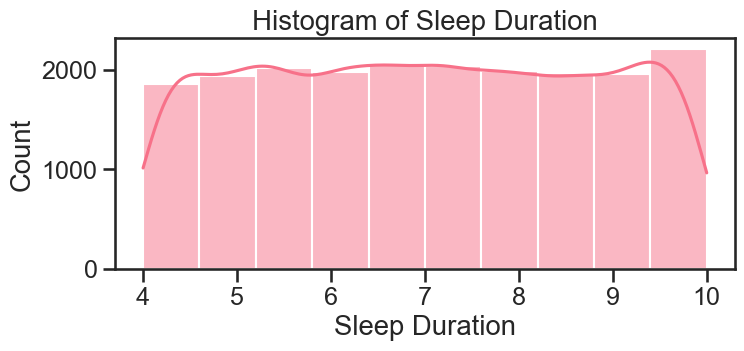

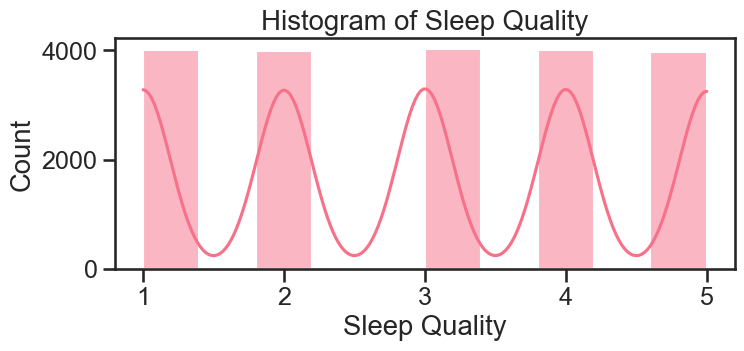

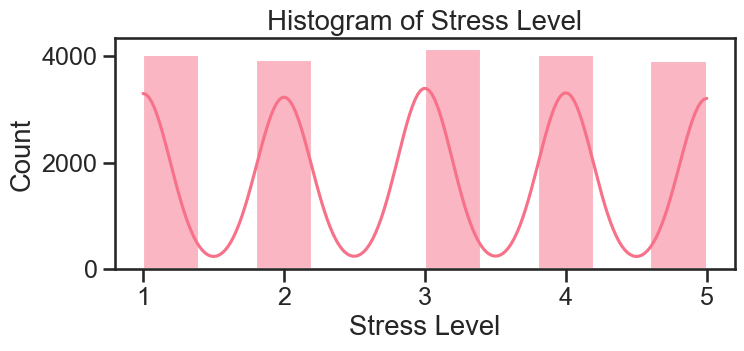

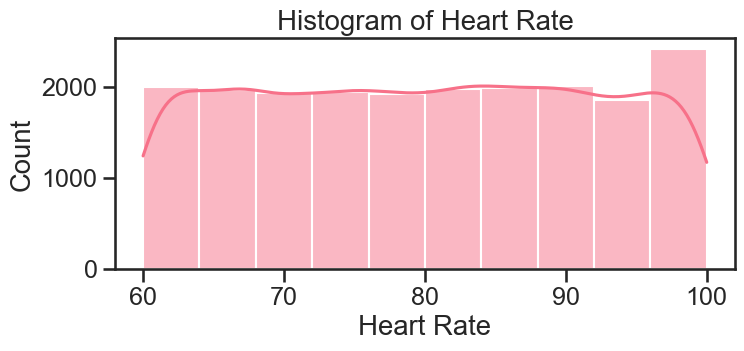

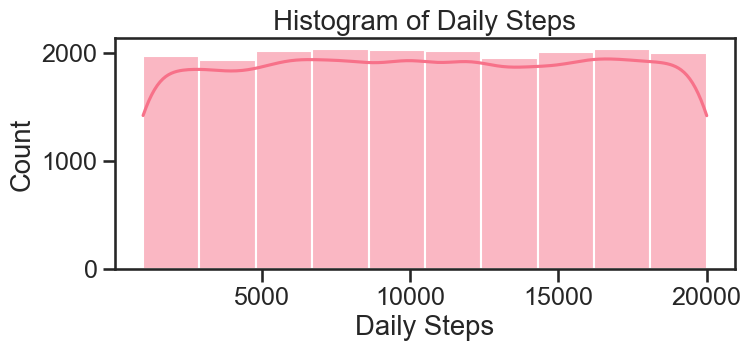

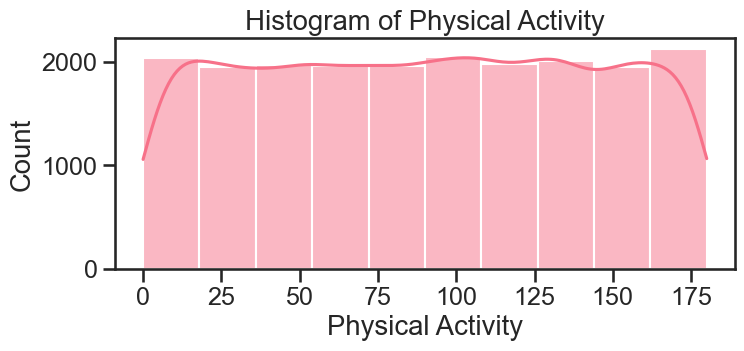

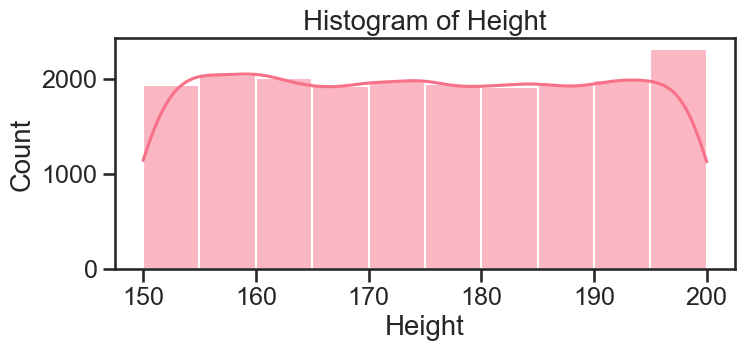

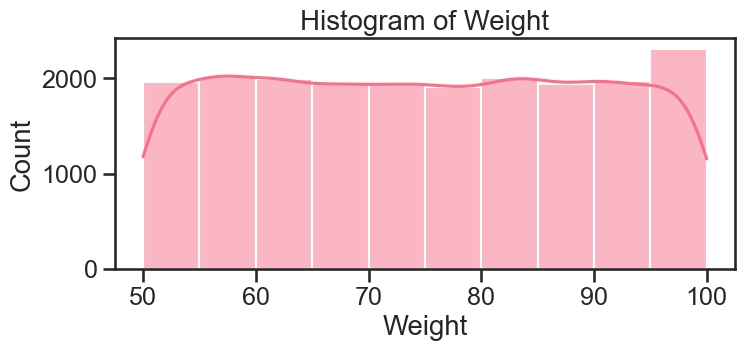

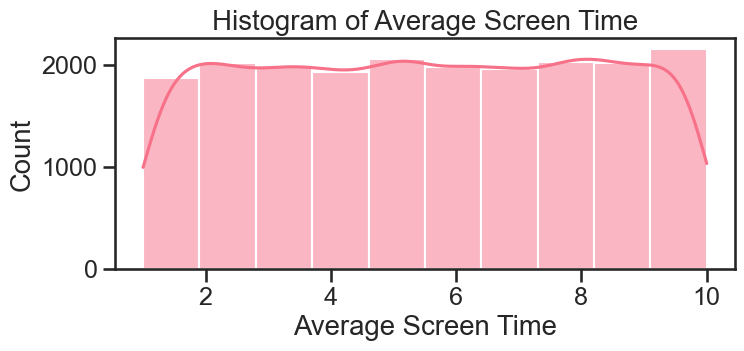

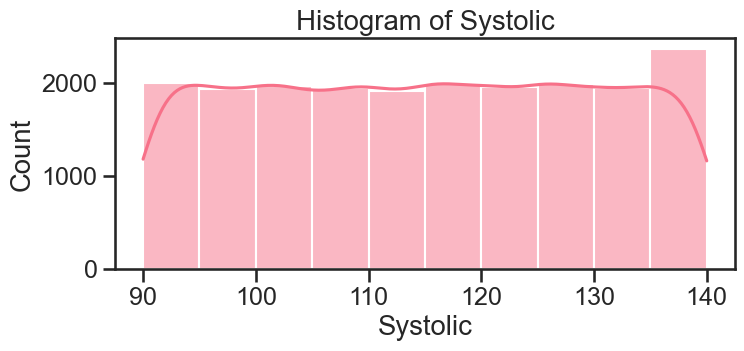

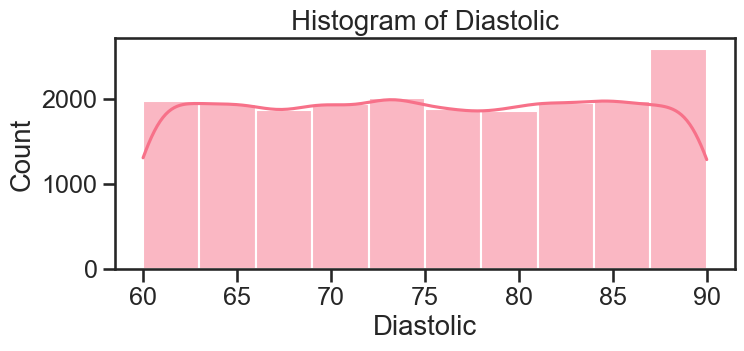

<Figure size 640x480 with 0 Axes>

In [5]:
#Plot histograms of numerical quantities
numerical_col=df.select_dtypes(include="number")
for col in numerical_col.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(data=numerical_col[col],kde=True,bins=10)
    plt.title(f"Histogram of {prettify_colname(col)}")
    plt.xlabel(f'{prettify_colname(col)}')
    plt.show()
    
plt.clf()

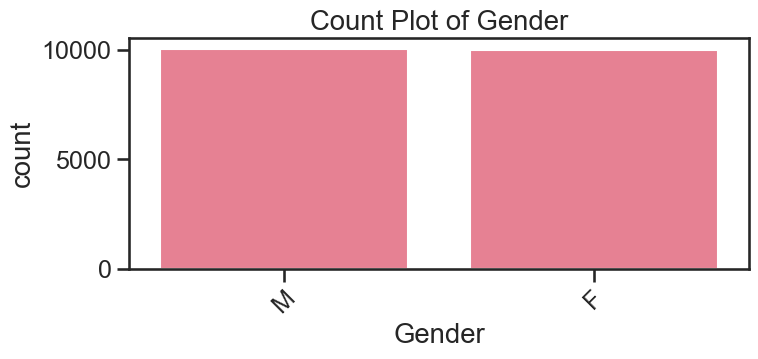

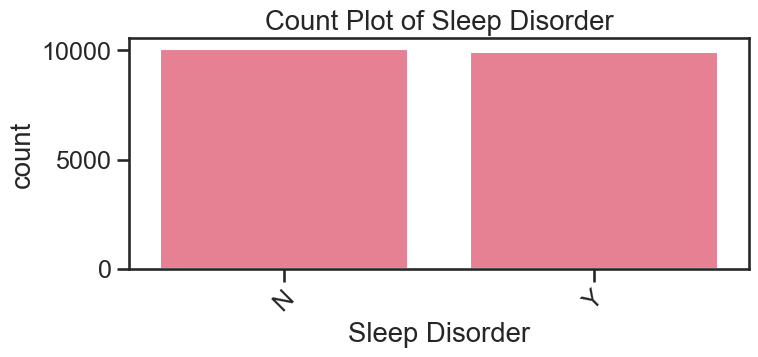

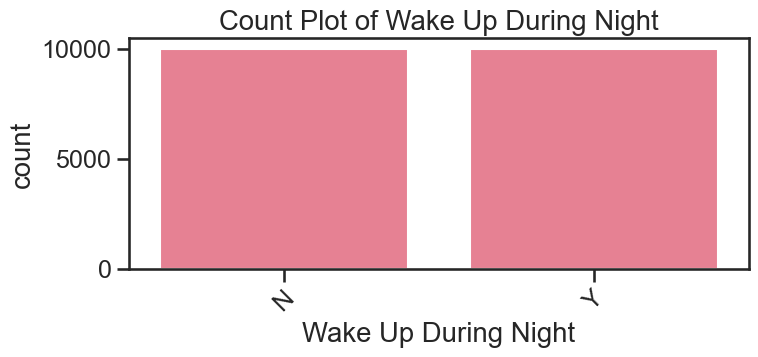

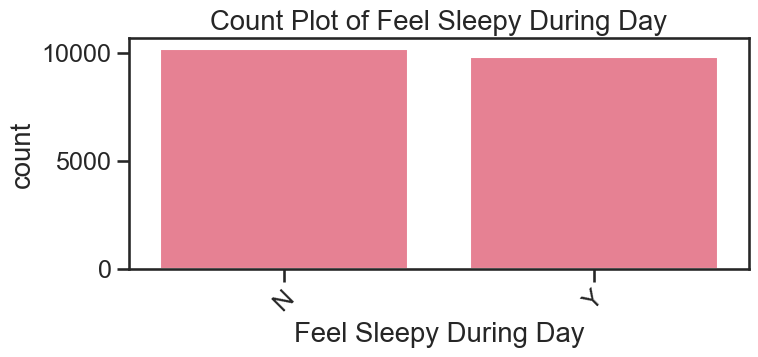

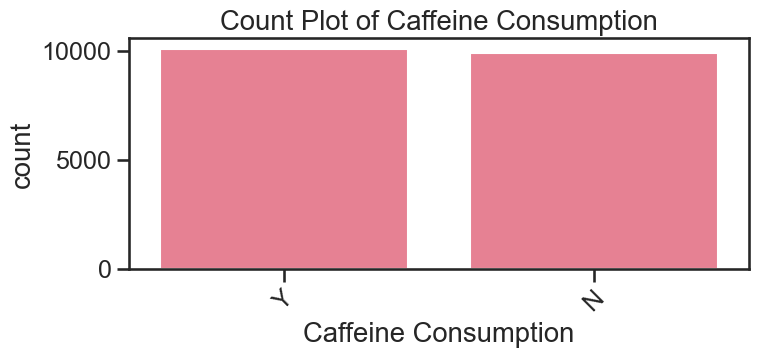

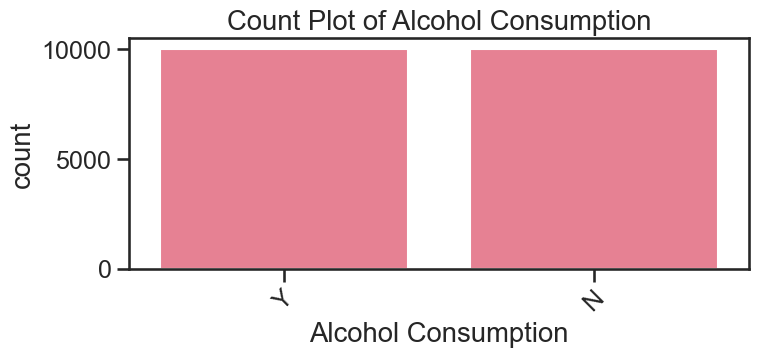

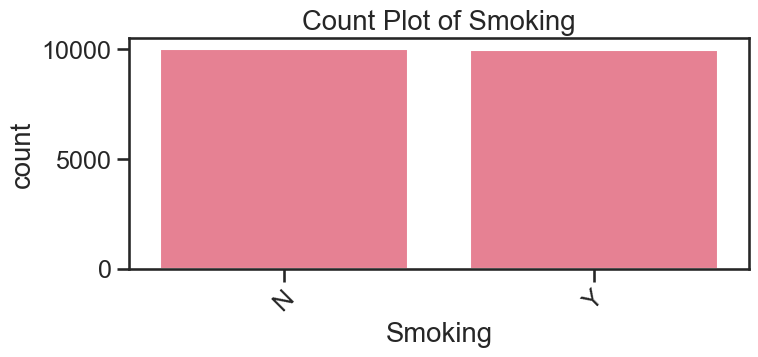

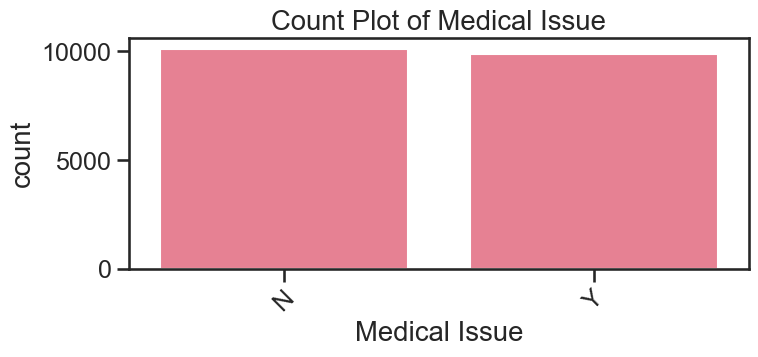

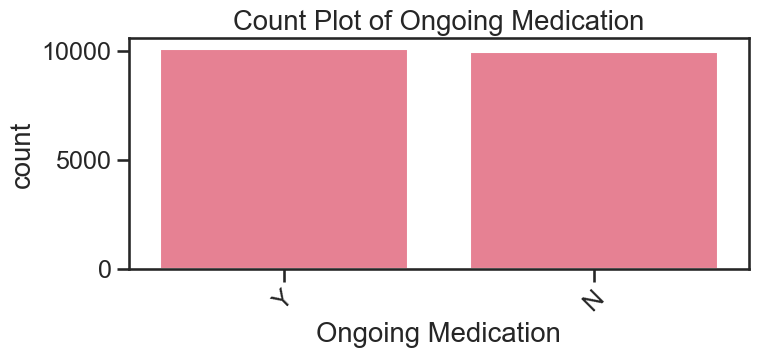

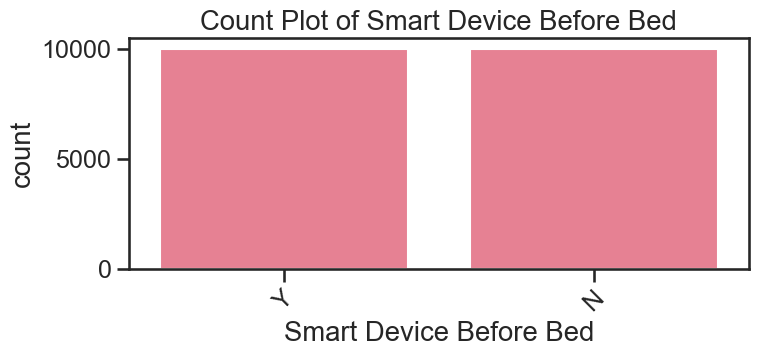

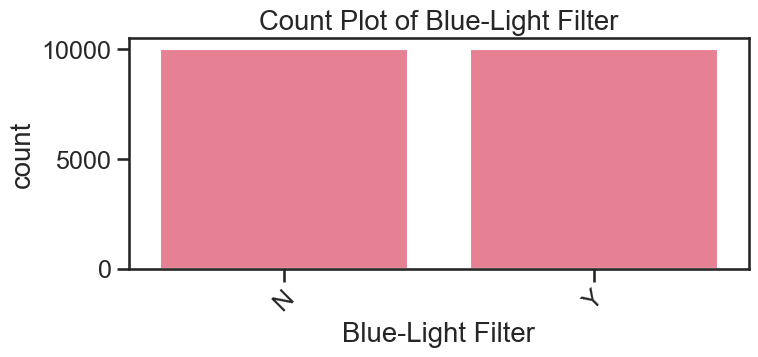

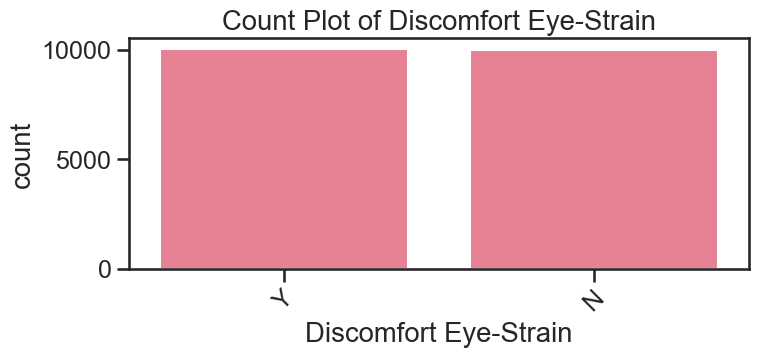

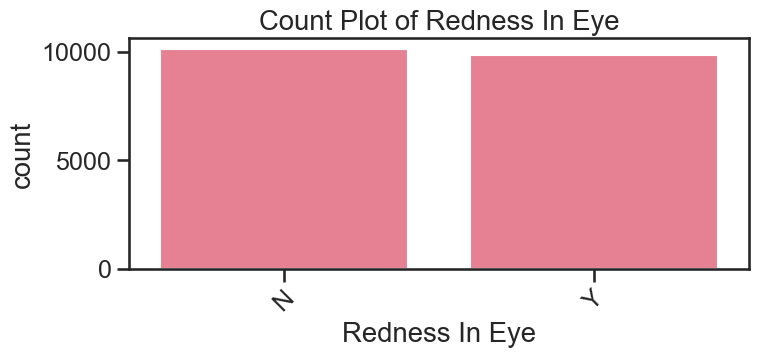

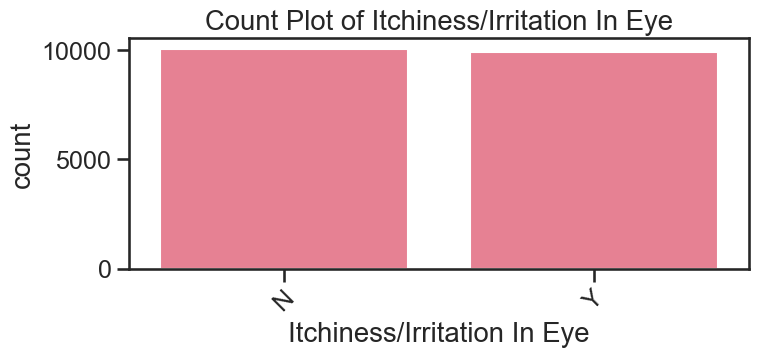

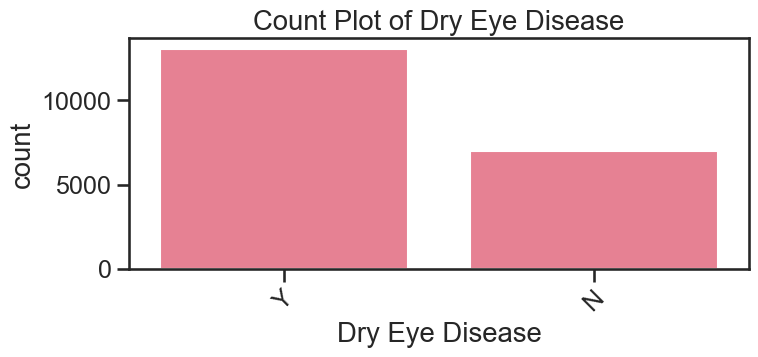

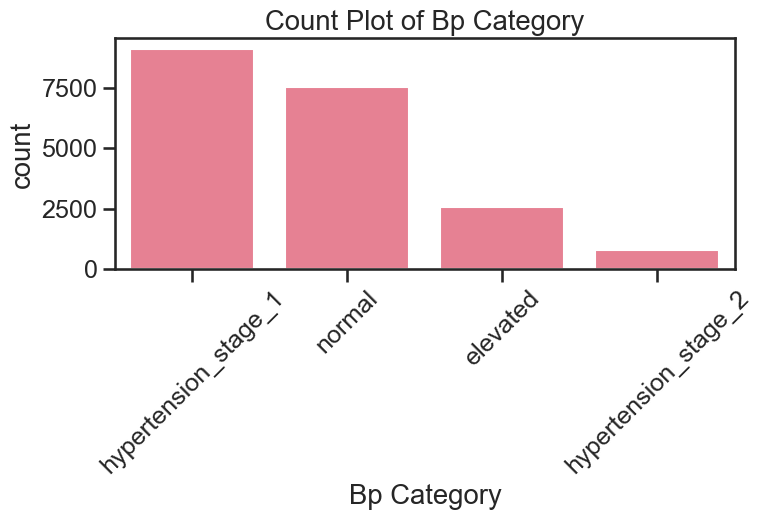

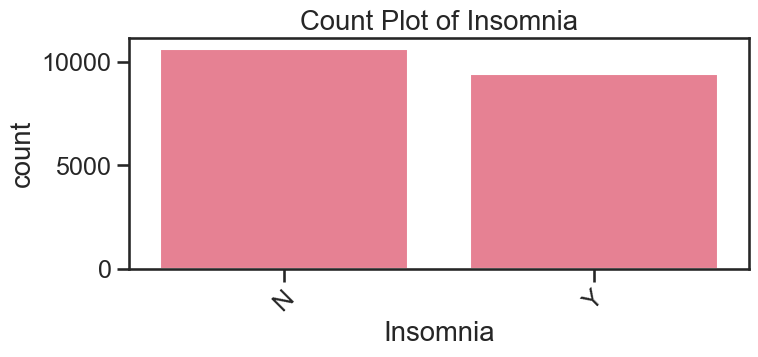

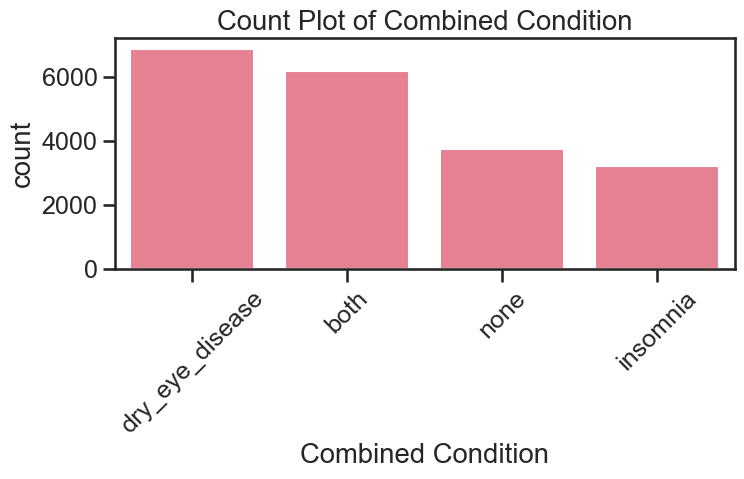

<Figure size 640x480 with 0 Axes>

In [6]:
# Select categorical columns
categorical_col = df.select_dtypes(include="object")

# Plot countplots
for col in categorical_col.columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df0, x=col, order=df0[col].value_counts().index)
    plt.title(f"Count Plot of {prettify_colname(col)}")
    plt.xticks(rotation=45)
    plt.xlabel(f'{prettify_colname(col)}')
    #plt.tight_layout()
    plt.show()

plt.clf()

In [194]:
# corr_matrix0 = df.select_dtypes(include=['number']).corr()
# corr_matrix0

In [195]:
# sns.heatmap(corr_matrix0, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [196]:
#Detect outliers in numerical data

def detect_outliers_iqr(df):
    outlier_info = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        percent_outliers = 100 * len(outliers) / len(df)
        outlier_info[col] = {
            "num_outliers": len(outliers),
            "percent_outliers": round(percent_outliers, 2),
        }
    return pd.DataFrame(outlier_info).T

# Get outlier stats
outlier_stats = detect_outliers_iqr(df)
print(outlier_stats)

                     num_outliers  percent_outliers
age                           0.0               0.0
sleep_duration                0.0               0.0
sleep_quality                 0.0               0.0
stress_level                  0.0               0.0
heart_rate                    0.0               0.0
daily_steps                   0.0               0.0
physical_activity             0.0               0.0
height                        0.0               0.0
weight                        0.0               0.0
average_screen_time           0.0               0.0
systolic                      0.0               0.0
diastolic                     0.0               0.0


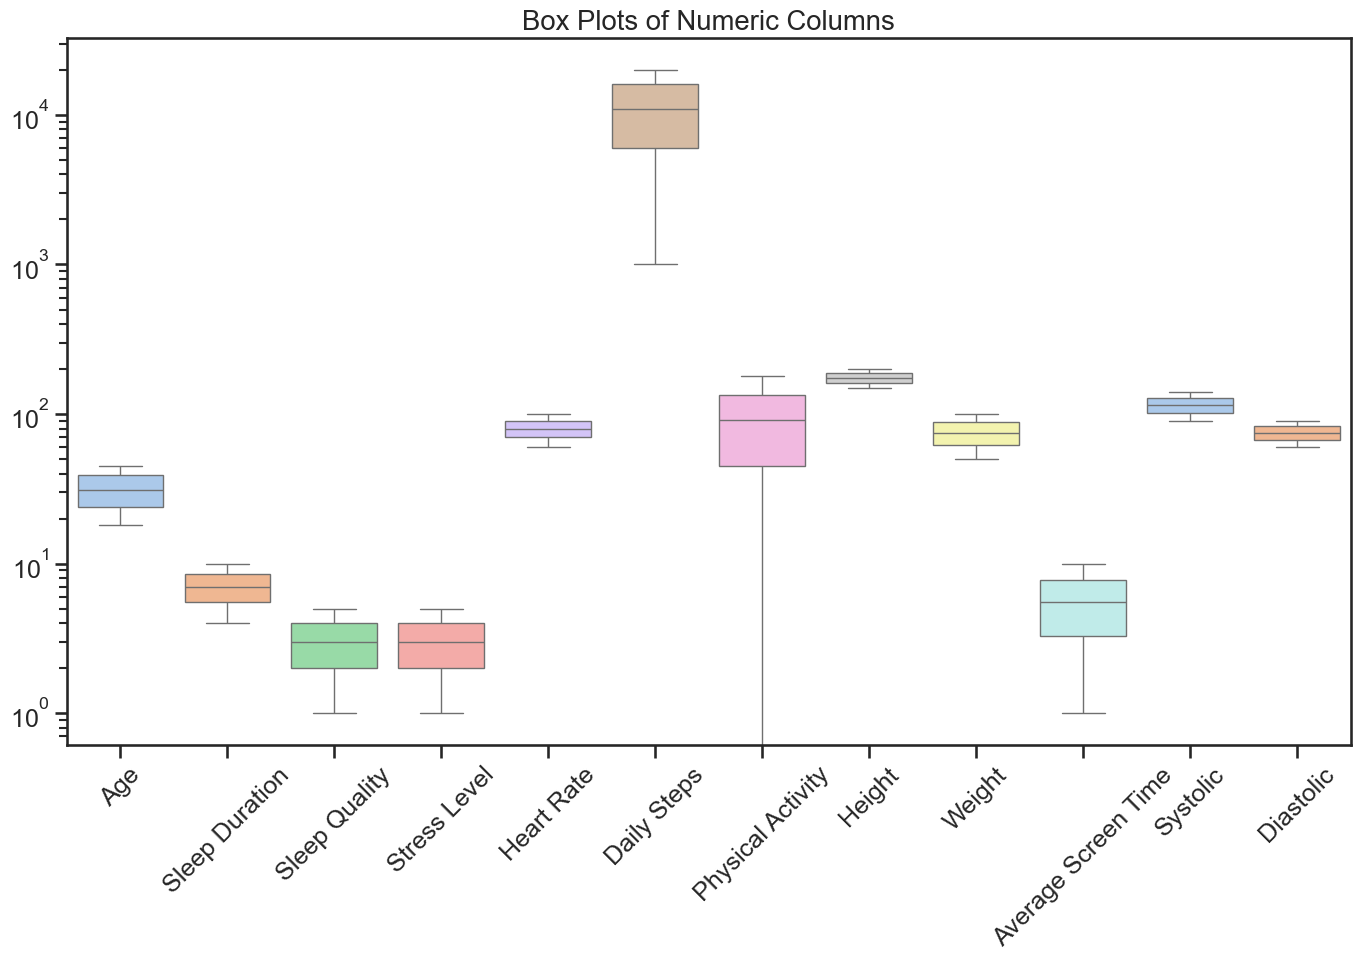

<Figure size 640x480 with 0 Axes>

In [197]:
plt.figure(figsize=(14, 10))
#df.select_dtypes(include=[np.number]).boxplot()
ax = sns.boxplot(data=df.select_dtypes(include=[np.number]), palette='pastel')
plt.yscale('log')
plt.title("Box Plots of Numeric Columns")
format_xticklabels(ax)  # Apply the formatting function
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


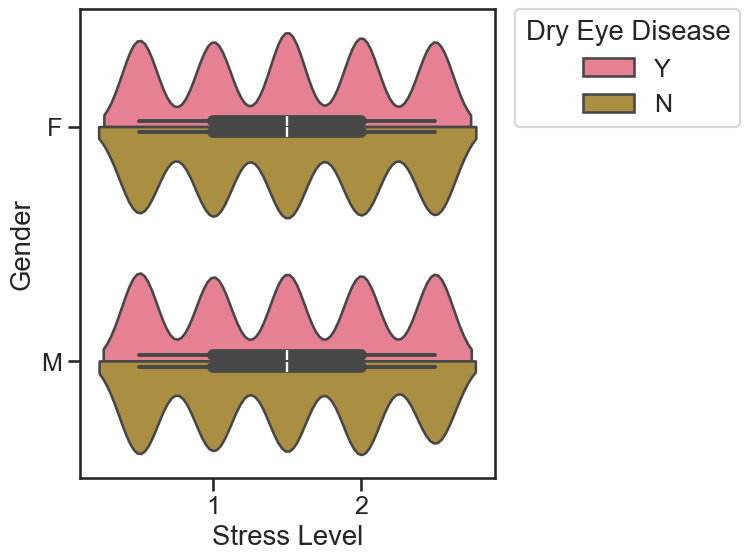

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


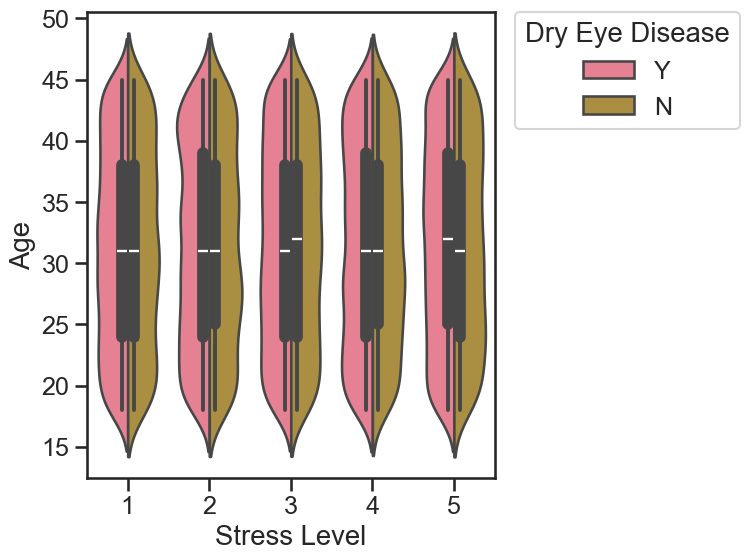

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


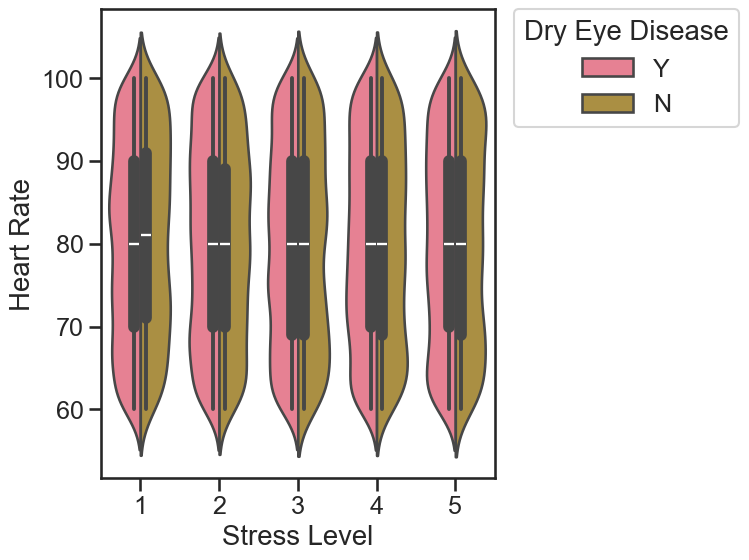

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


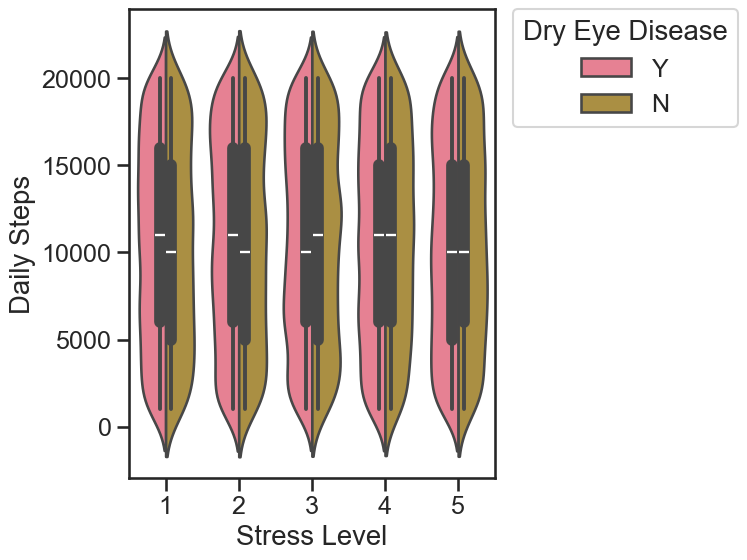

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


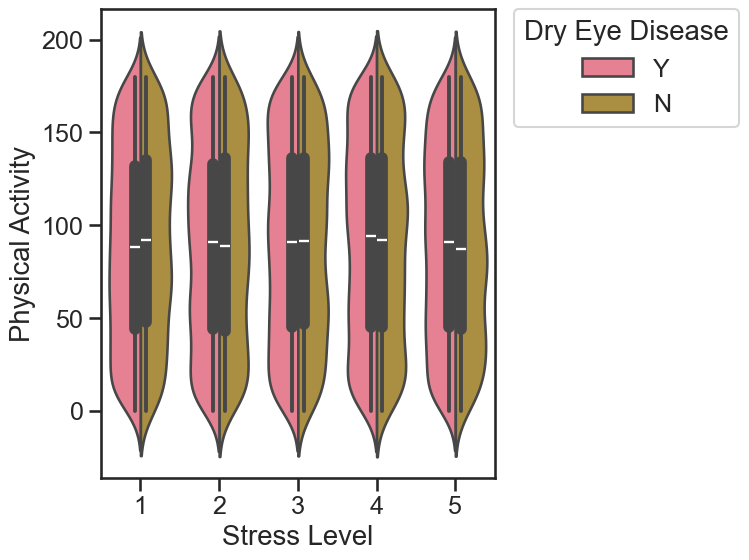

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


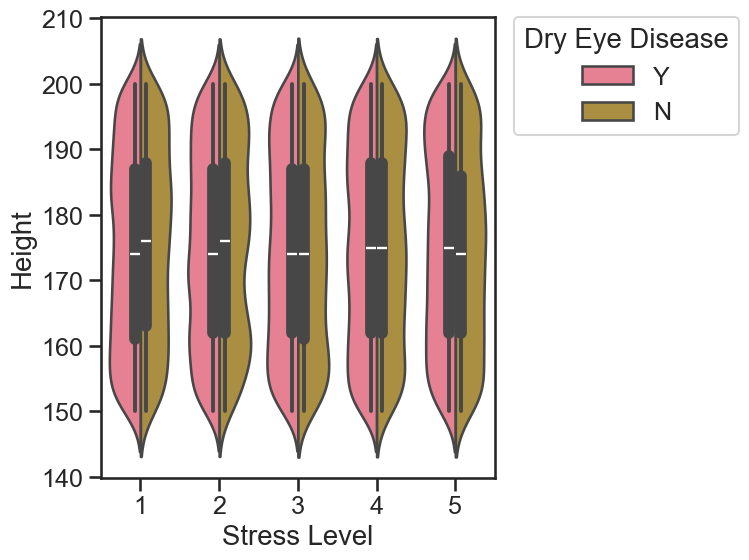

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


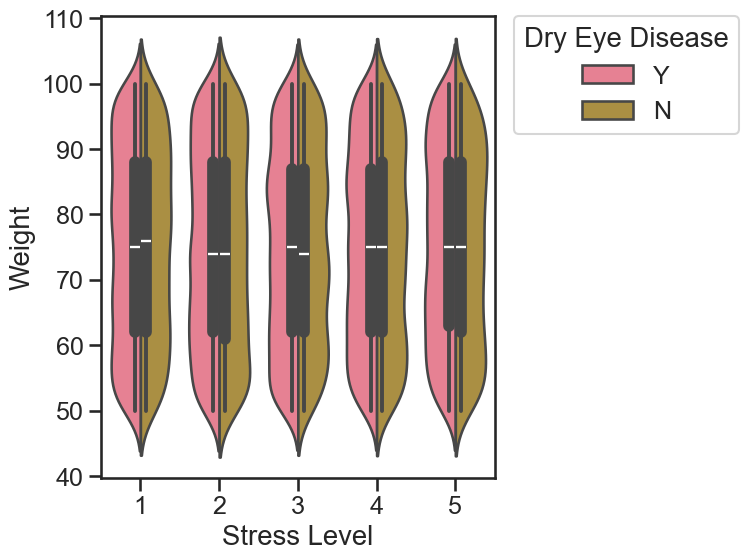

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


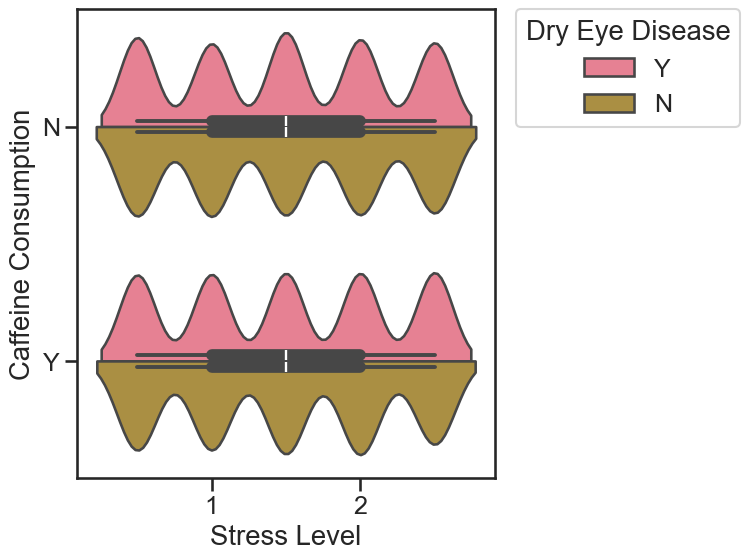

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


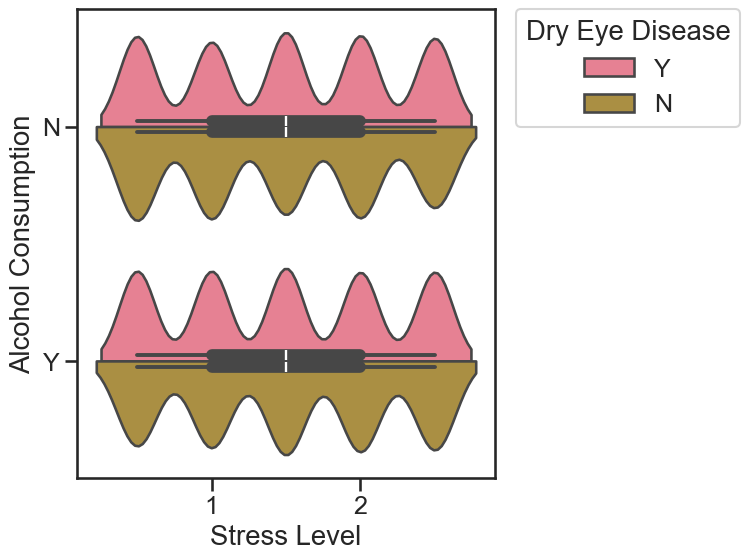

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


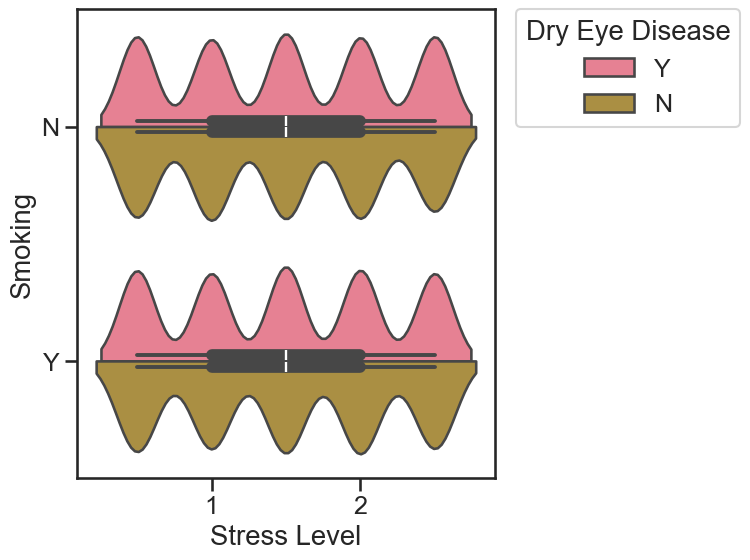

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


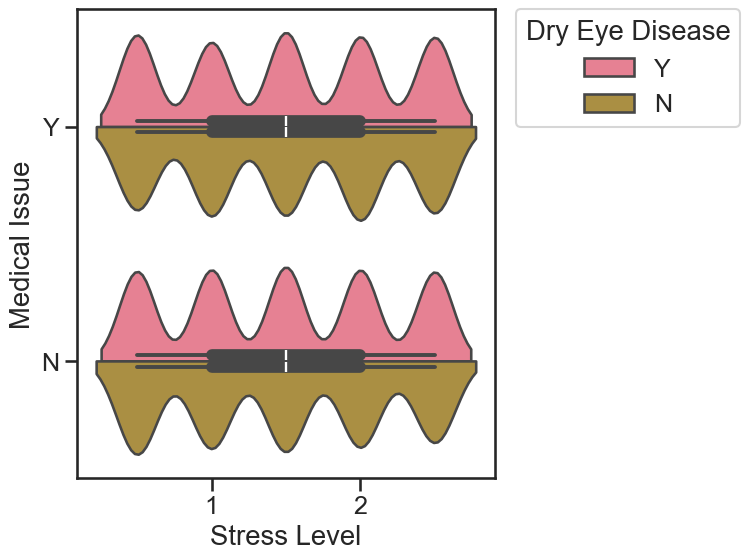

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


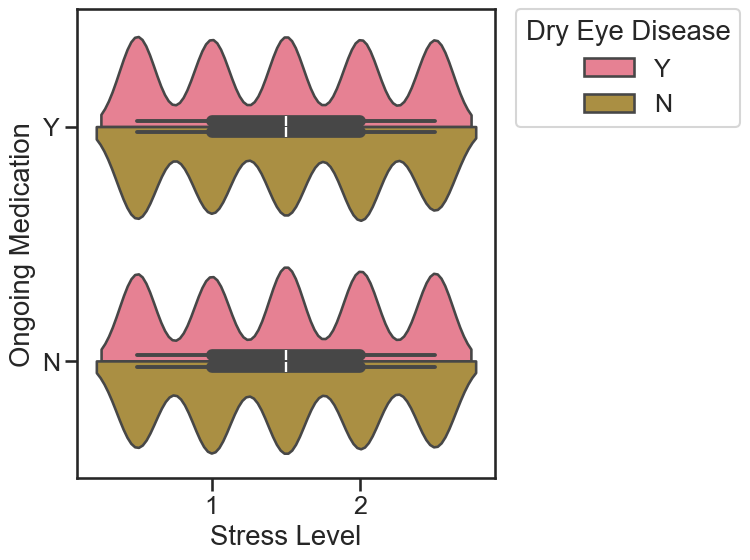

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


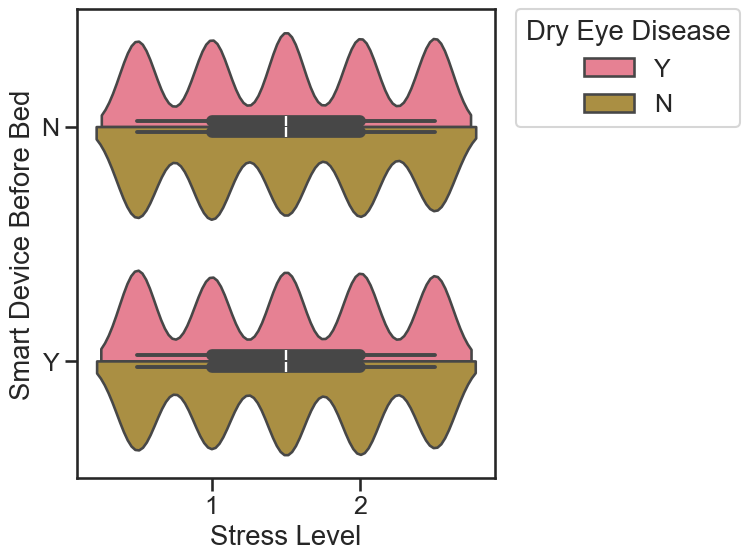

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


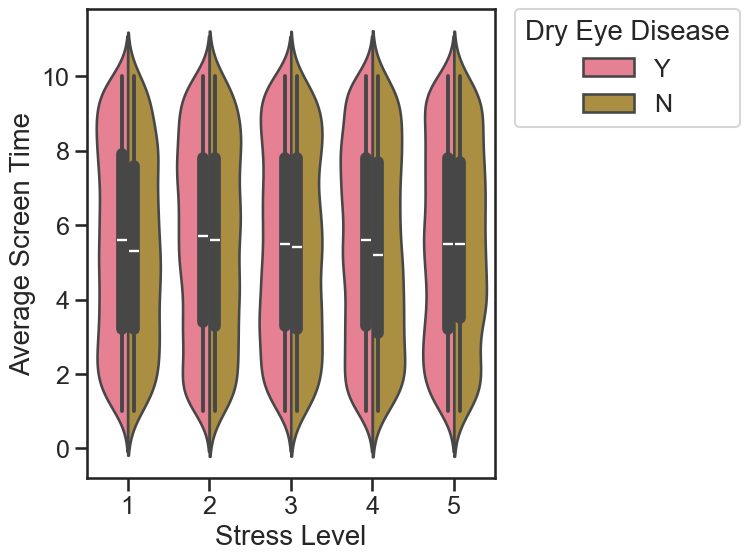

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


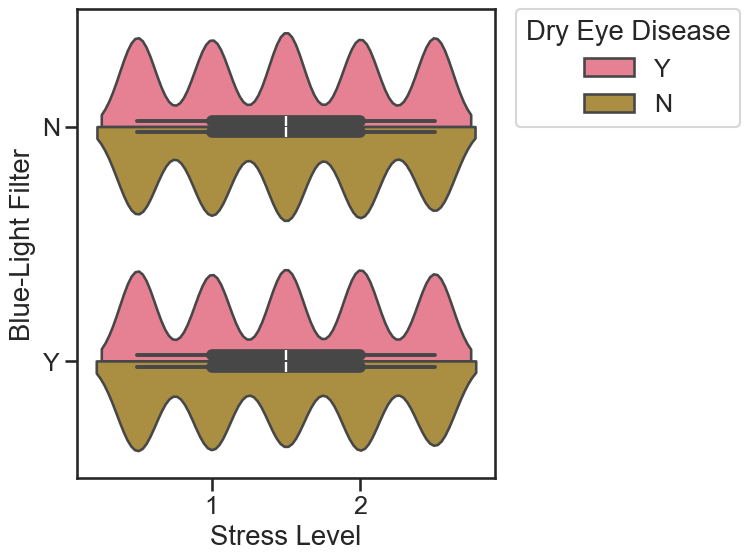

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


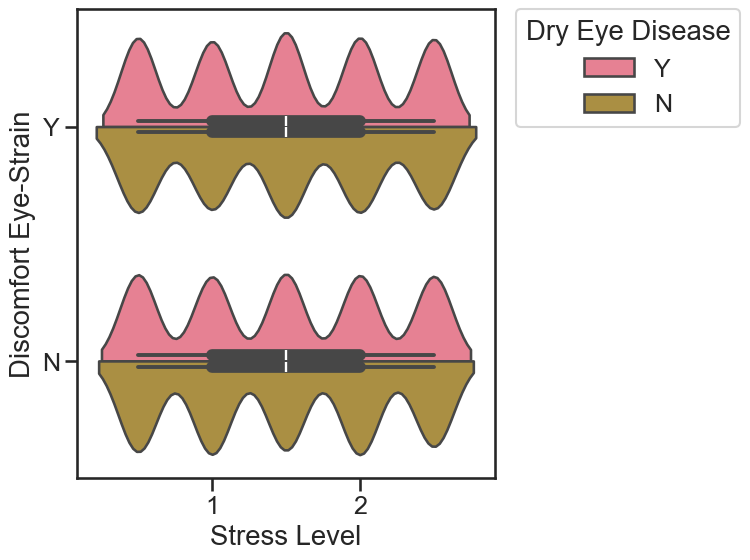

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


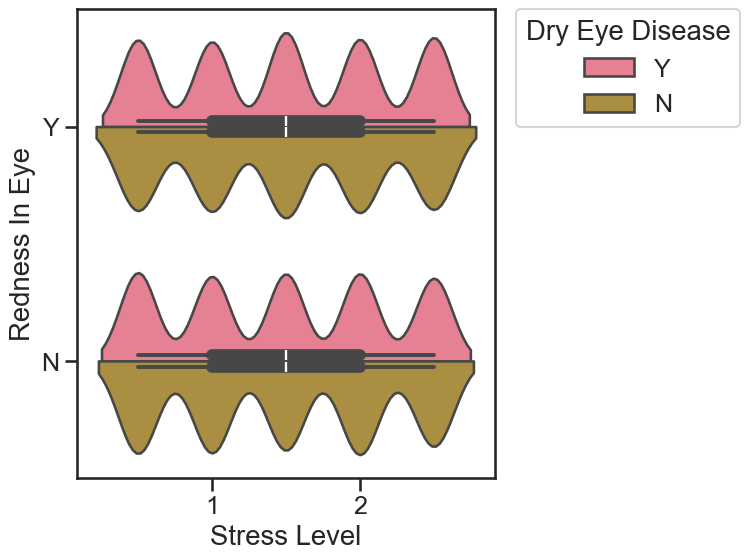

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


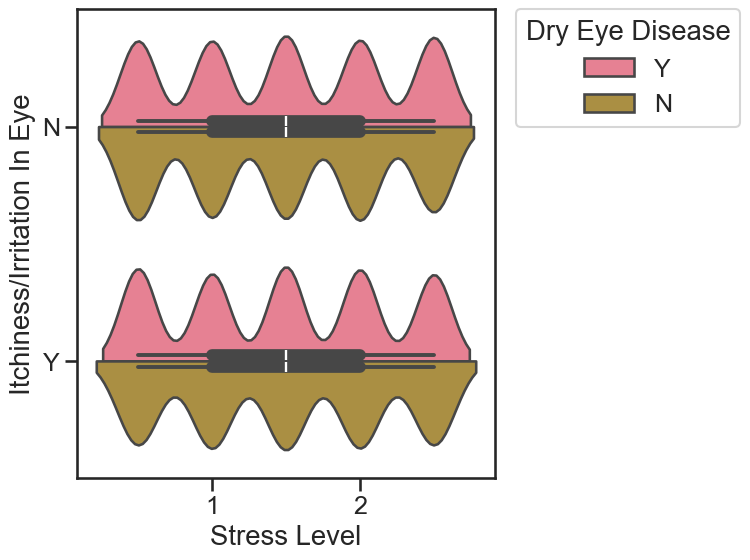

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


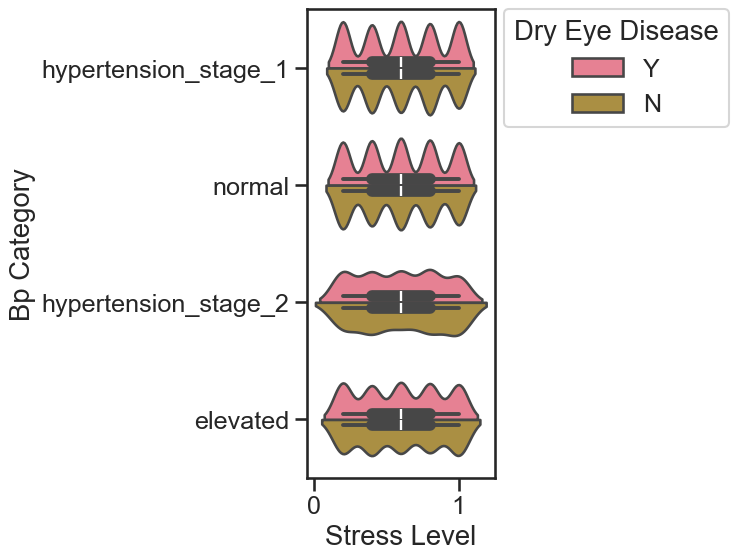

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


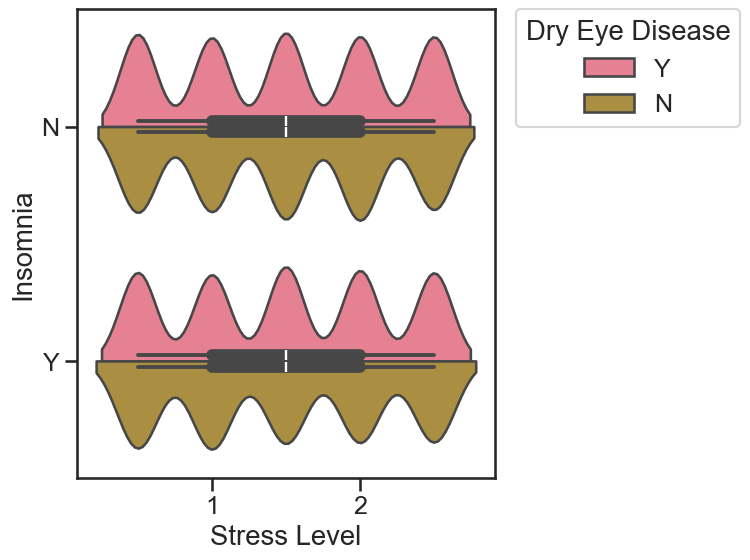

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_73006/4252392859.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


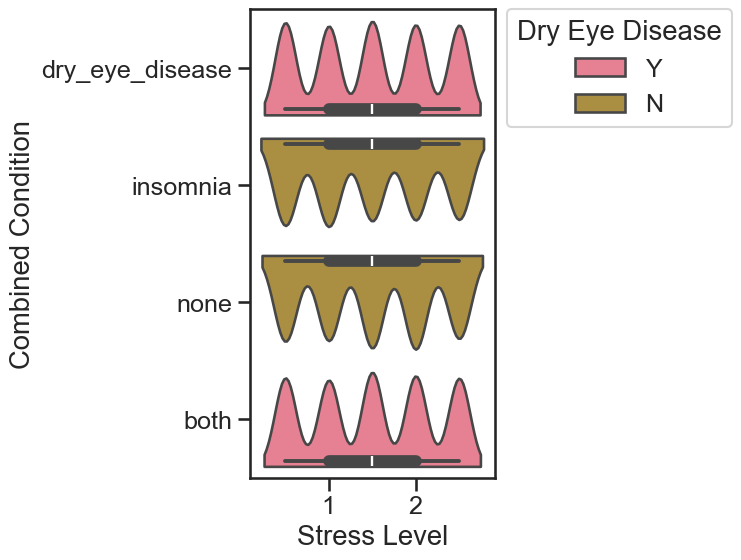

In [7]:
features_to_remove = ["stress_level", "dry_eye_disease"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)

for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.violinplot(x="stress_level", y=col,
                        hue="dry_eye_disease",
                        data=df, split=True) # Changed boxplot to violinplot and added split=True

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    plt.xlabel("Stress Level")
    plt.ylabel(col.replace('_', ' ').title())

    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),
              loc='upper left', borderaxespad=0., title='Dry Eye Disease')

    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
# sns.despine(offset=10, trim=True) # Removed as it's typically used with boxplots

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


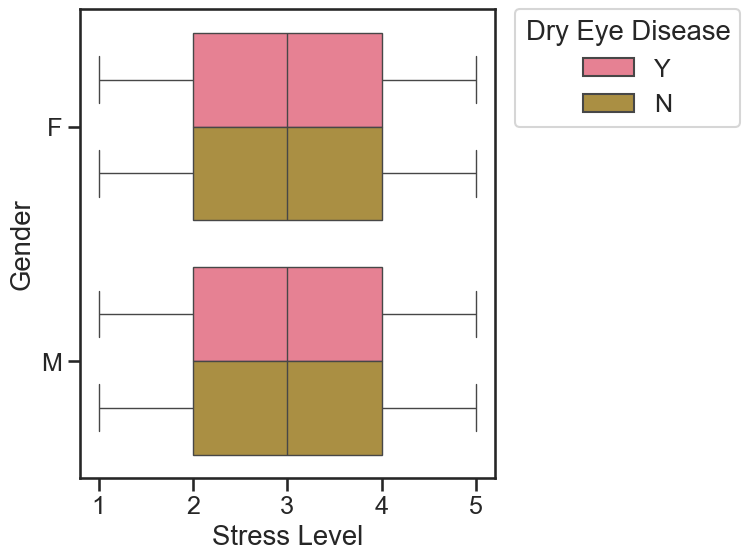

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


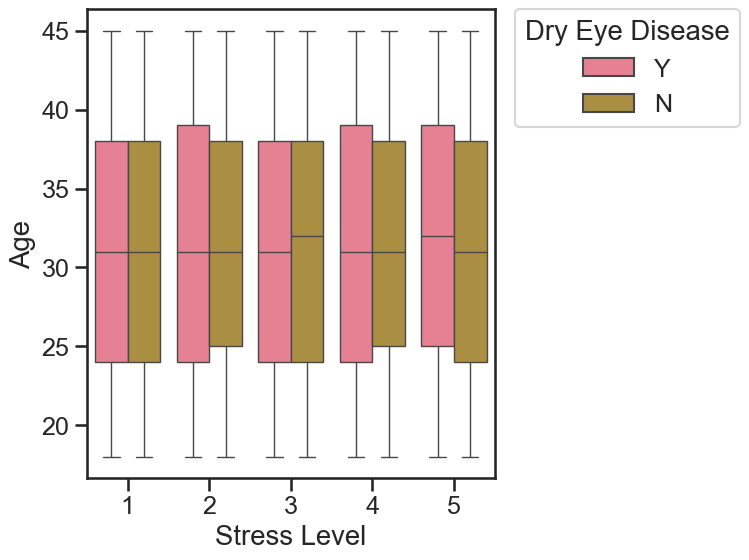

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


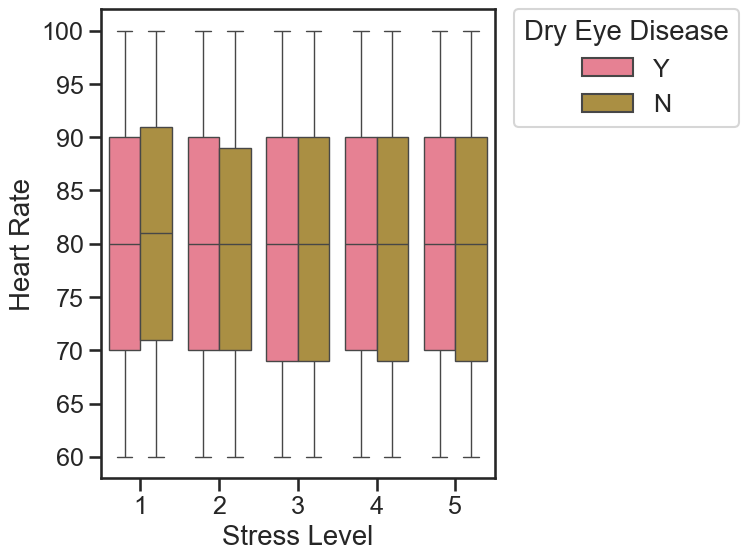

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


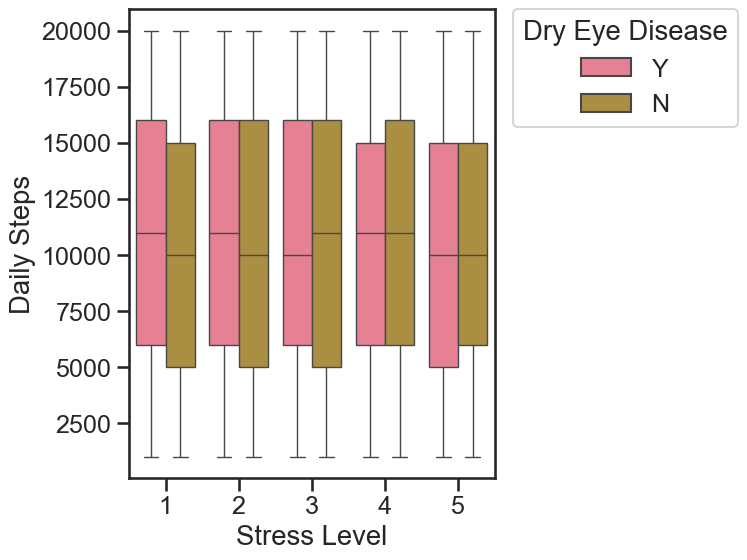

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


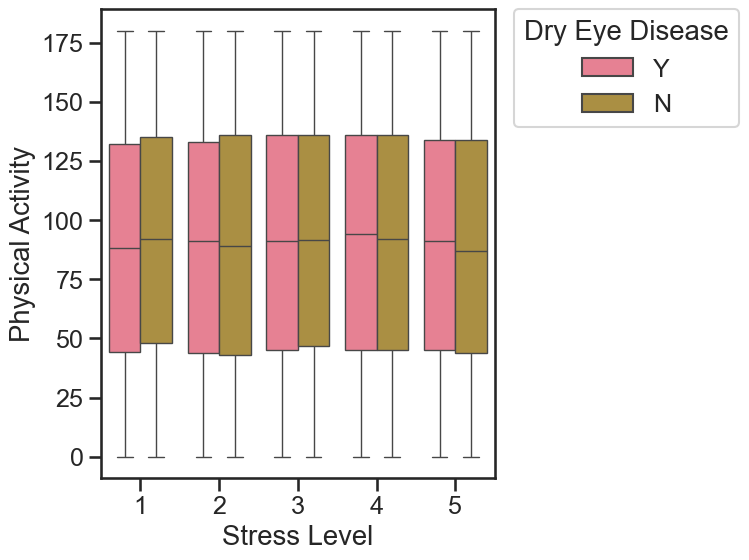

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


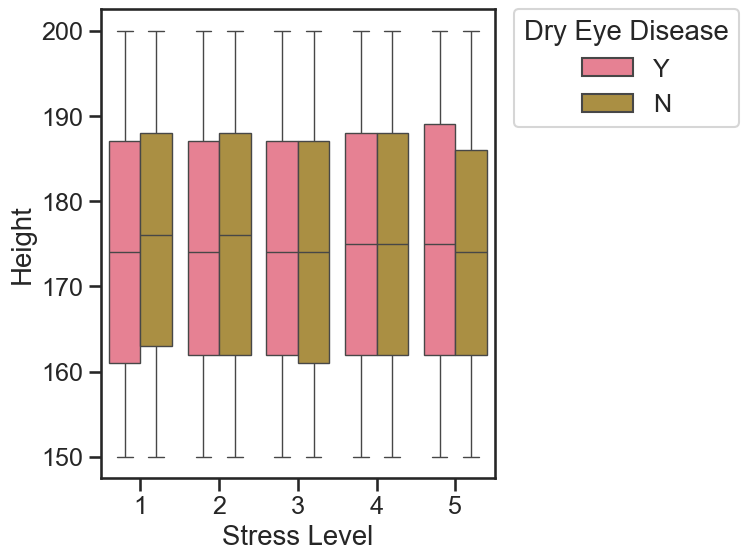

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


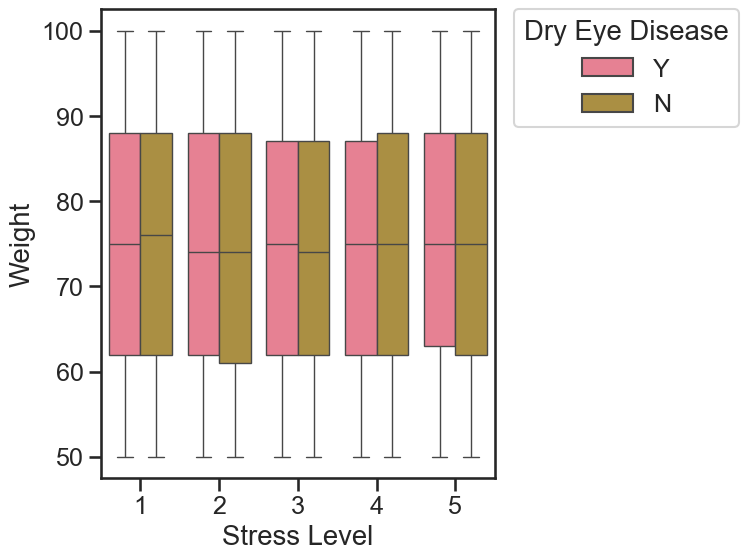

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


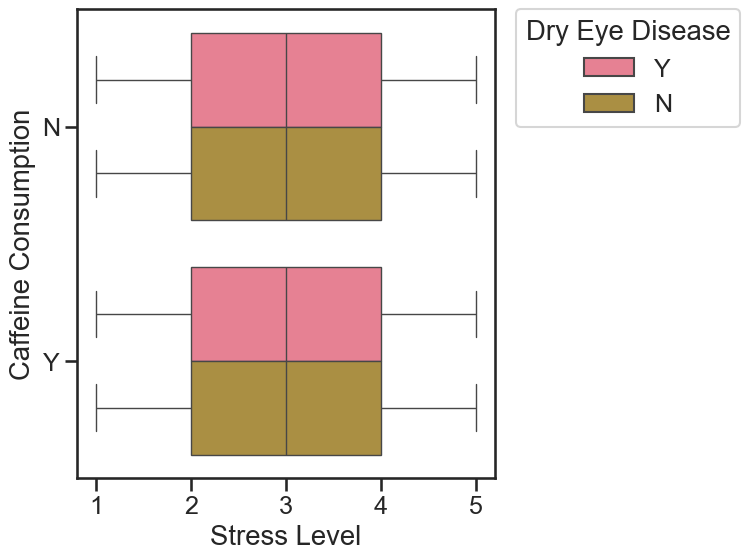

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


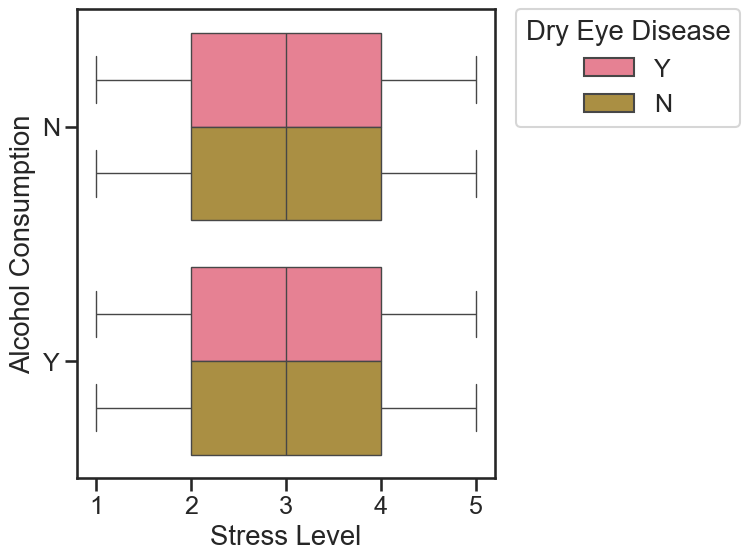

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


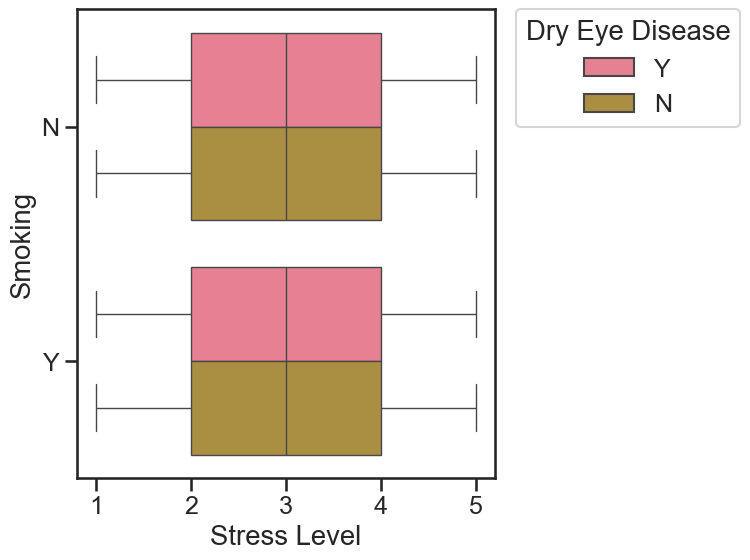

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


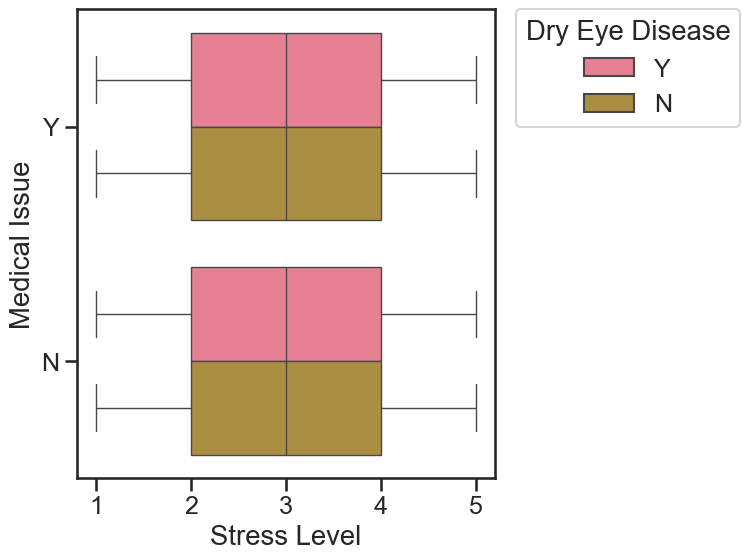

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


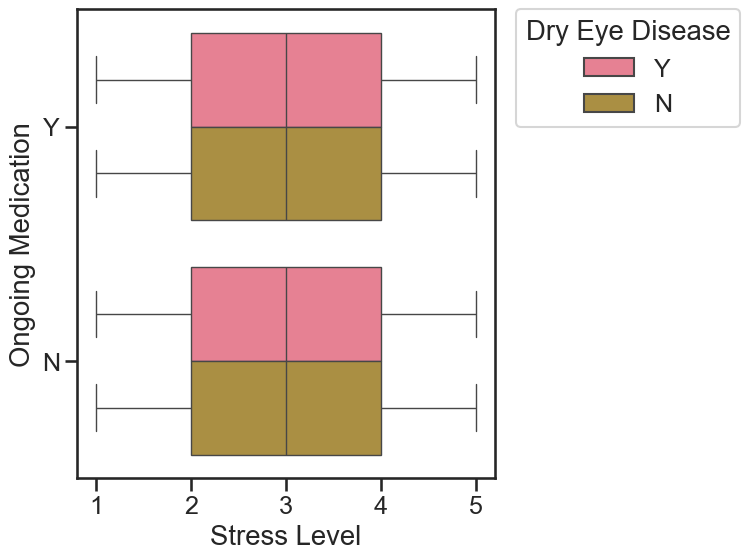

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


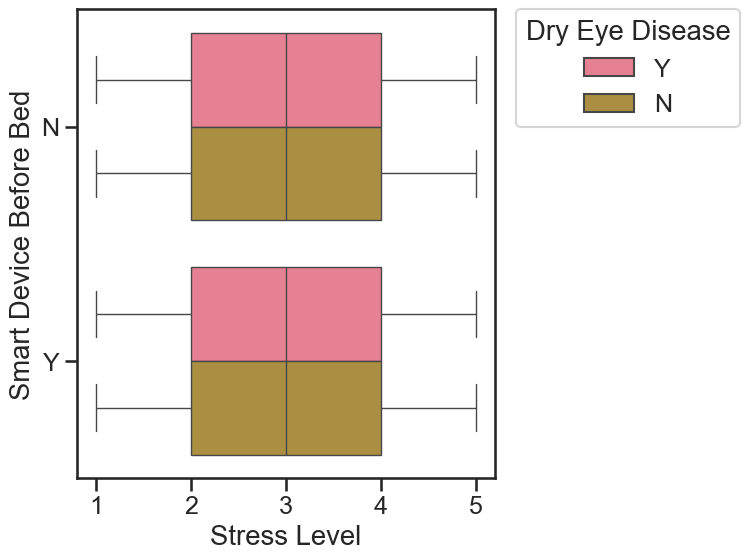

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


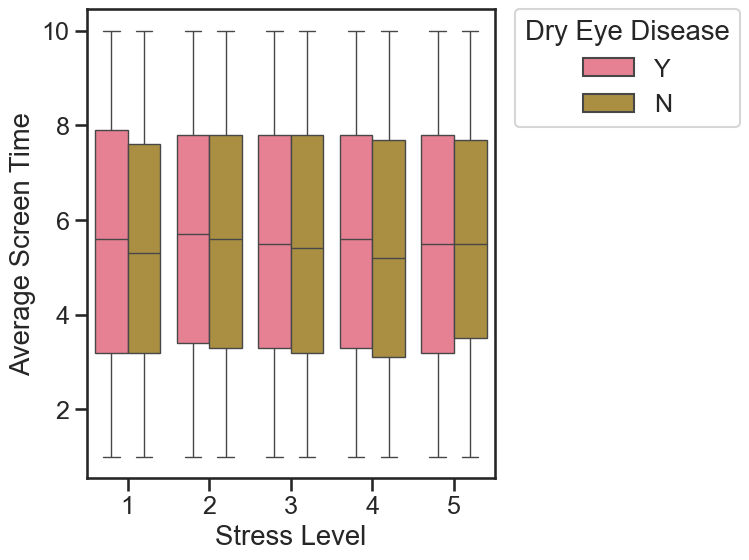

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


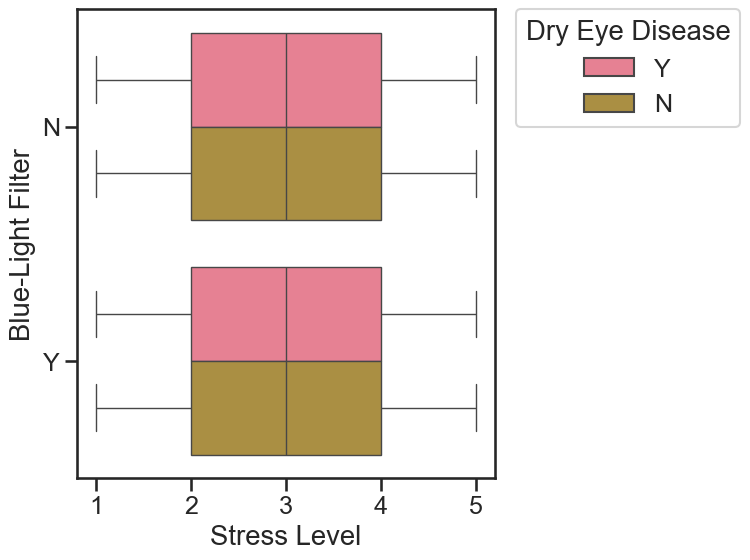

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


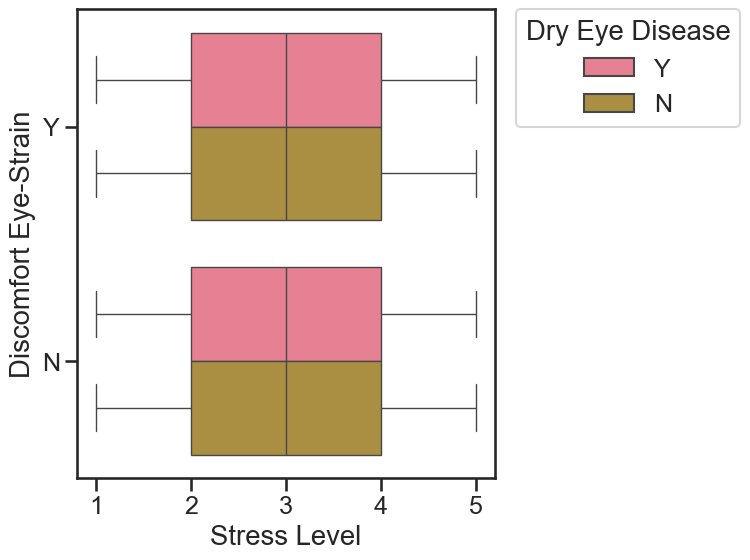

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


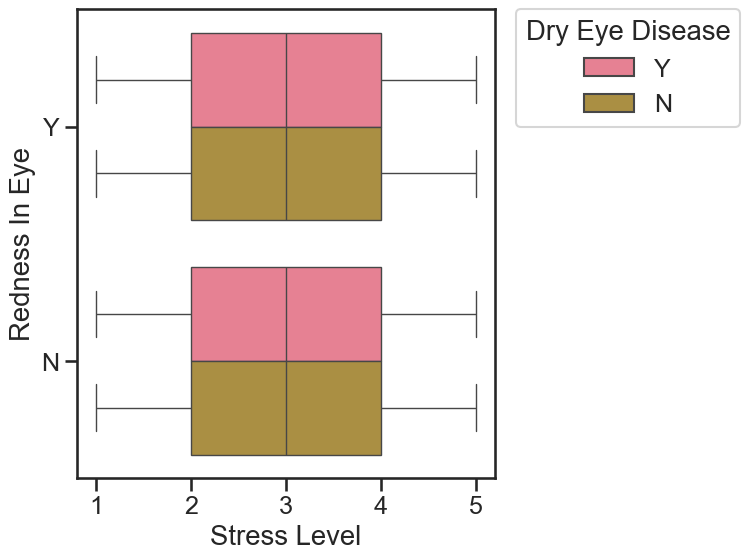

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


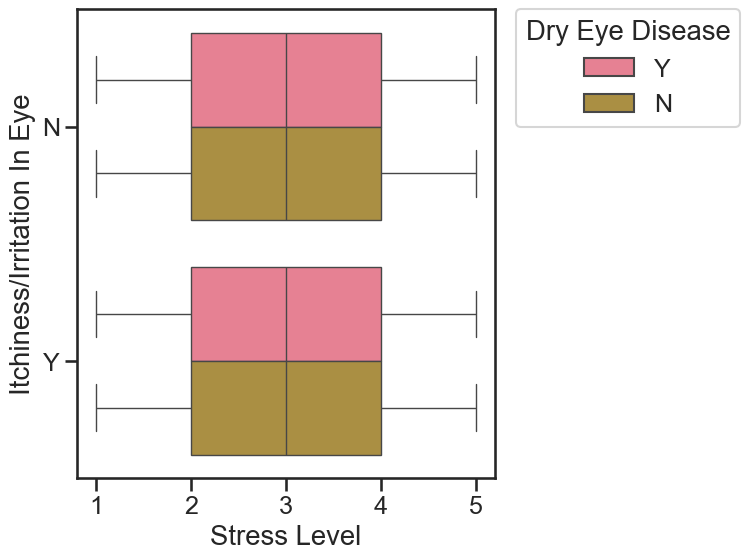

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


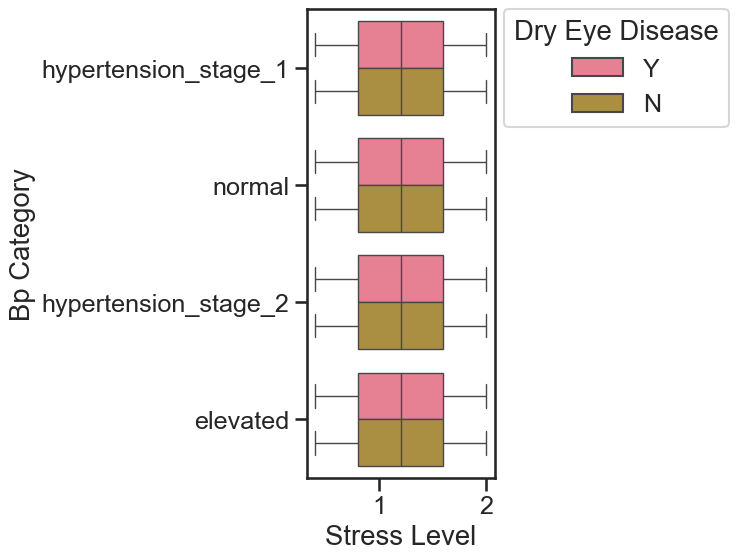

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


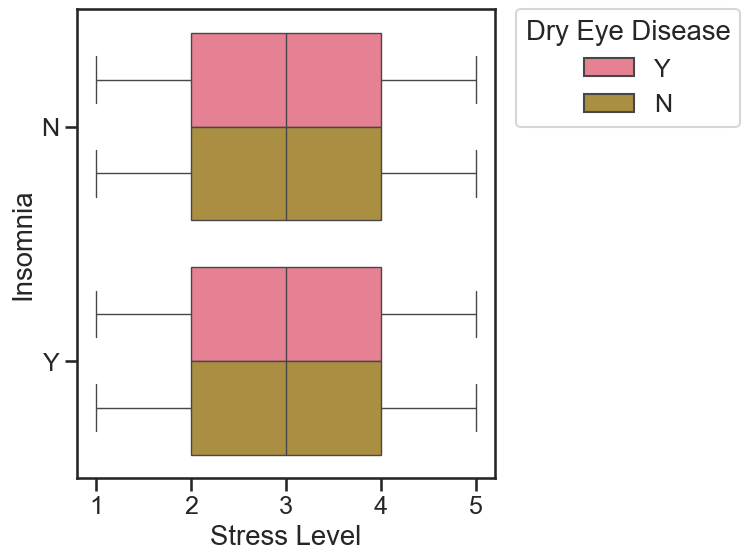

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/2324571273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


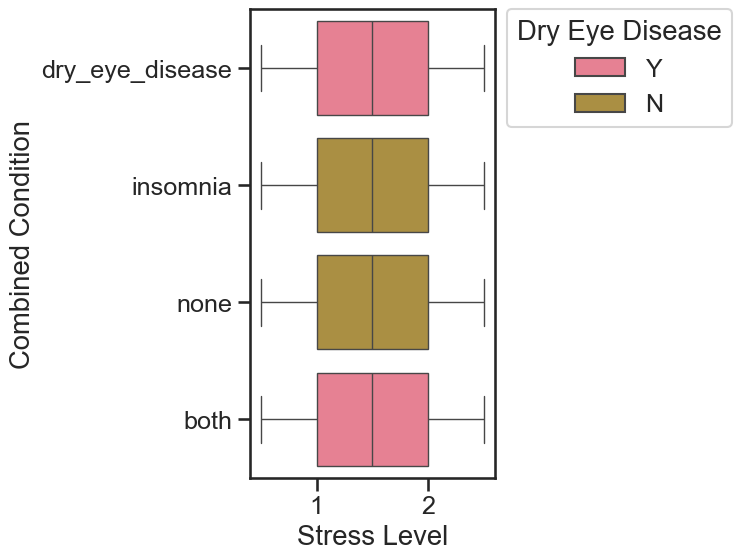

In [201]:
features_to_remove = ["stress_level", "dry_eye_disease"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)
for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="stress_level", y=col,
                hue="dry_eye_disease",
                data=df)

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    #plt.title(f"Dry Eye Disease vs. {col.replace('_', ' ').title()} by Stress Level")
    plt.xlabel("Stress Level")
    plt.ylabel(col.replace('_', ' ').title())
    
    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),\
        loc='upper left', borderaxespad=0., title='Dry Eye Disease')
    
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
#sns.despine(offset=10, trim=True)

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


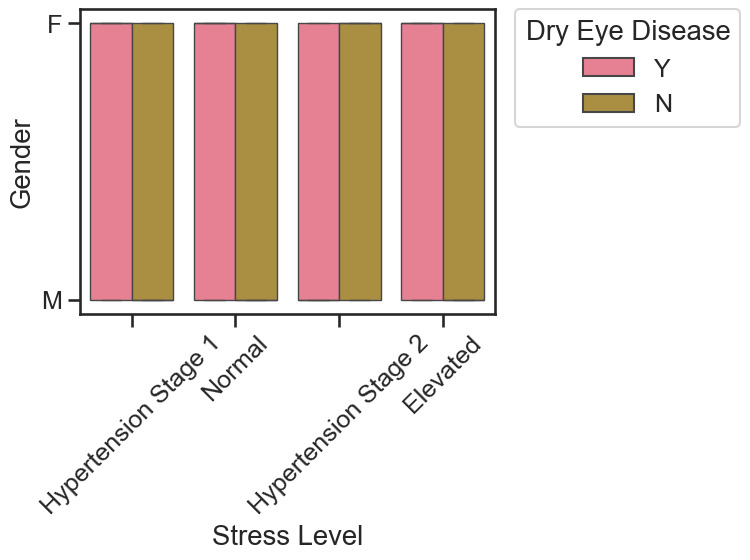

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


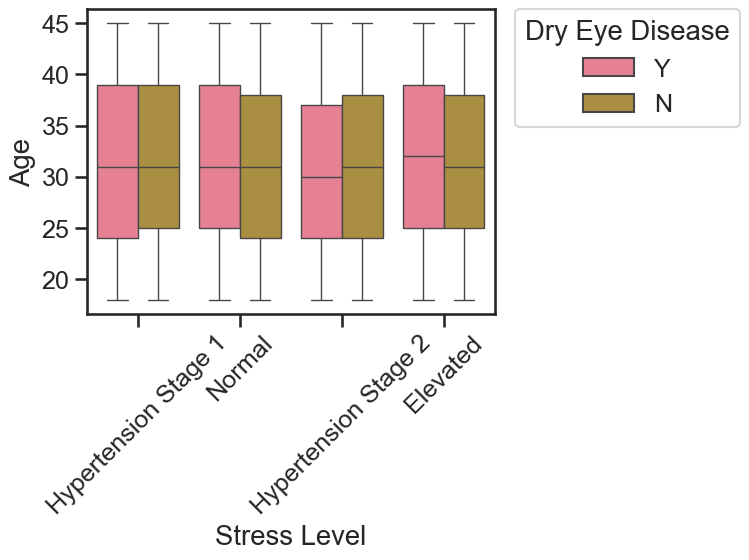

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


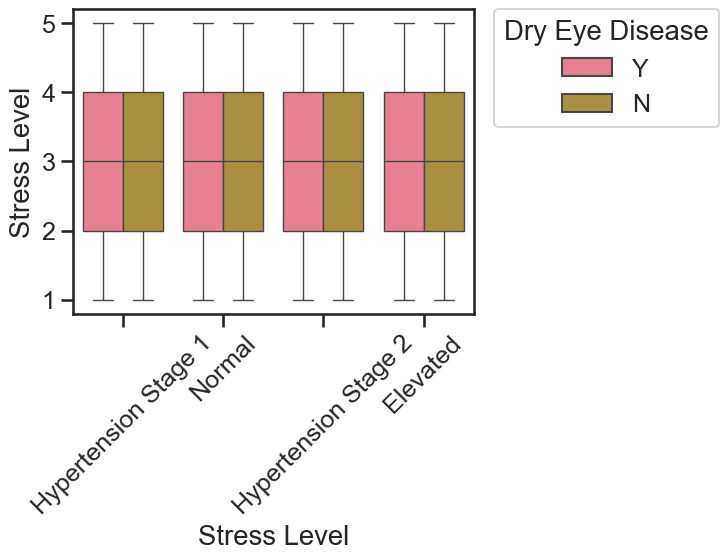

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


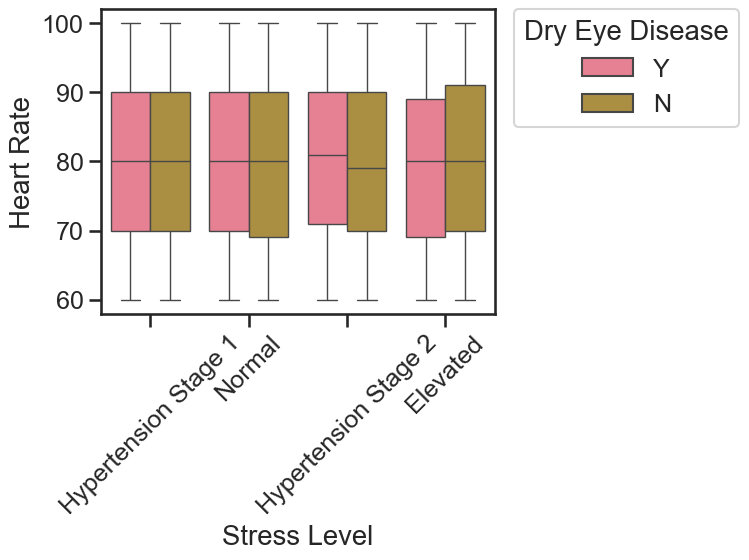

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


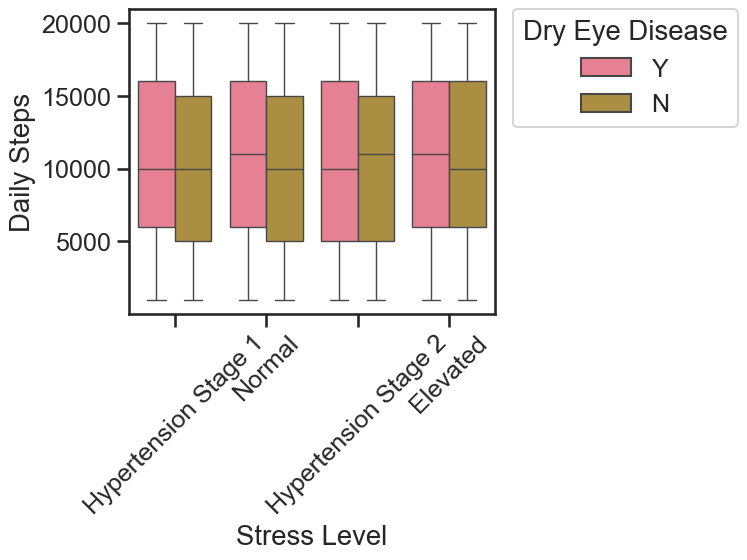

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


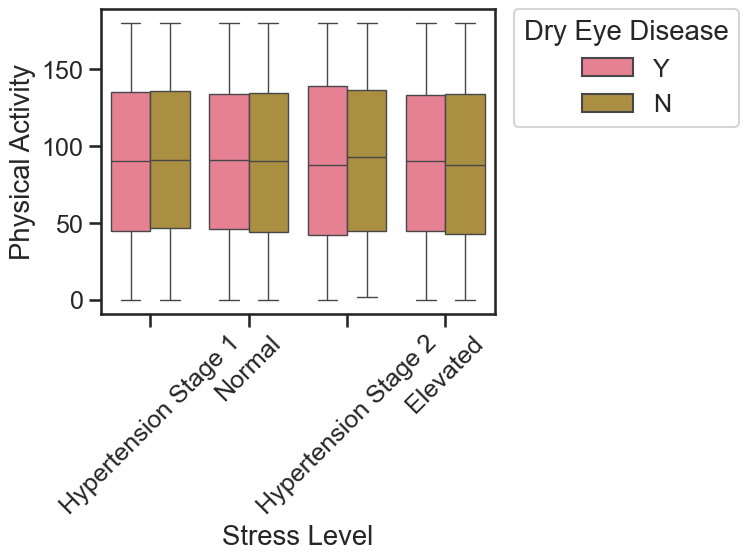

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


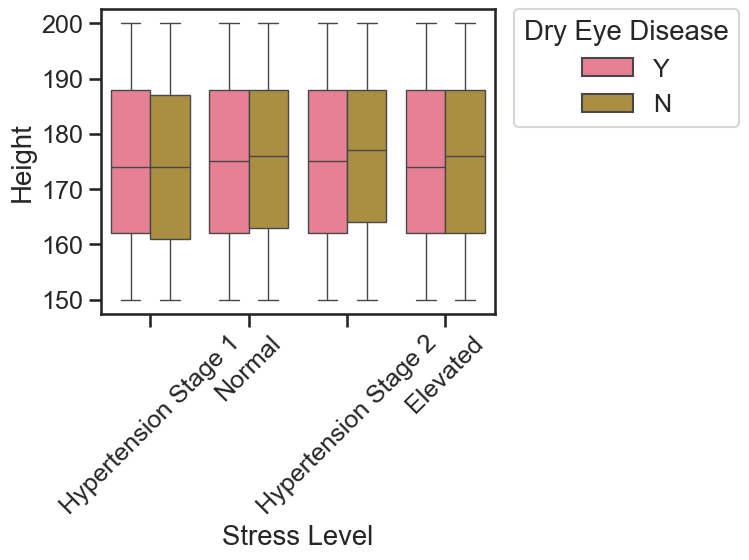

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


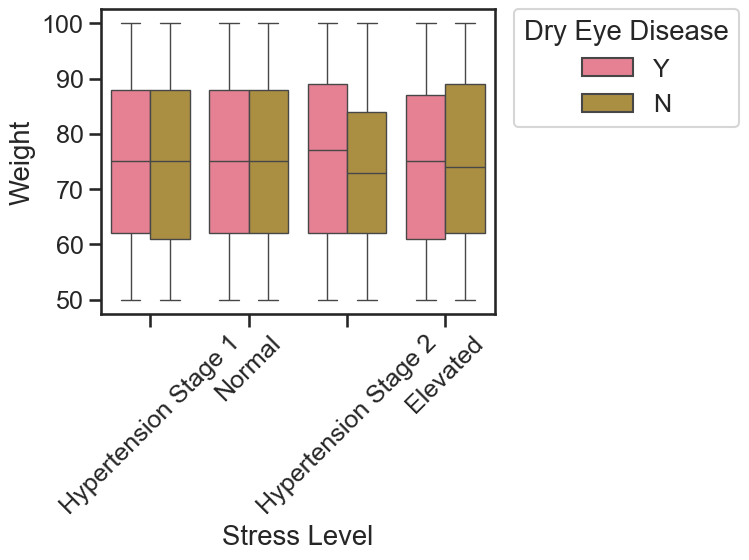

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


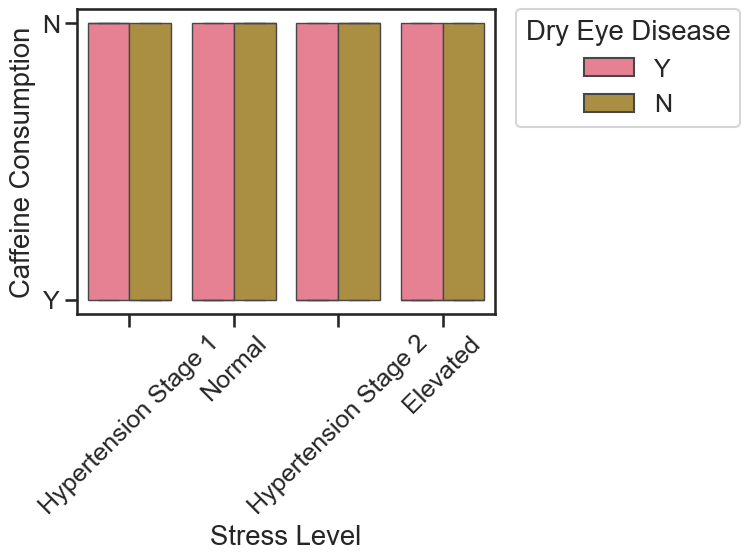

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


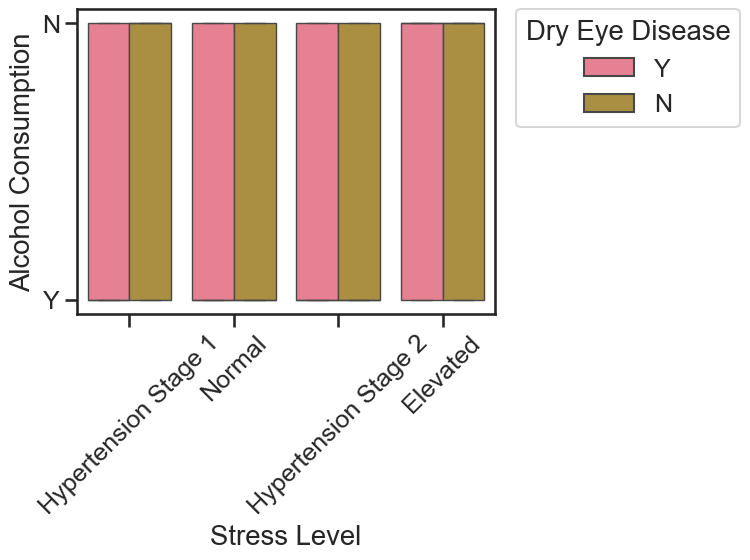

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


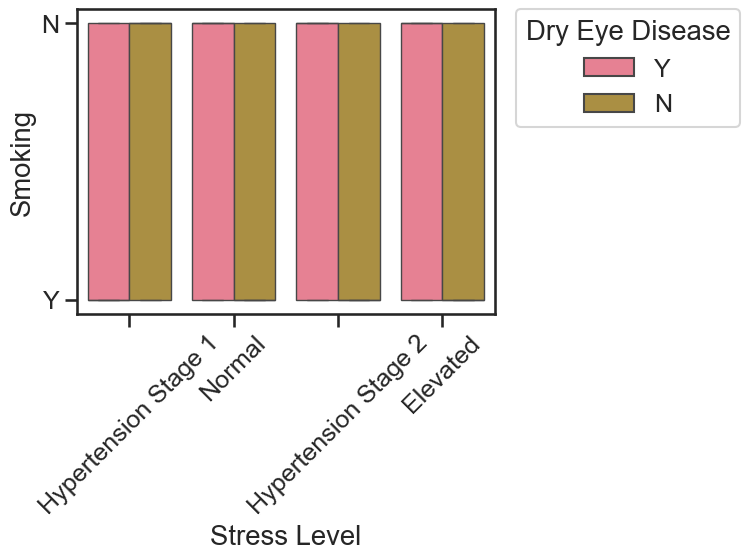

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


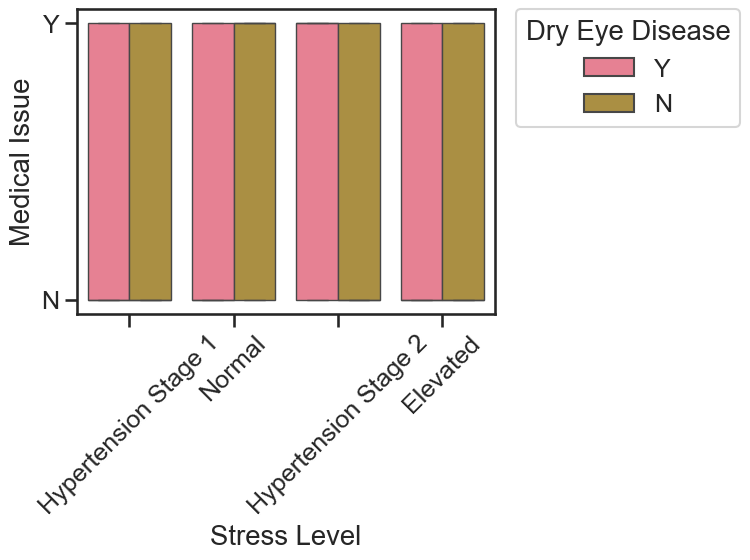

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


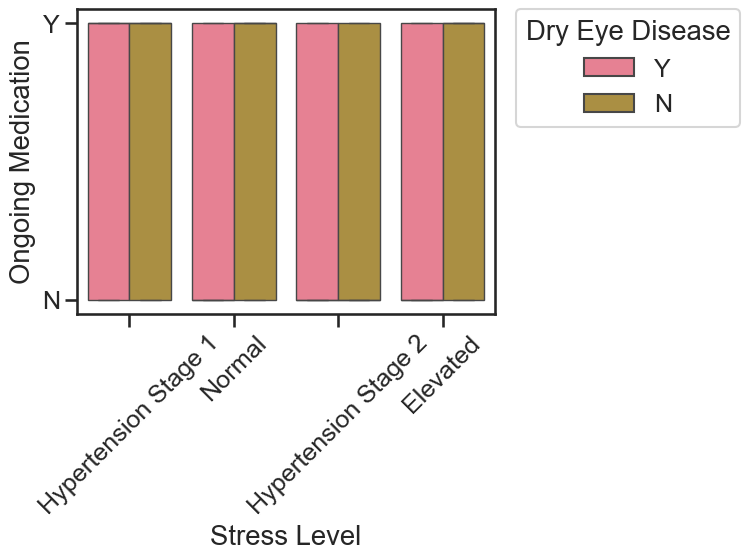

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


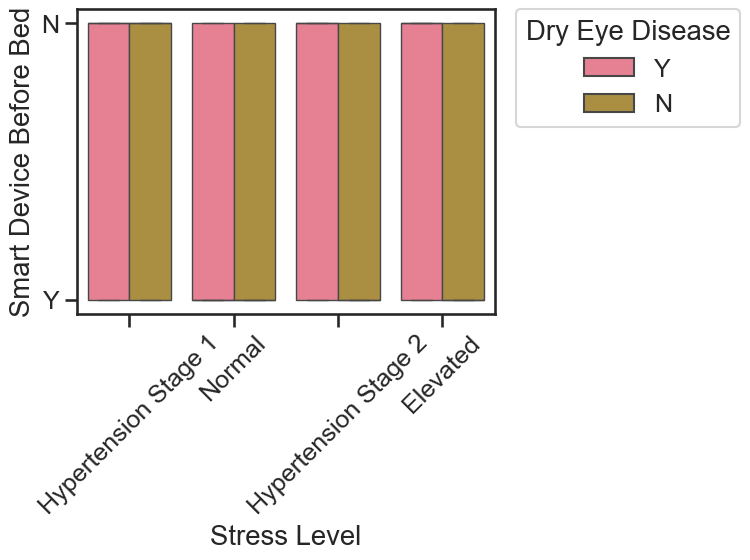

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


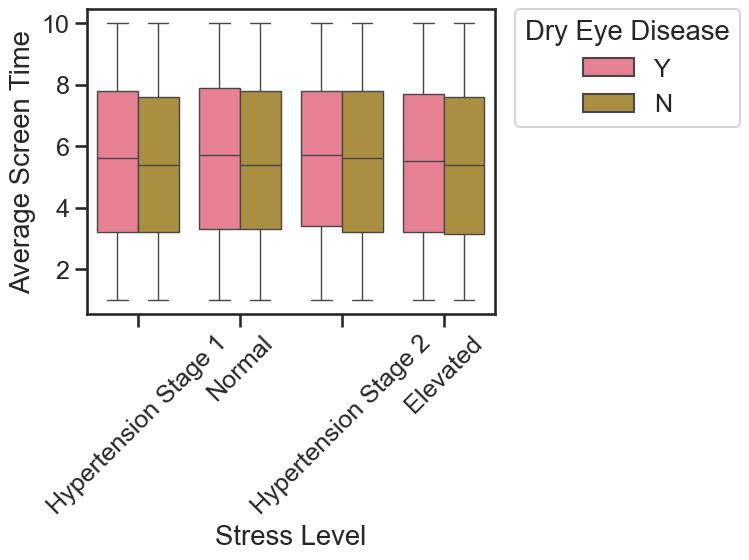

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


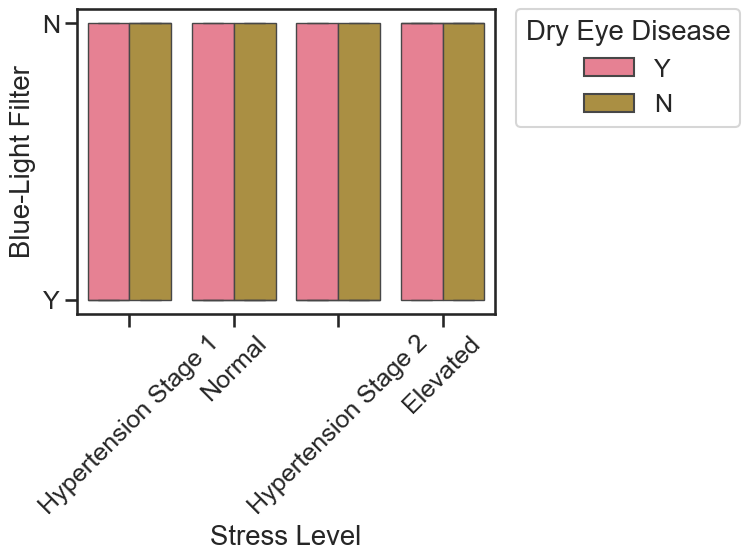

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


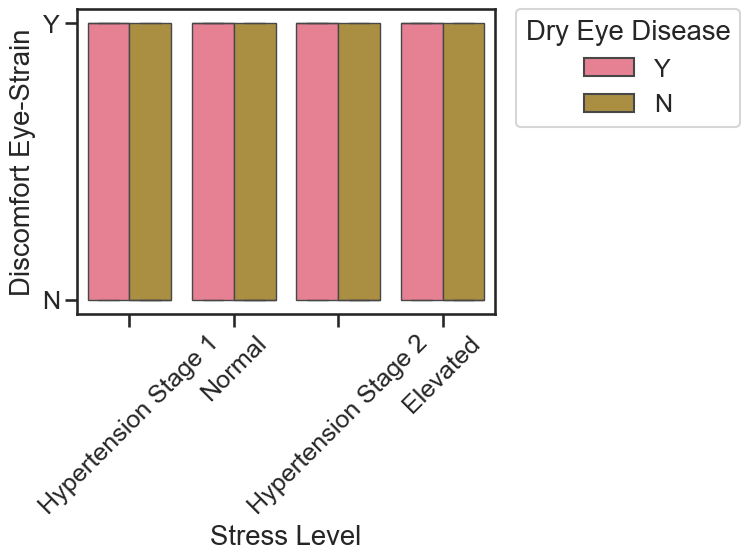

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


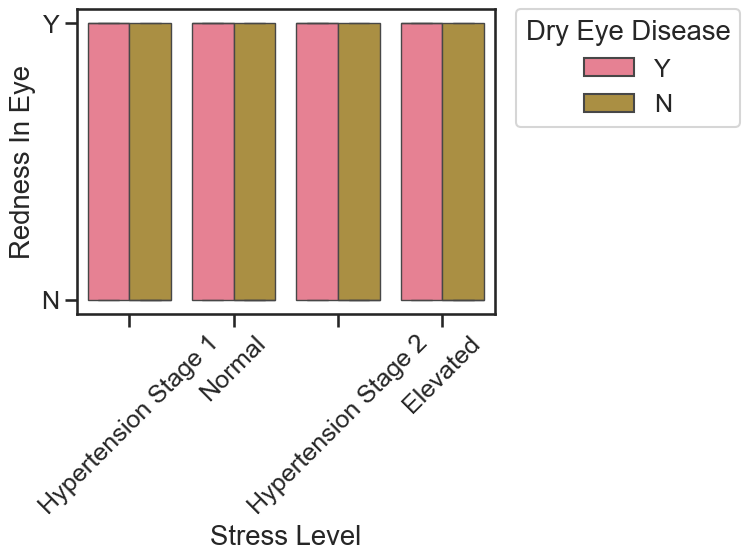

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


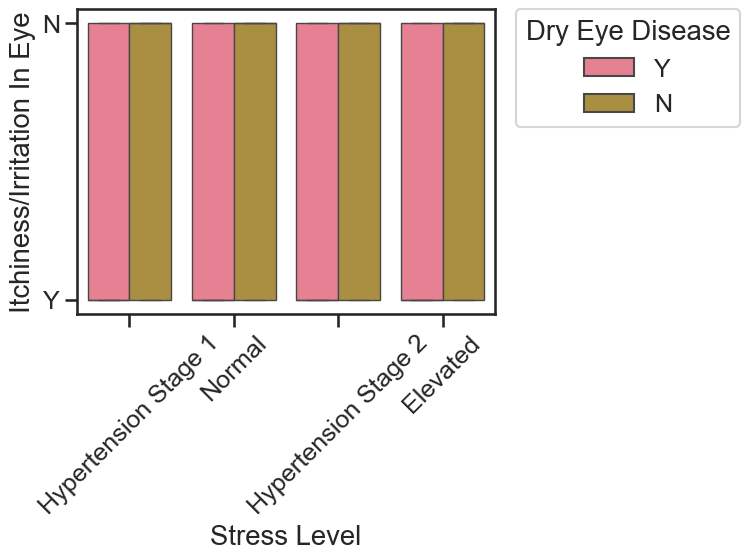

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


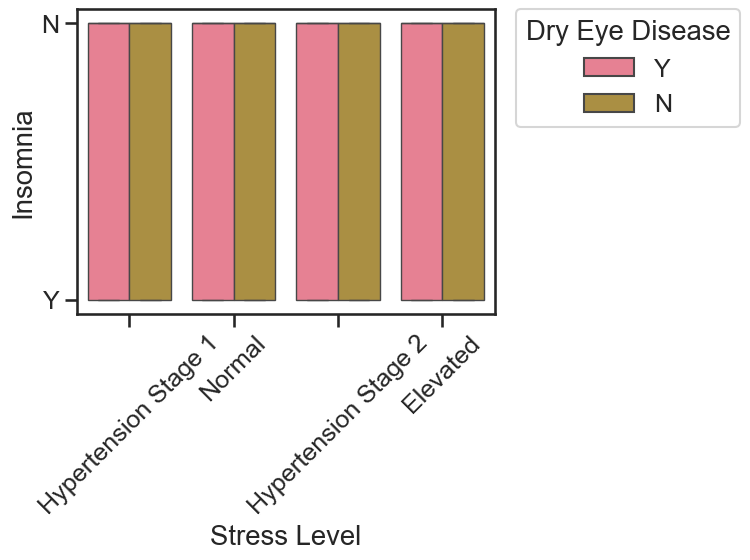

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1919432422.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


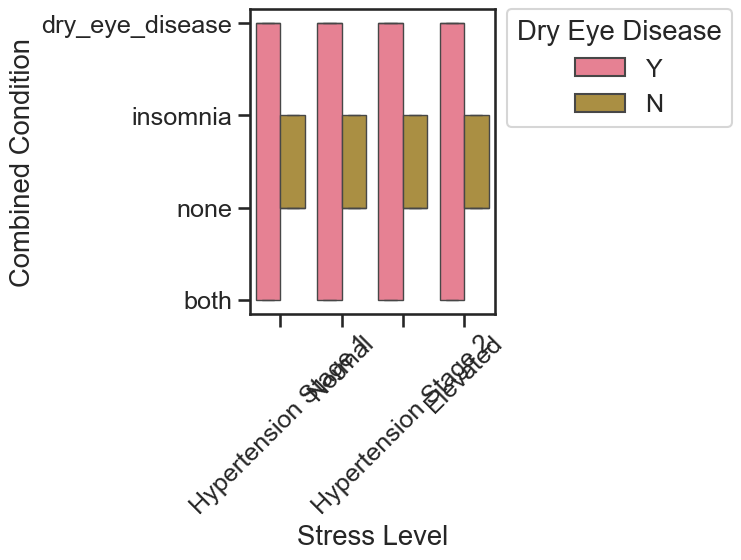

In [ ]:
features_to_remove = ["bp_category", "dry_eye_disease"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)
for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="bp_category", y=col,
                hue="dry_eye_disease",
                data=df)

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    #plt.title(f"Dry Eye Disease vs. {col.replace('_', ' ').title()} by Stress Level")
    plt.xticks(rotation=45)
    plt.xlabel("BP Category")
    plt.ylabel(col.replace('_', ' ').title())
    
    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),\
        loc='upper left', borderaxespad=0., title='Dry Eye Disease')
    
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
#sns.despine(offset=10, trim=True)

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


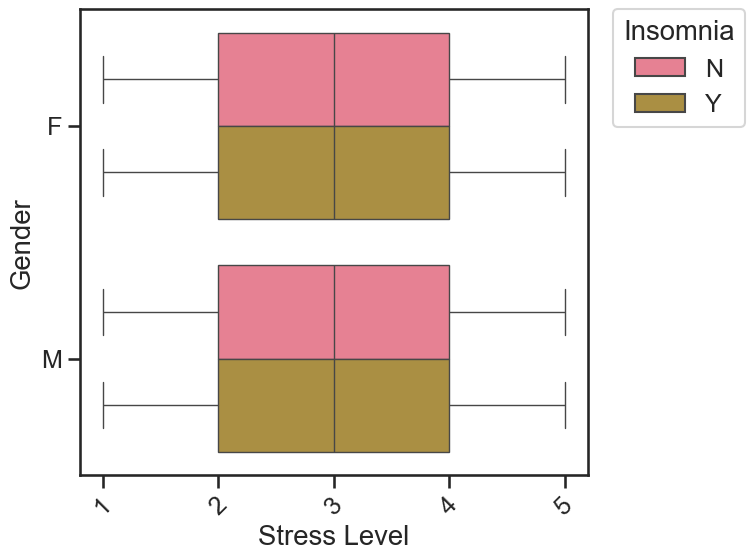

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


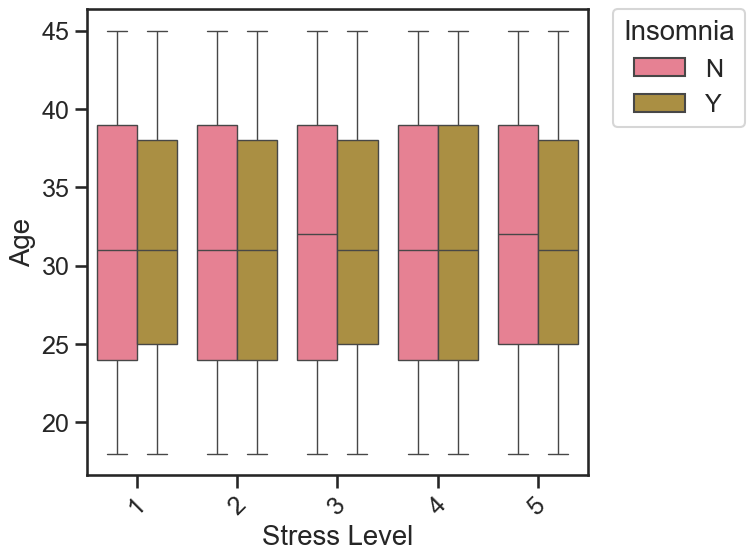

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


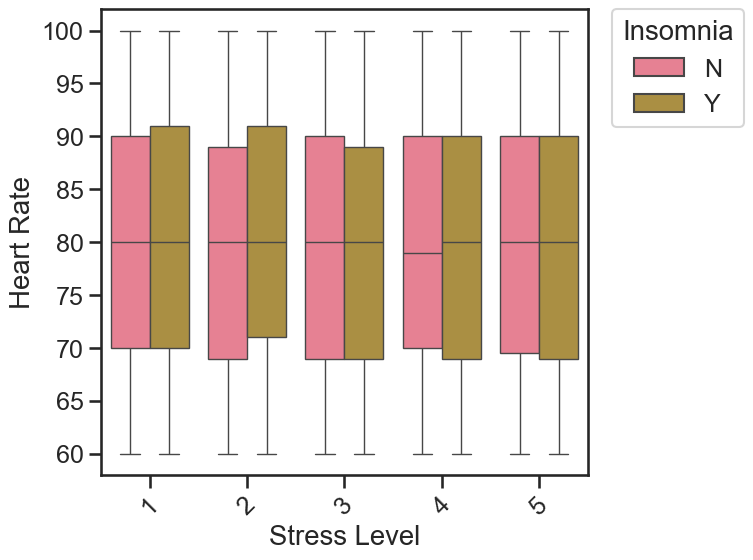

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


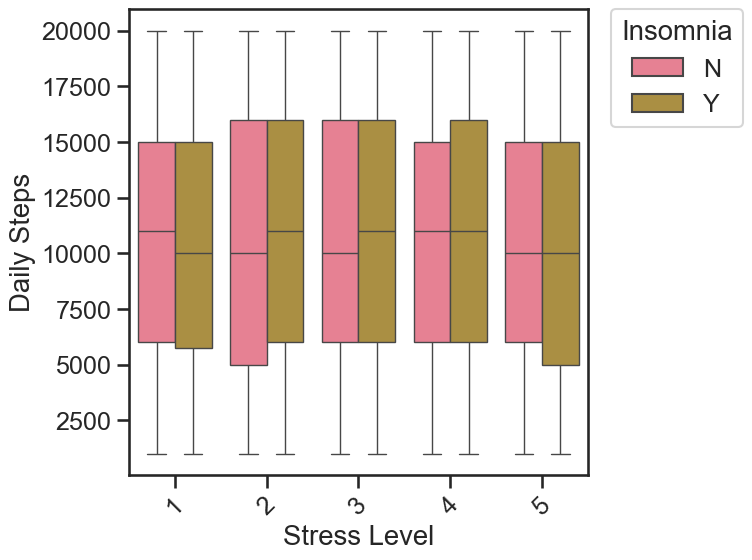

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


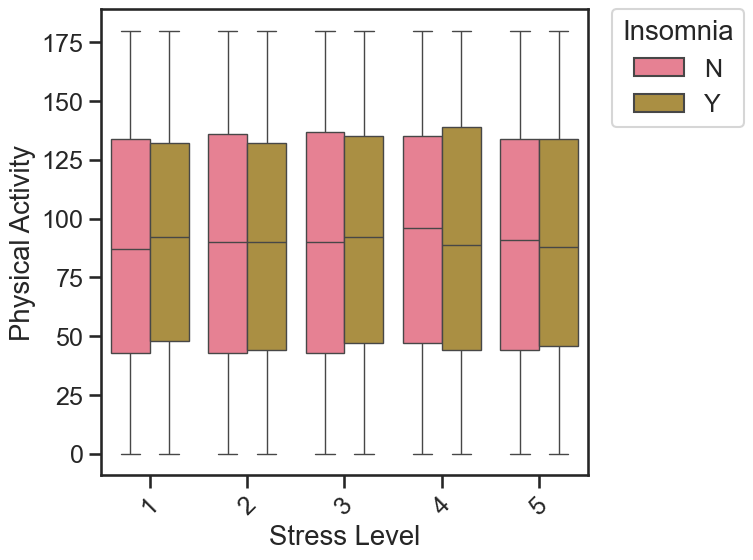

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


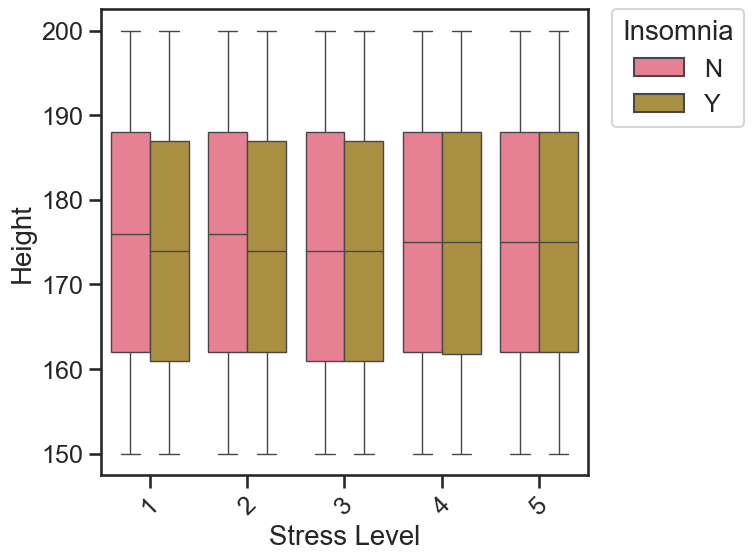

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


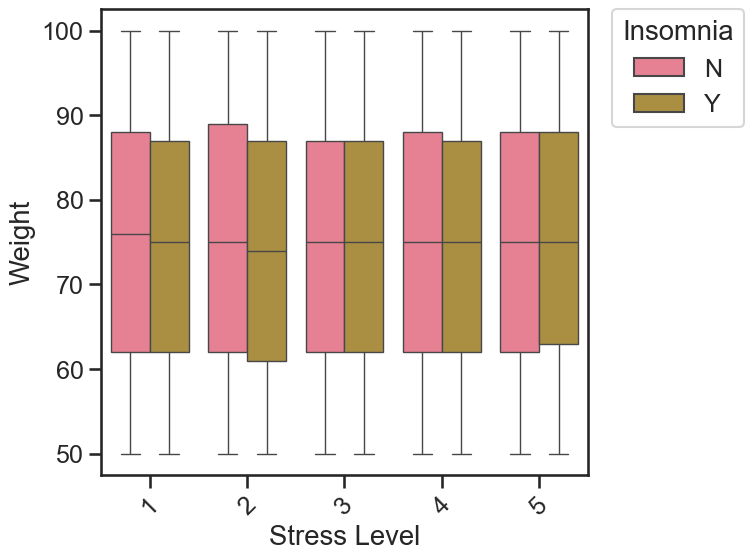

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


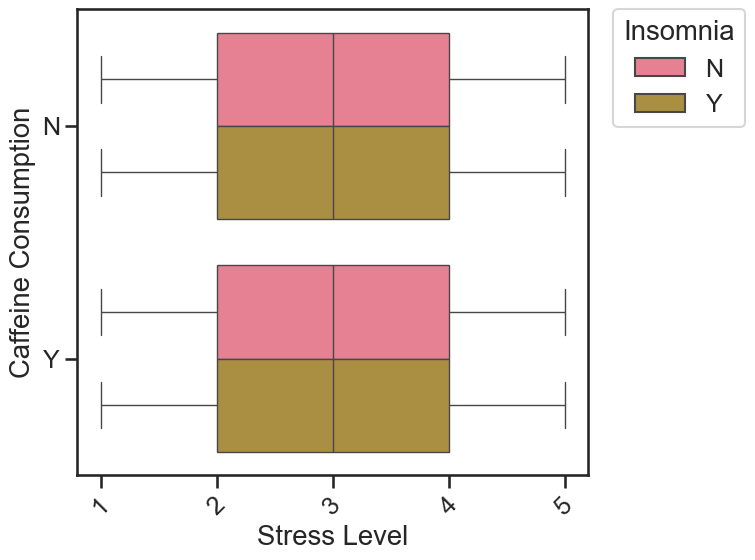

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


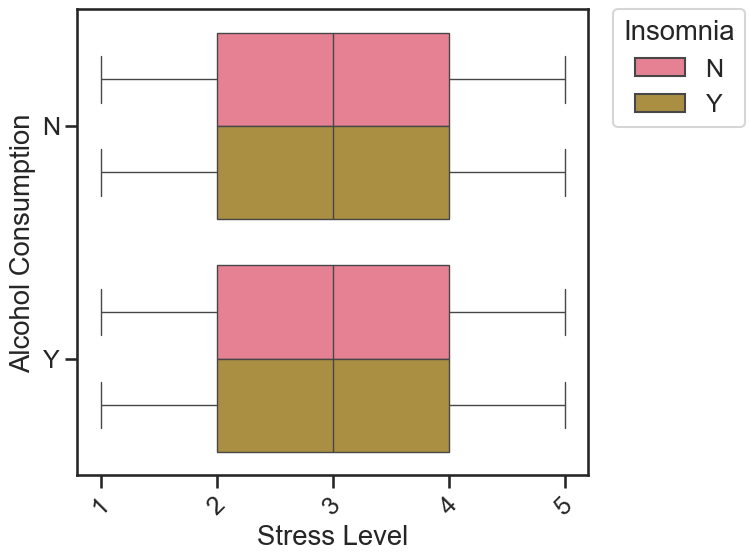

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


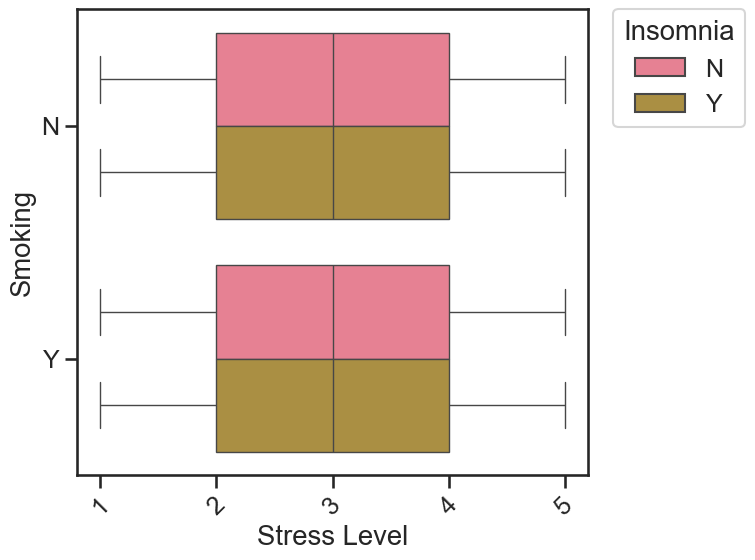

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


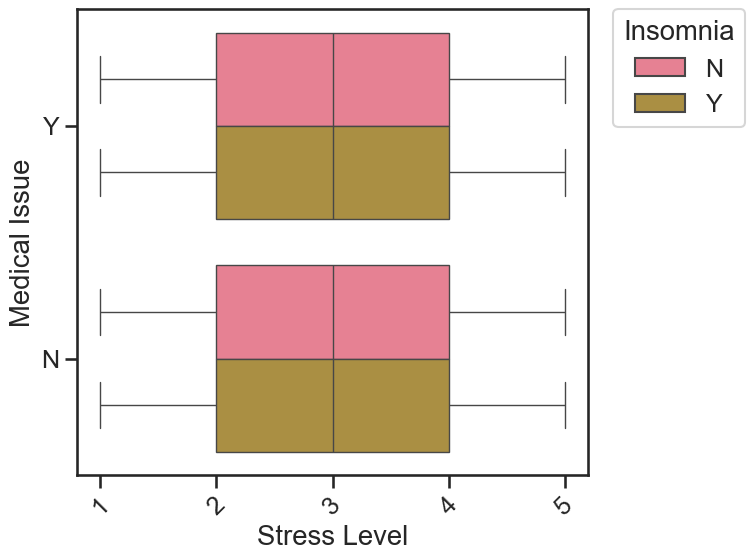

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


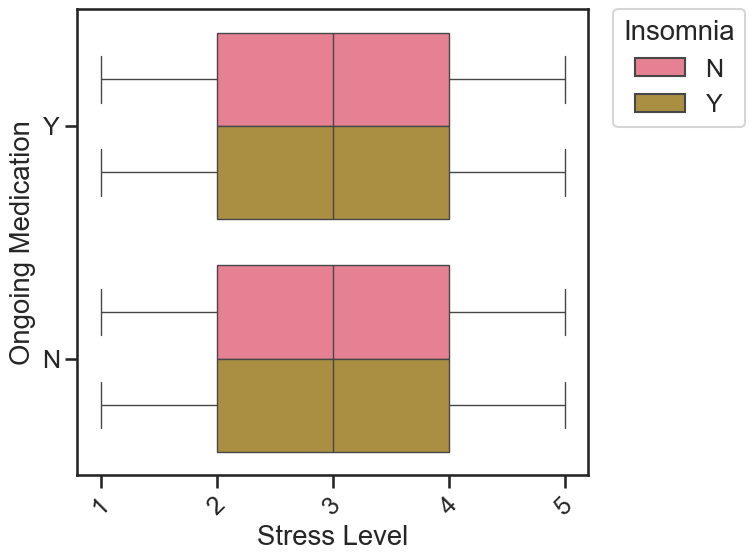

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


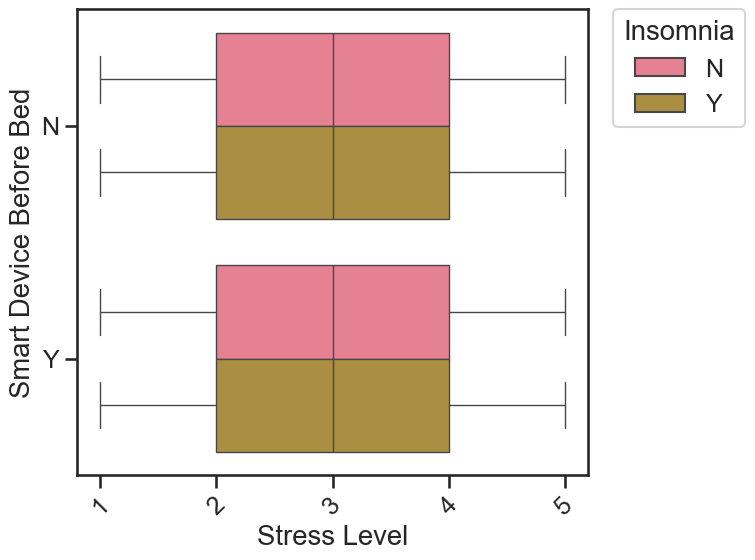

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


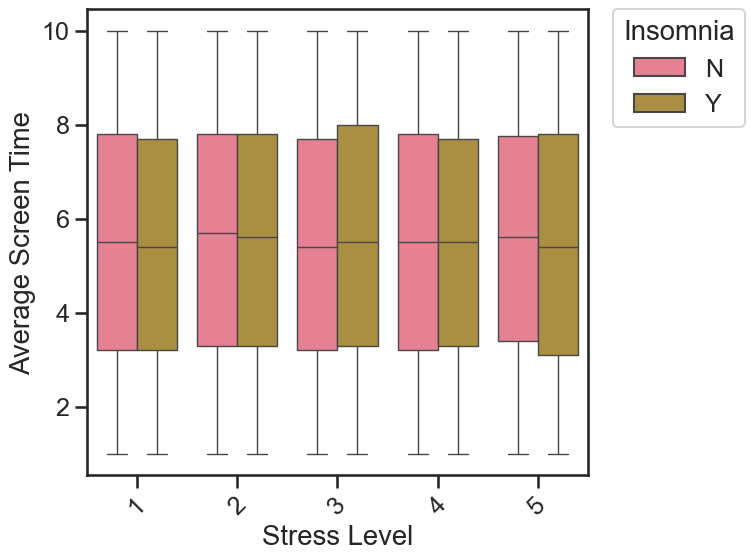

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


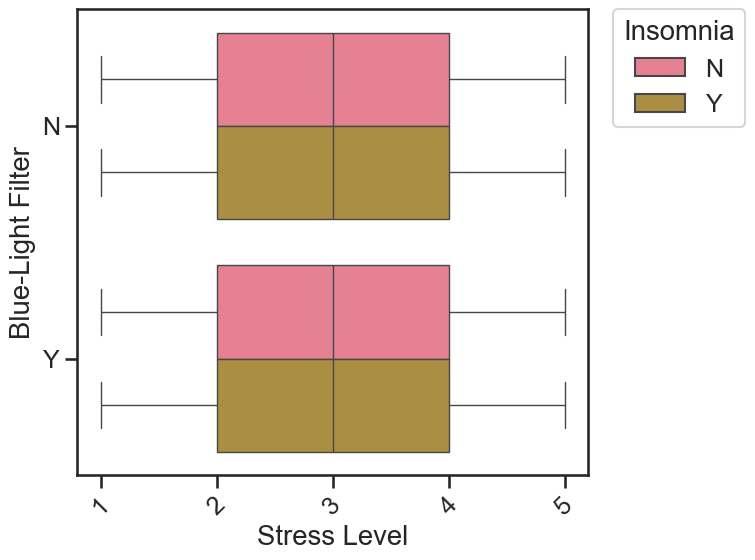

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


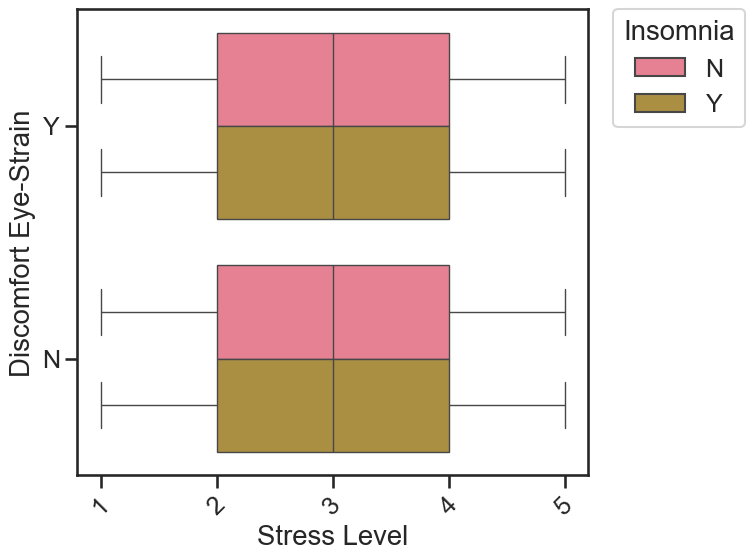

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


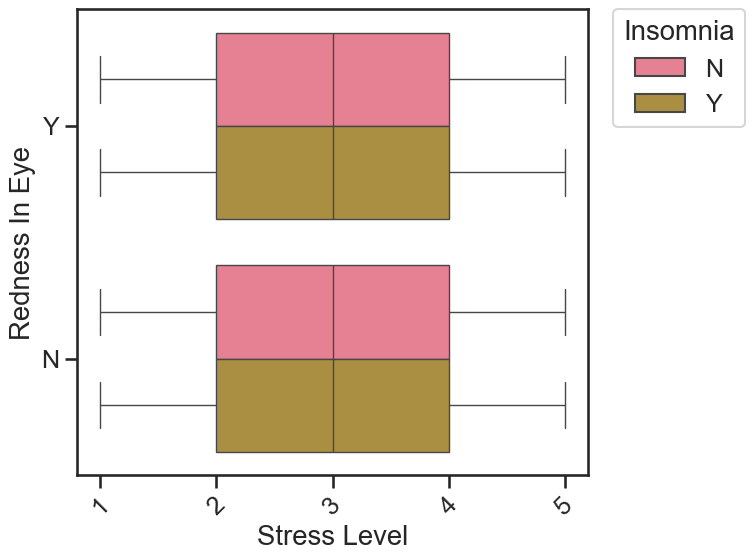

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


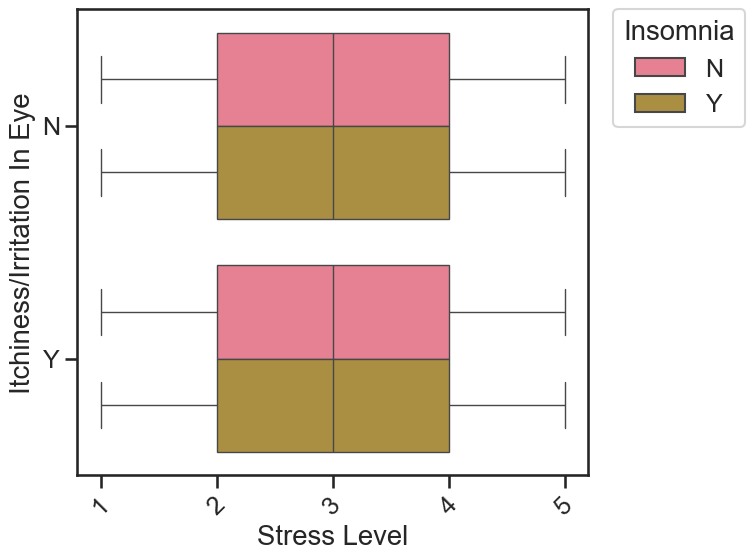

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


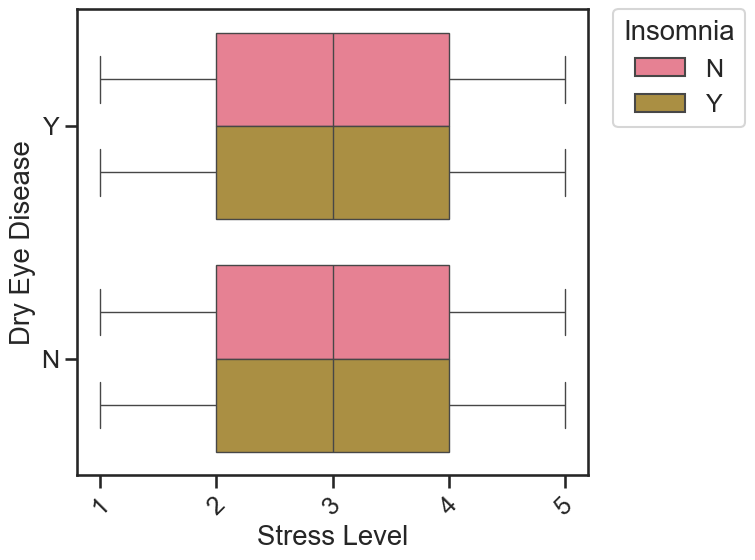

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


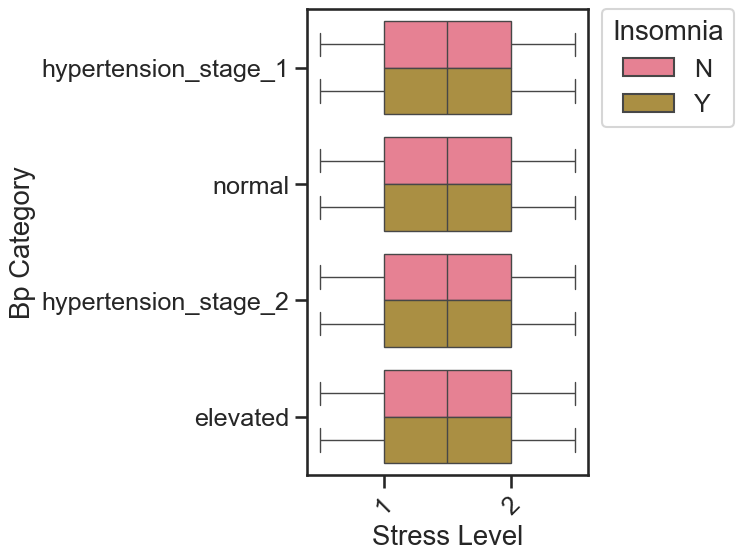

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1961658146.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


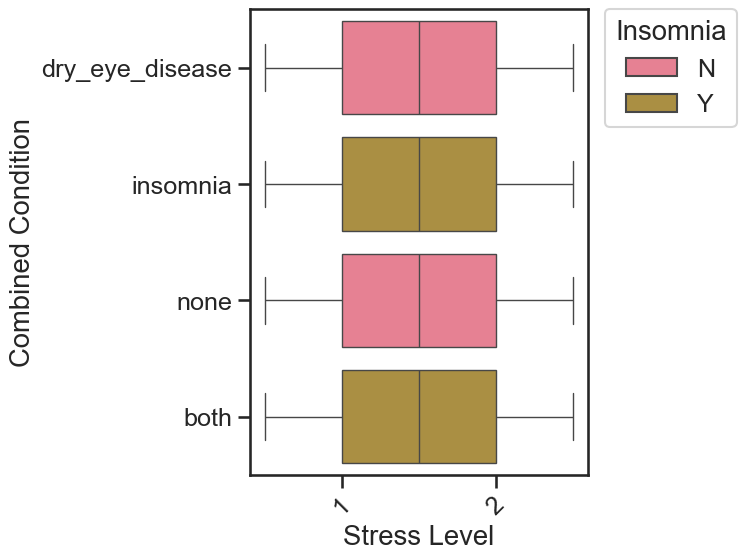

In [206]:
features_to_remove = ["stress_level", "insomnia"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)
for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="stress_level", y=col,
                hue="insomnia",
                data=df)

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    #plt.title(f"Dry Eye Disease vs. {col.replace('_', ' ').title()} by Stress Level")
    plt.xticks(rotation=45)
    plt.xlabel("Stress Level")
    plt.ylabel(col.replace('_', ' ').title())
    
    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),\
        loc='upper left', borderaxespad=0., title='Insomnia')
    
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
#sns.despine(offset=10, trim=True)

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


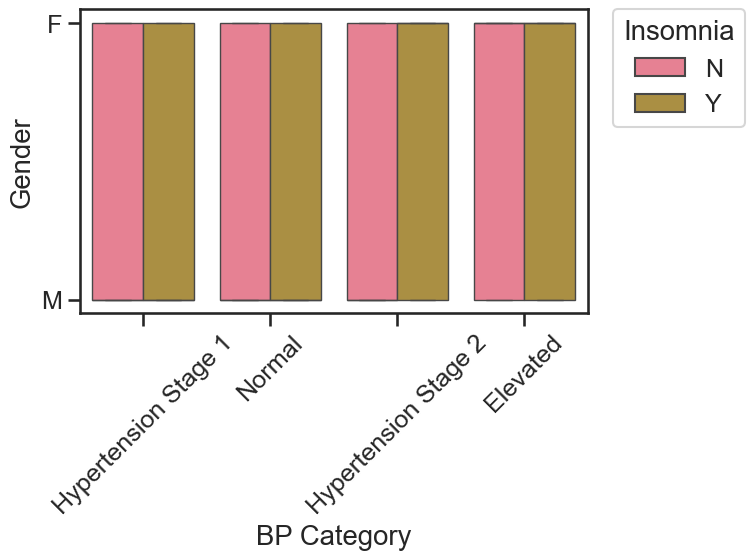

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


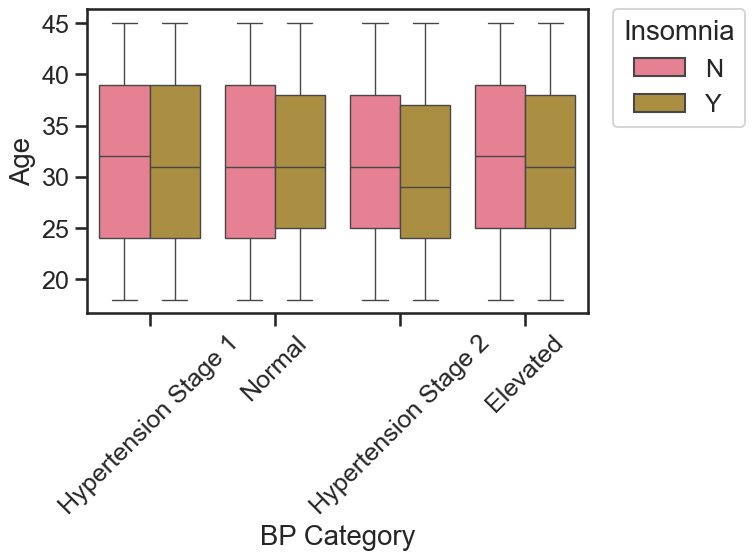

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


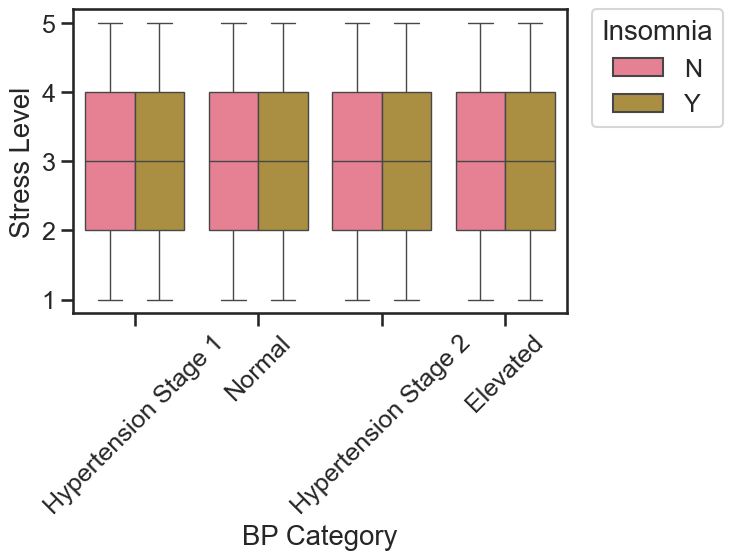

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


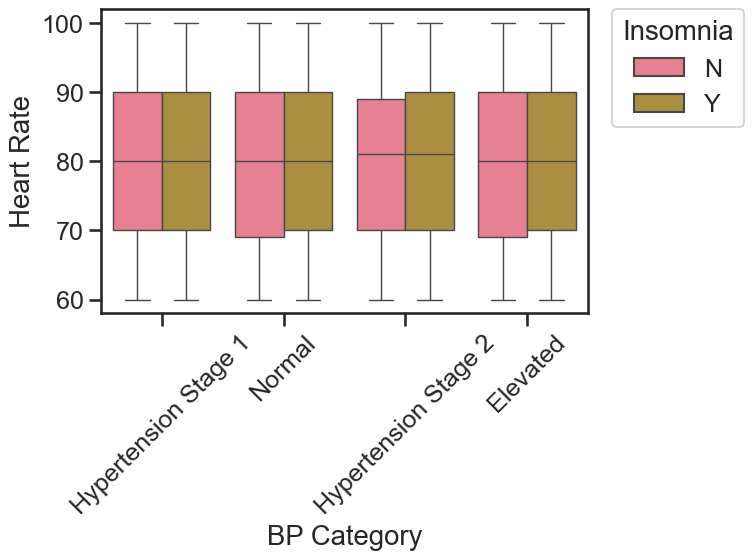

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


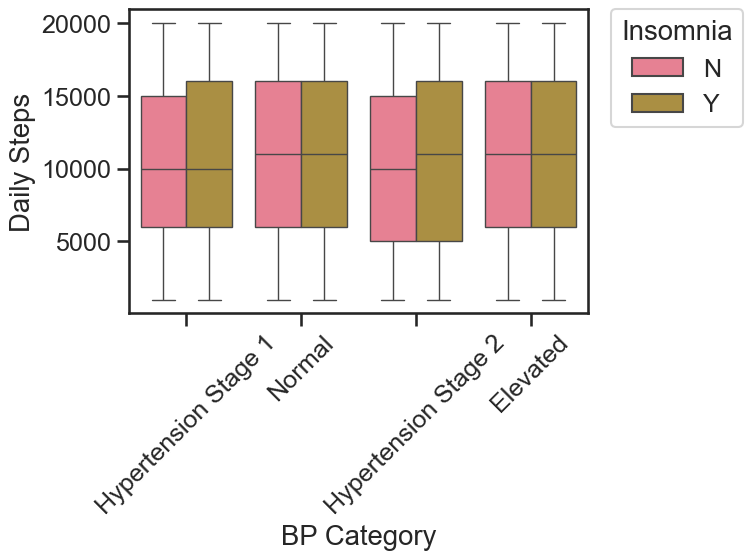

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


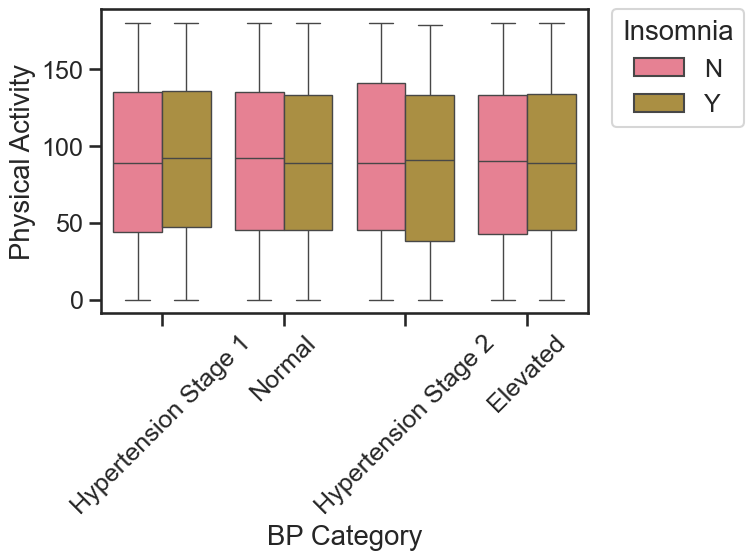

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


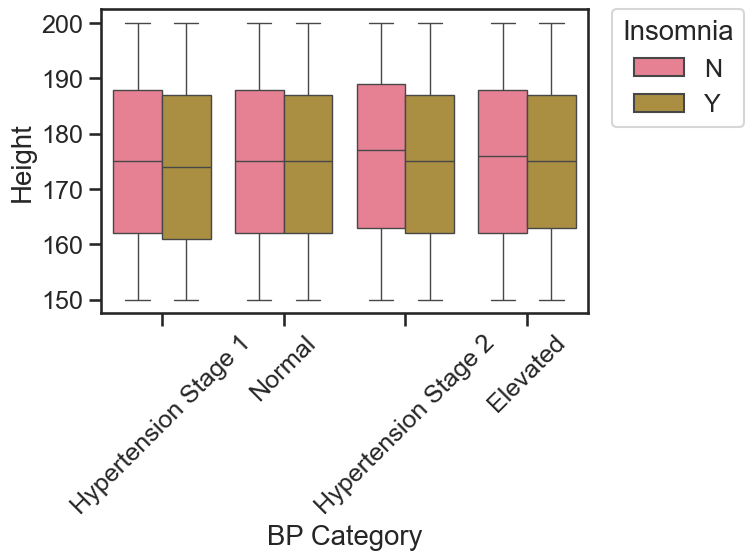

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


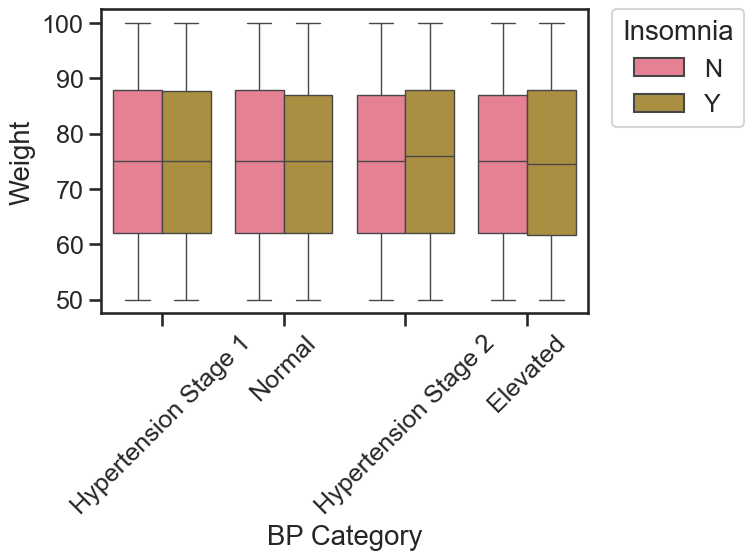

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


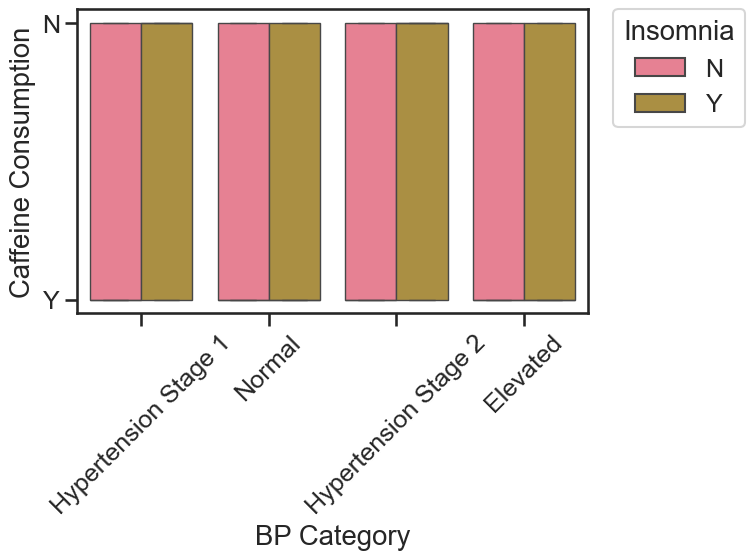

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


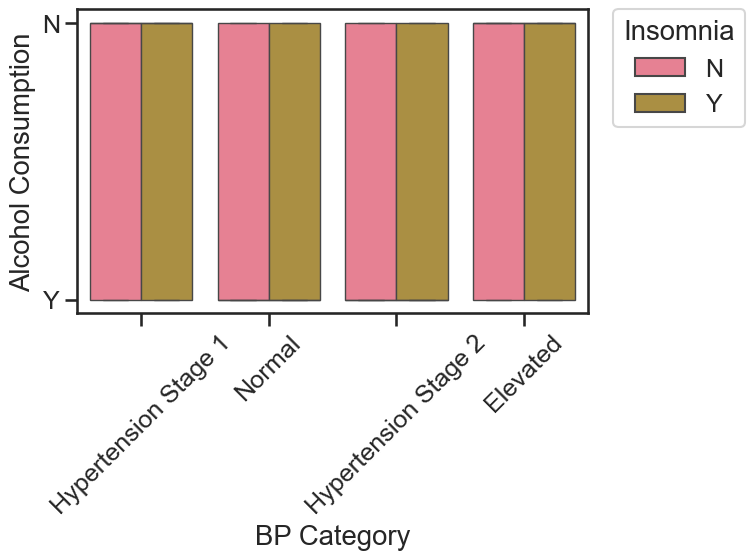

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


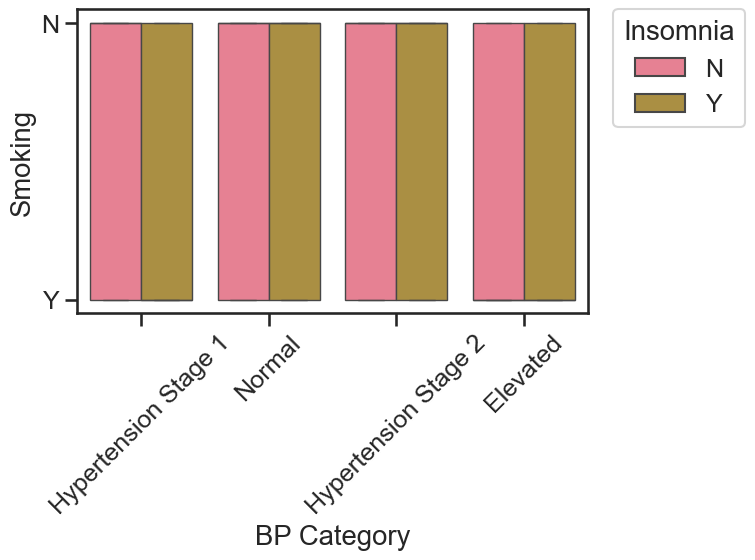

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


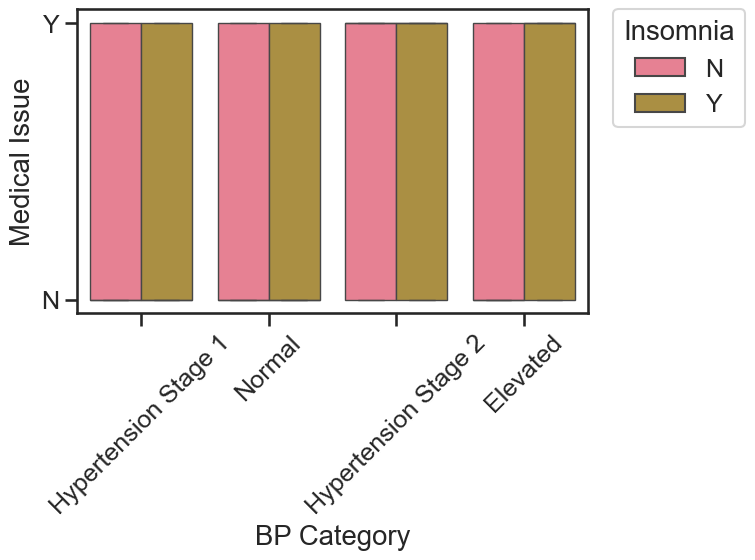

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


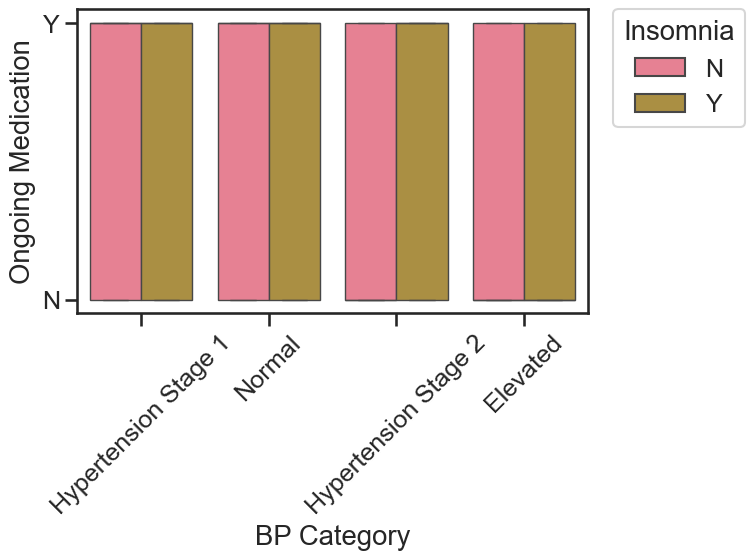

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


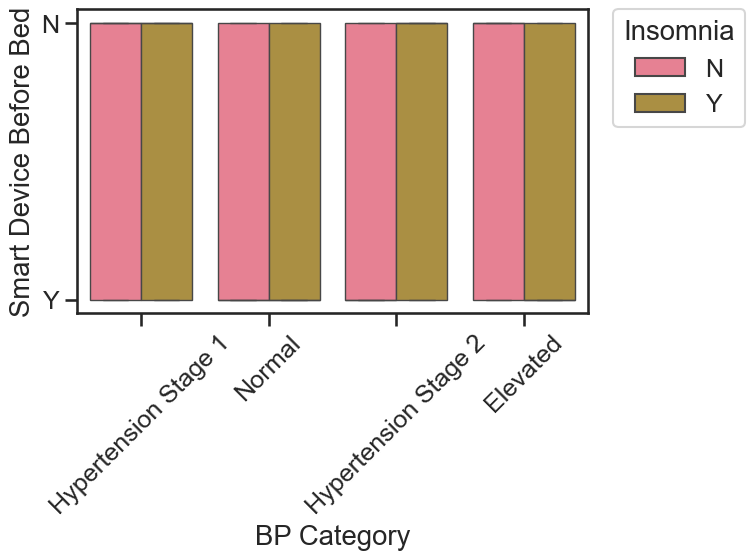

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


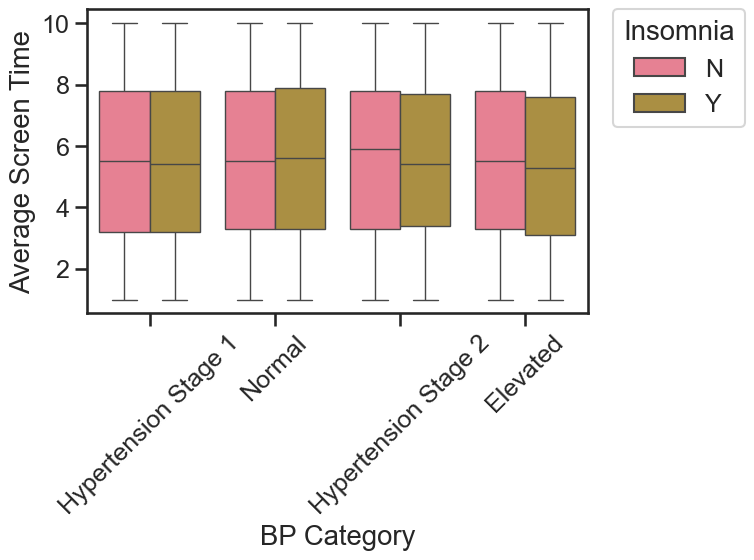

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


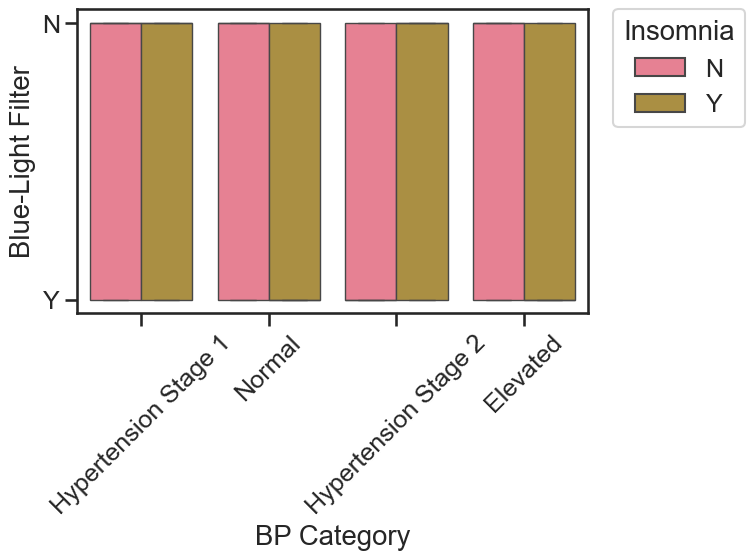

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


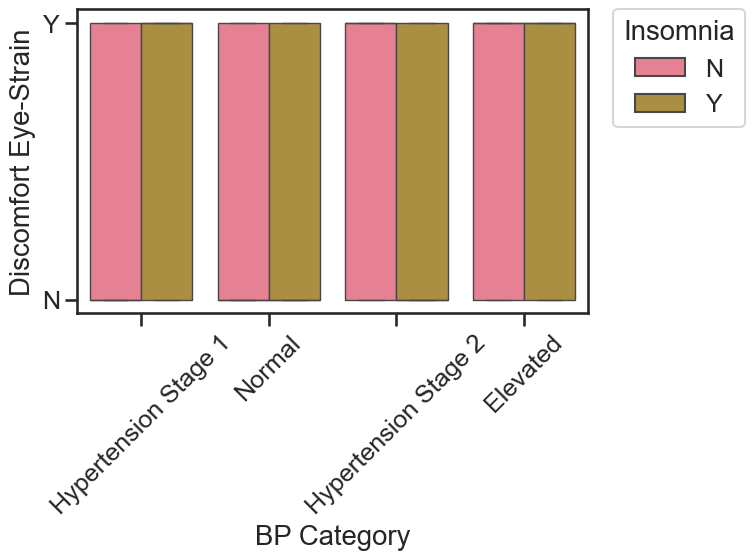

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


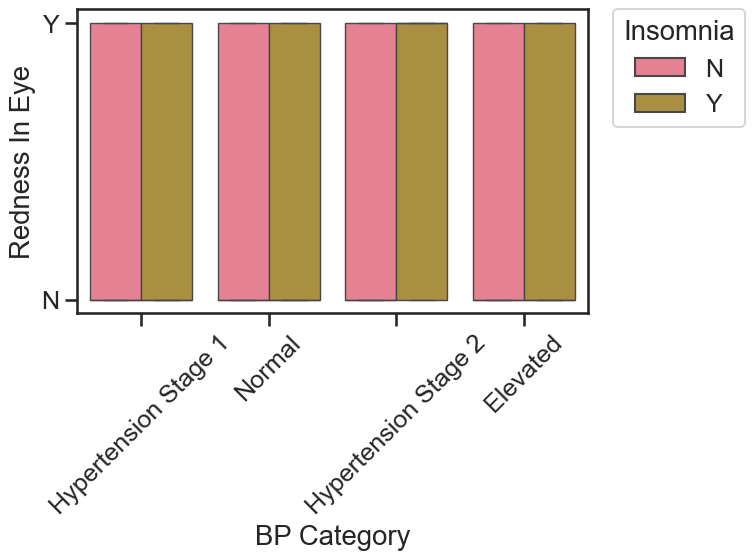

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


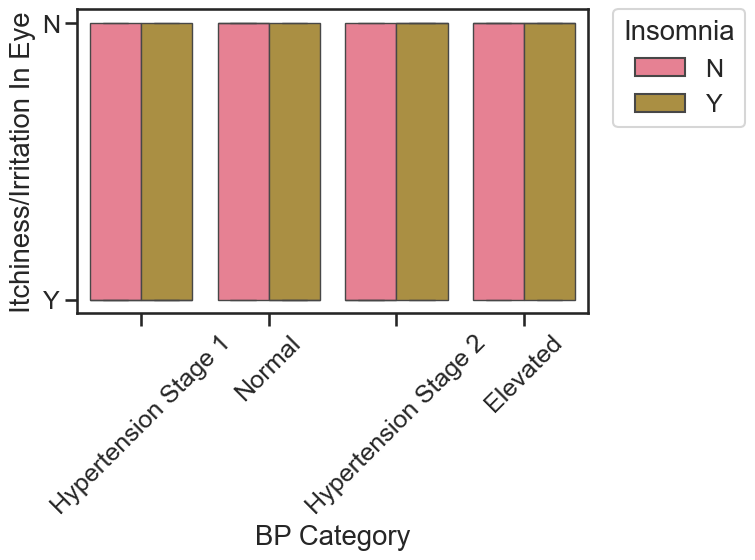

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


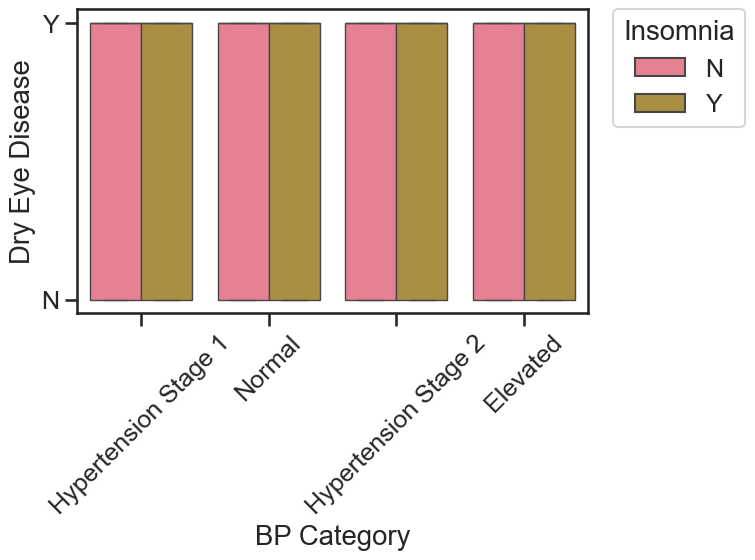

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1833356361.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


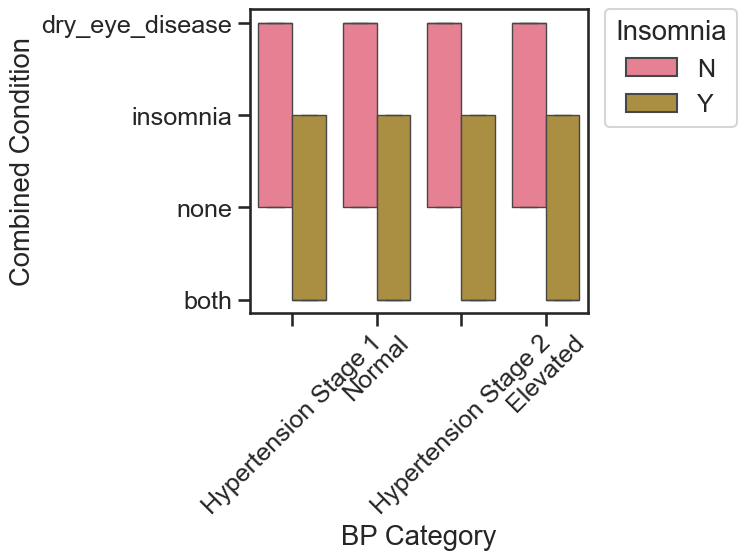

In [207]:
features_to_remove = ["bp_category", "insomnia"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)
for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="bp_category", y=col,
                hue="insomnia",
                data=df)

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    #plt.title(f"Dry Eye Disease vs. {col.replace('_', ' ').title()} by Stress Level")
    plt.xticks(rotation=45)
    plt.xlabel("BP Category")
    plt.ylabel(col.replace('_', ' ').title())
    
    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),\
        loc='upper left', borderaxespad=0., title='Insomnia')
    
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
#sns.despine(offset=10, trim=True)


/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


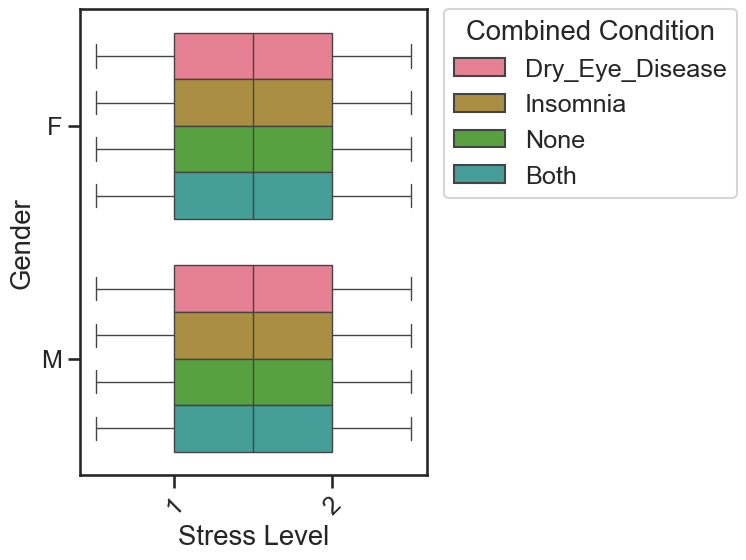

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


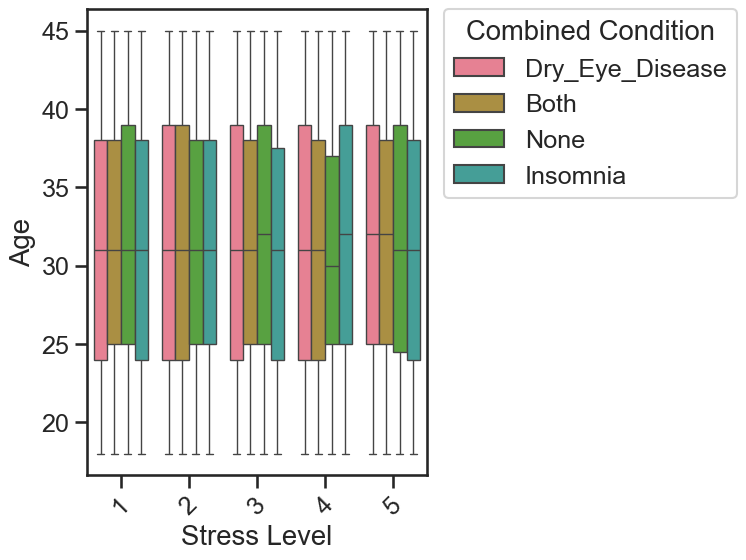

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


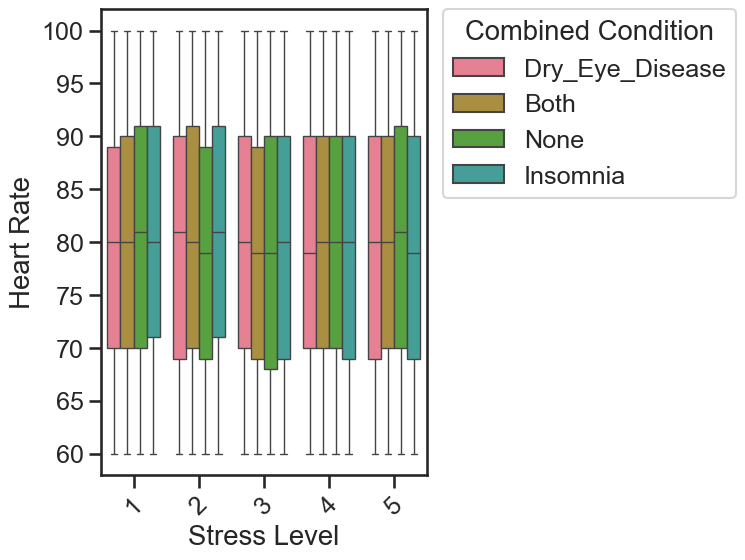

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


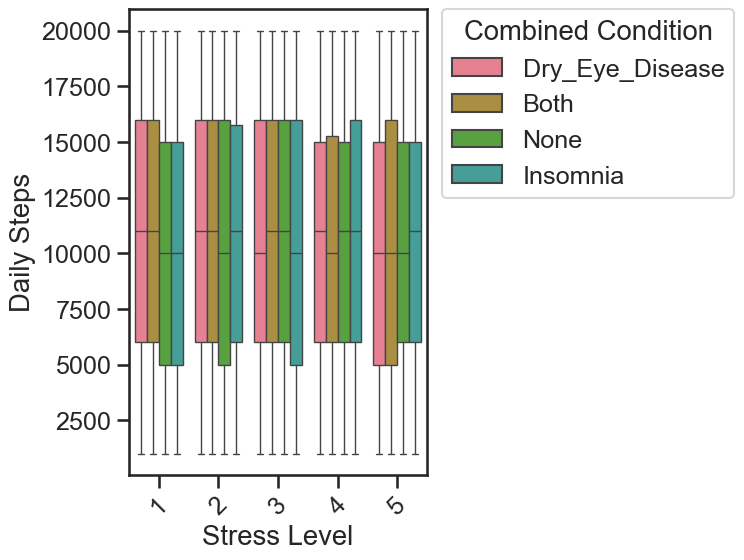

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


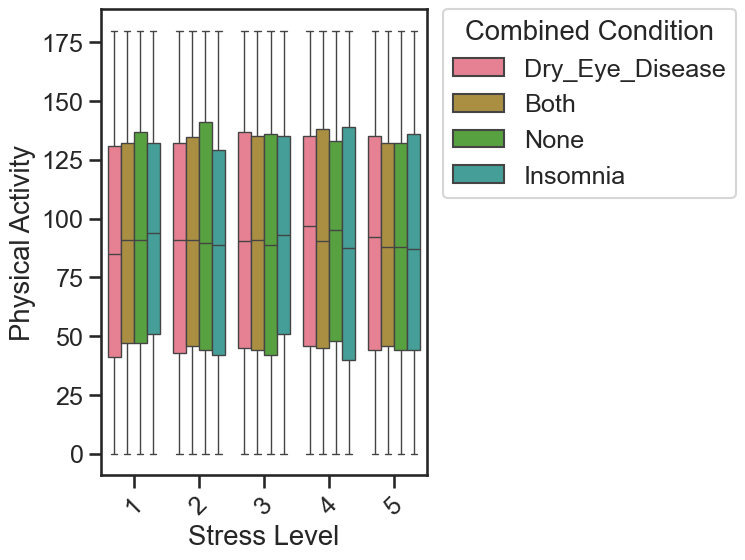

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


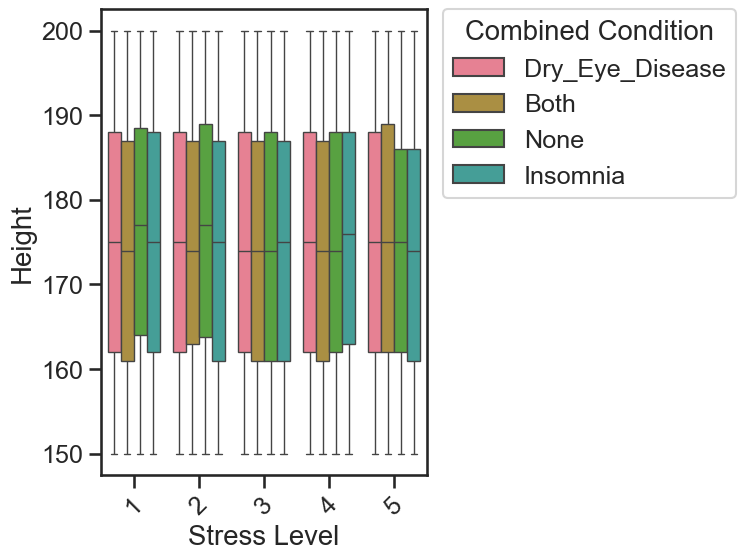

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


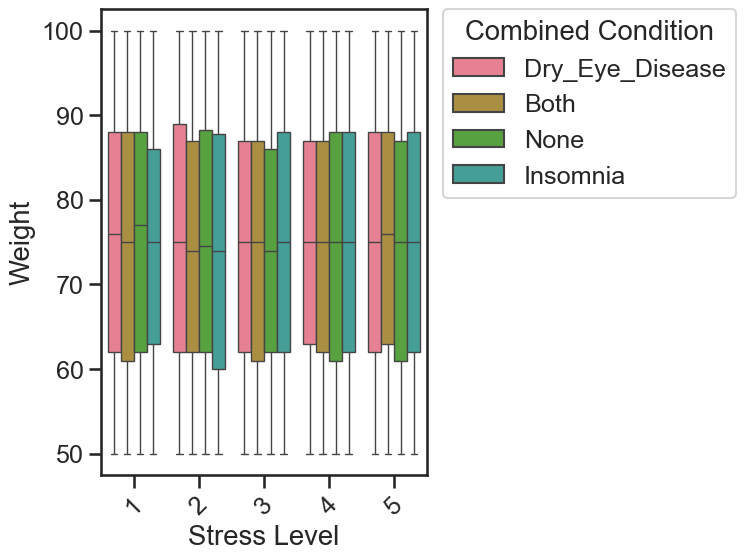

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


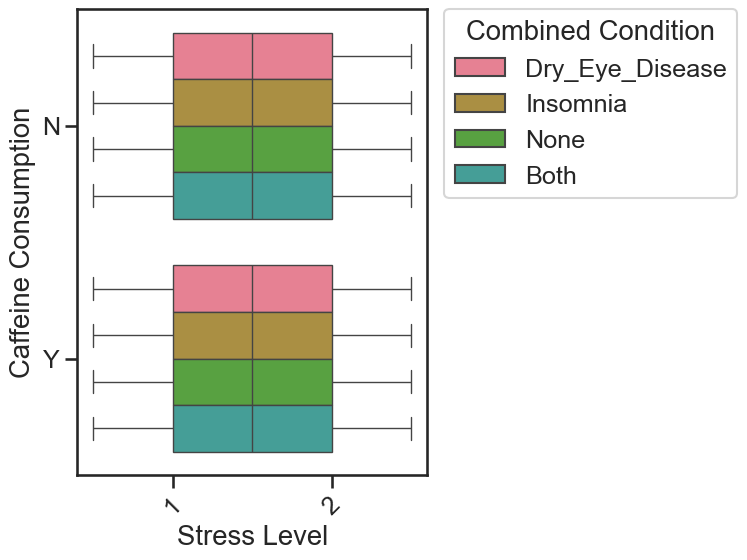

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


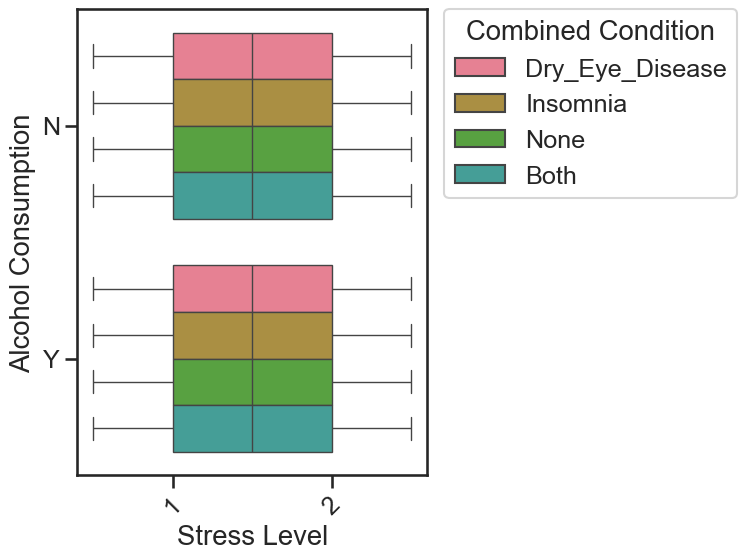

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


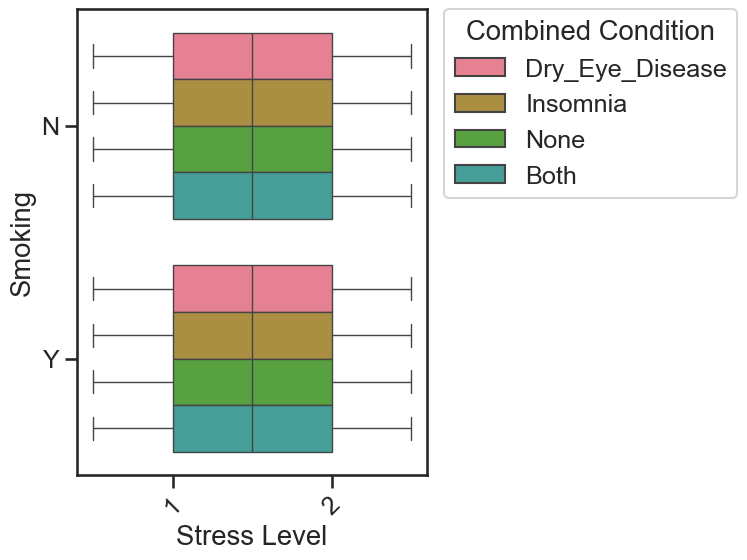

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


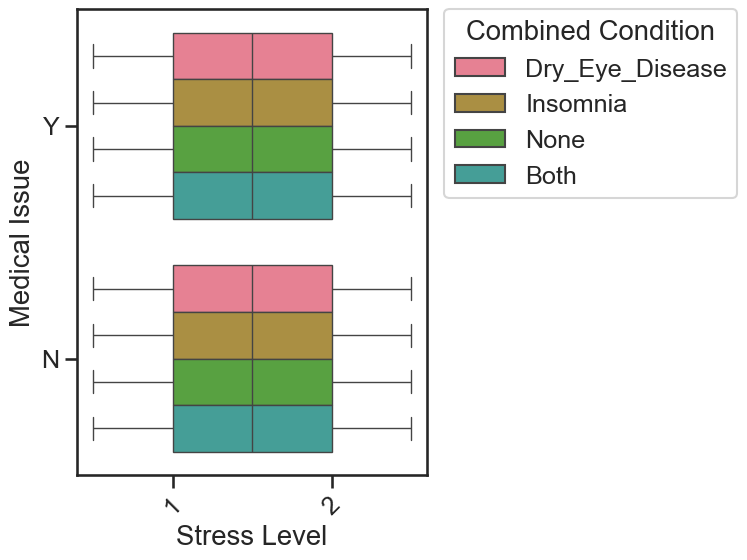

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


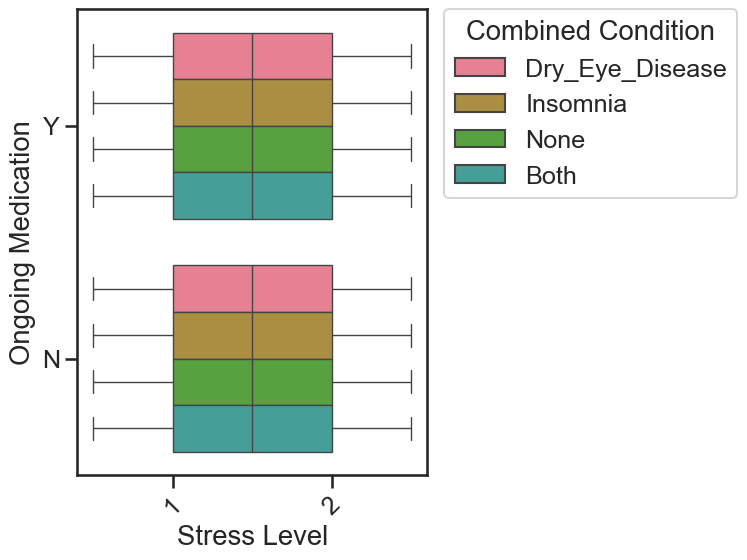

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


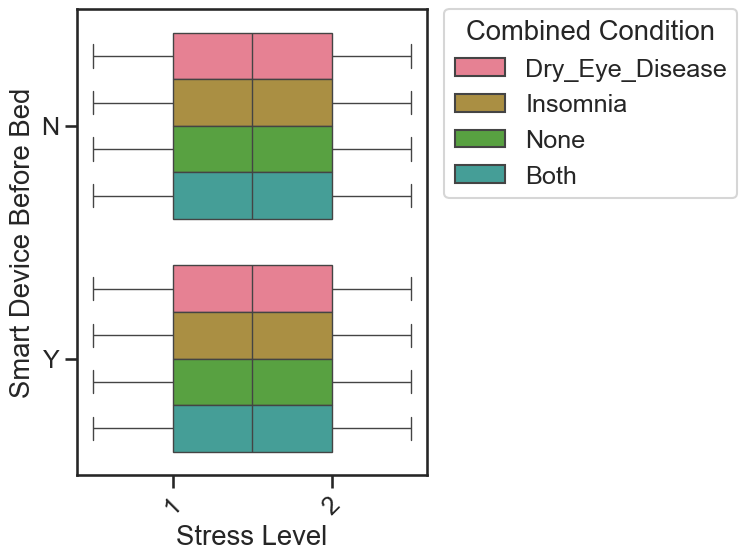

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


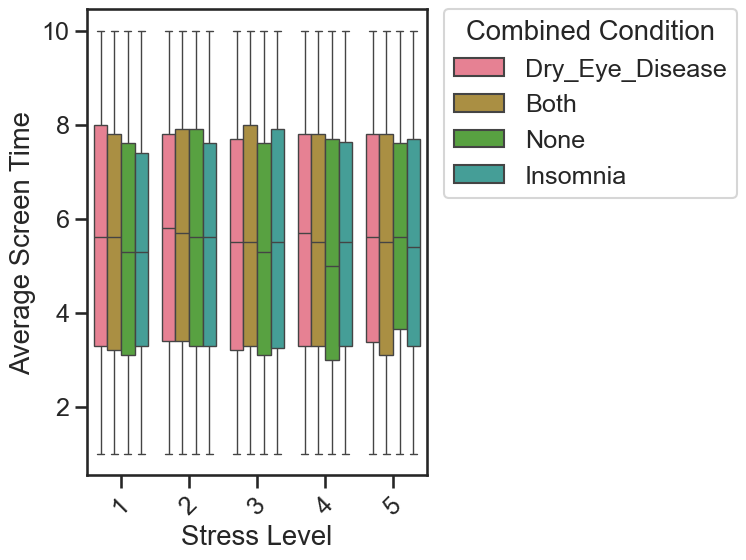

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


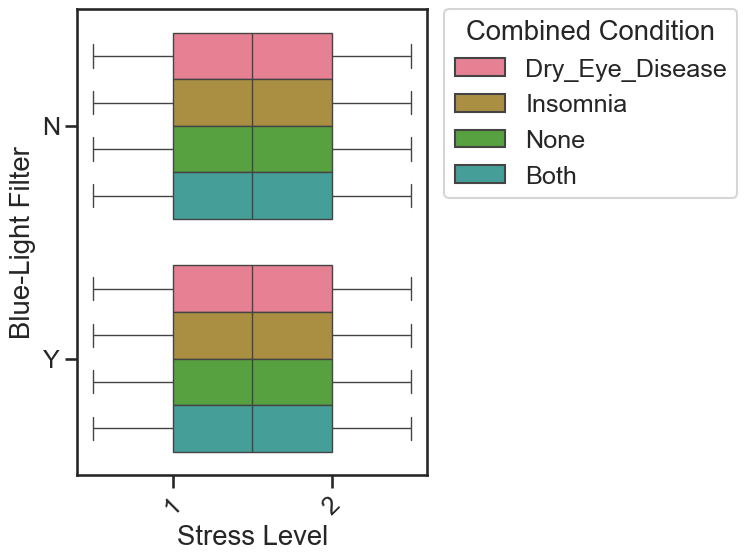

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


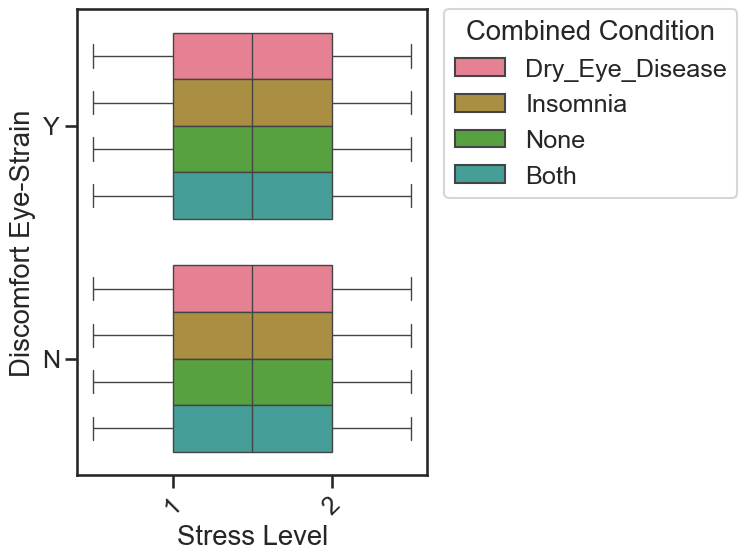

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


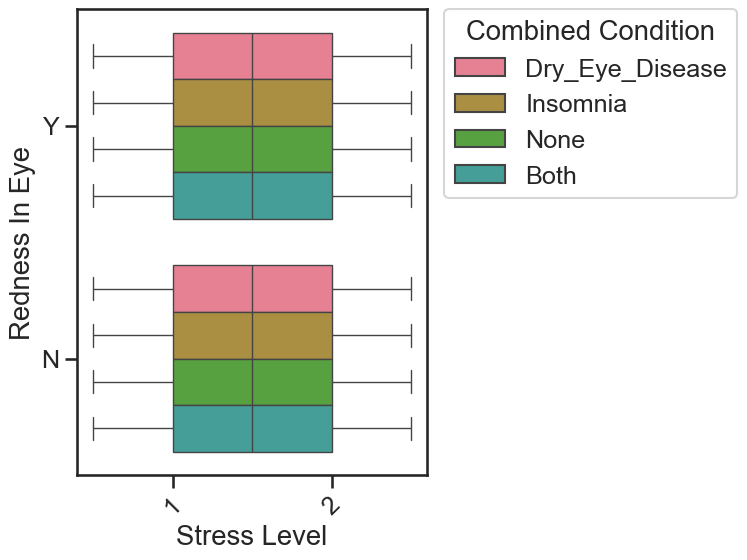

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


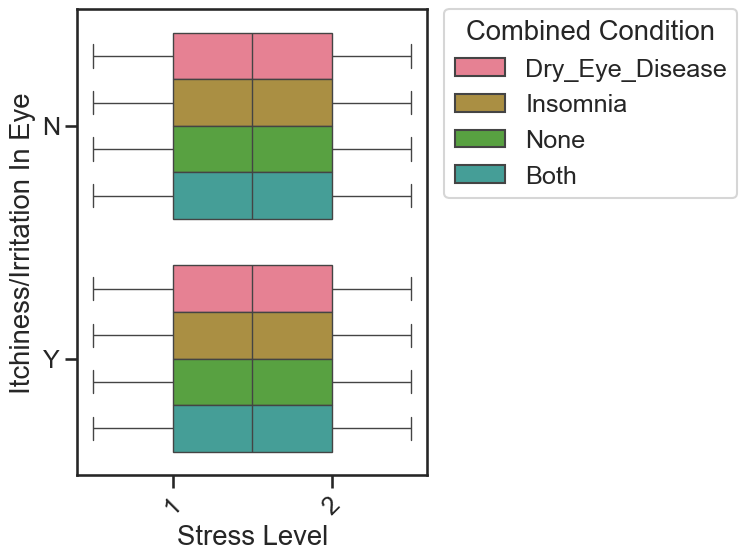

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


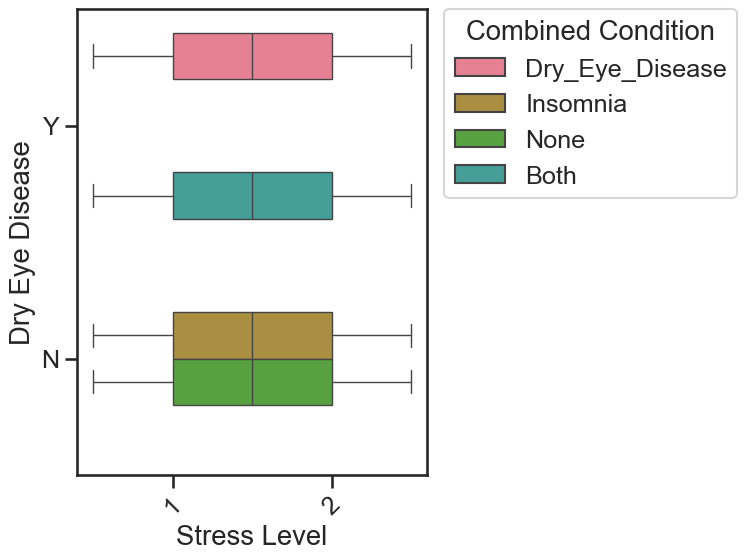

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


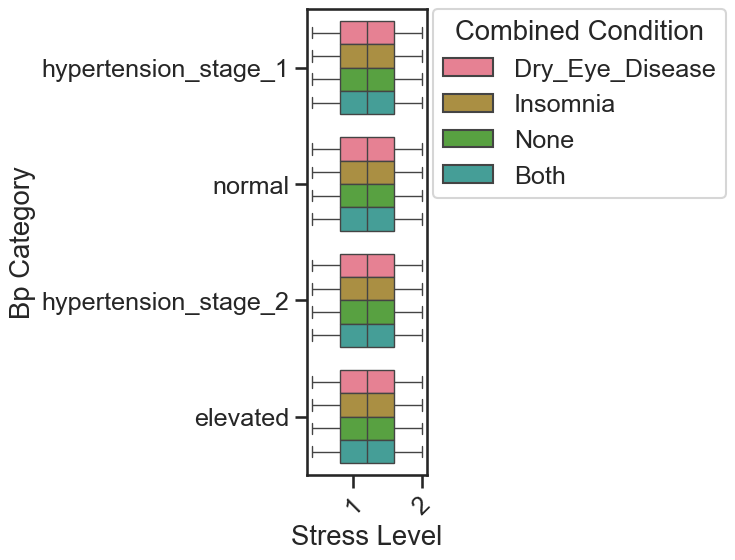

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/3904600273.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


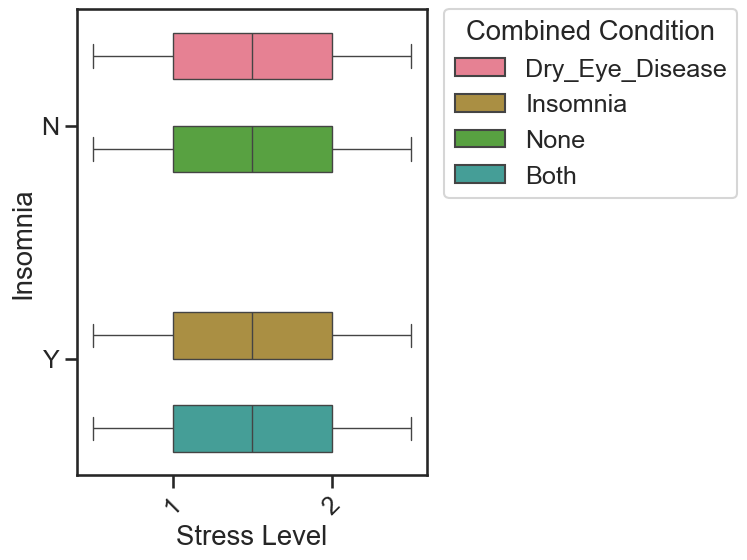

In [208]:
features_to_remove = ["stress_level", "combined_condition"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)
for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="stress_level", y=col,
                hue="combined_condition",
                data=df)

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    #plt.title(f"Dry Eye Disease vs. {col.replace('_', ' ').title()} by Stress Level")
    plt.xticks(rotation=45)
    plt.xlabel("Stress Level")
    plt.ylabel(col.replace('_', ' ').title())
    
    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),\
        loc='upper left', borderaxespad=0., title='Combined Condition')
    
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
#sns.despine(offset=10, trim=True)


/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


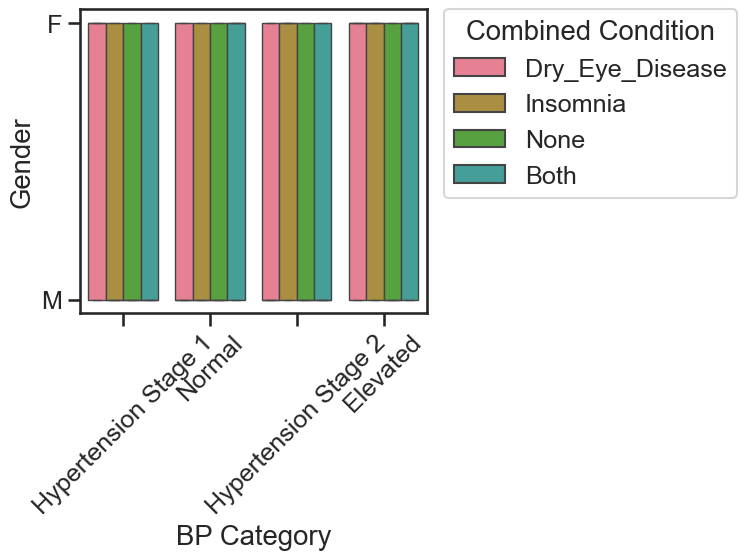

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


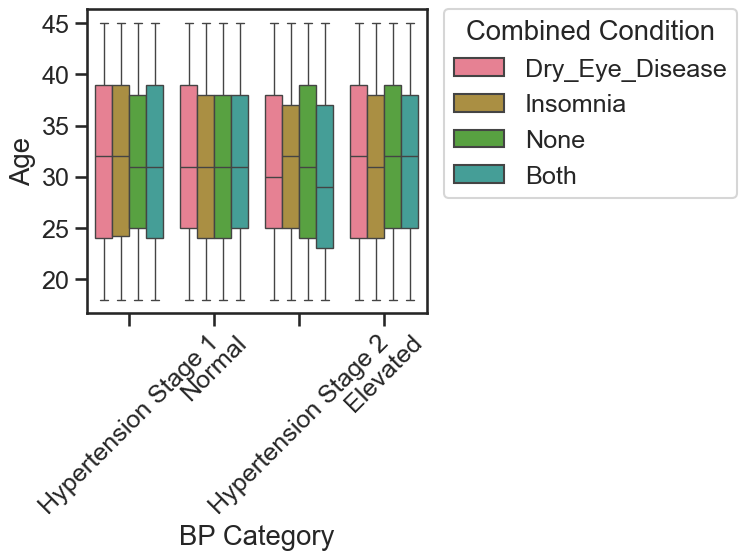

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


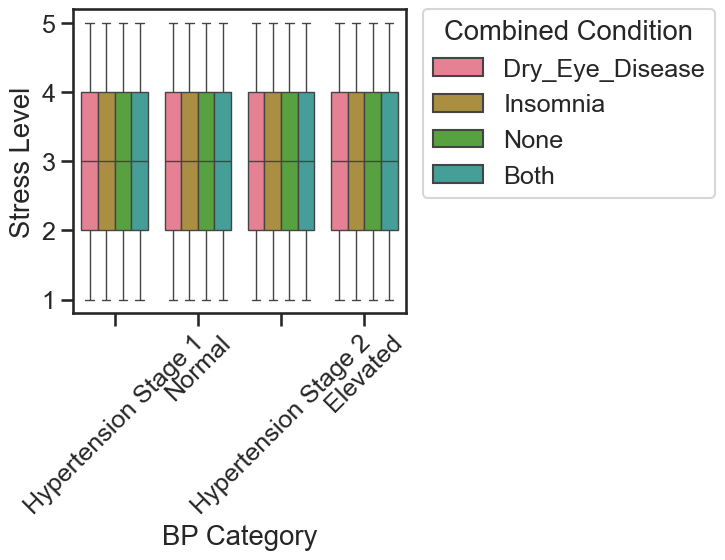

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


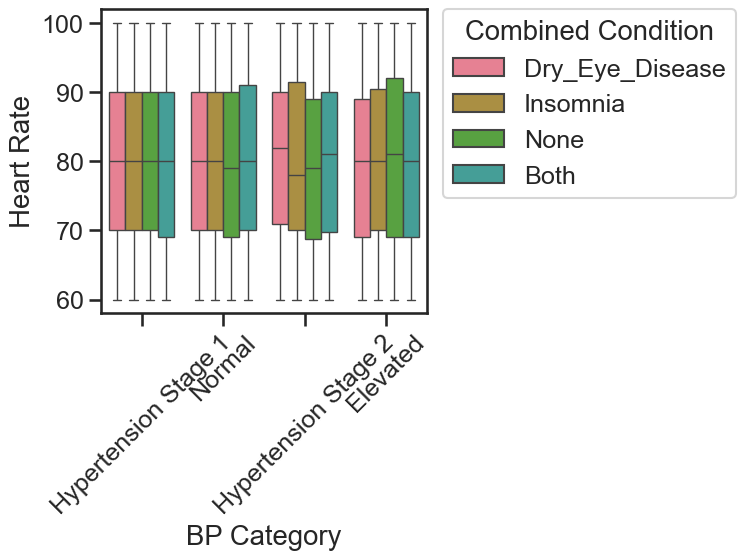

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


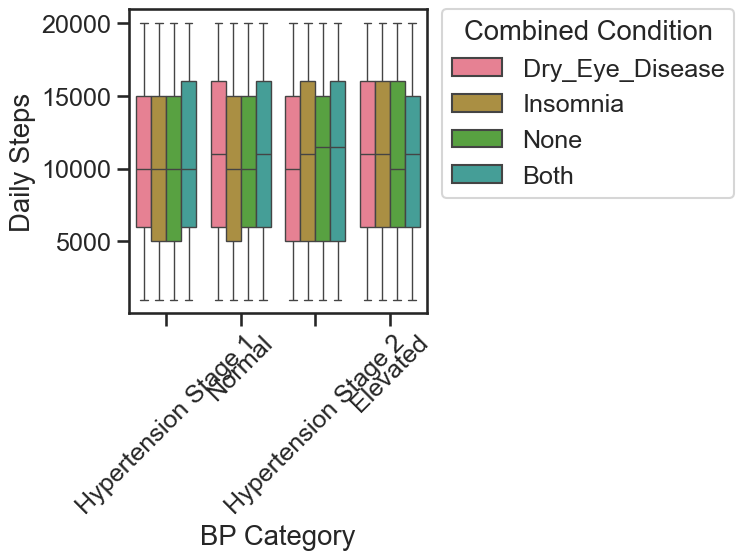

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


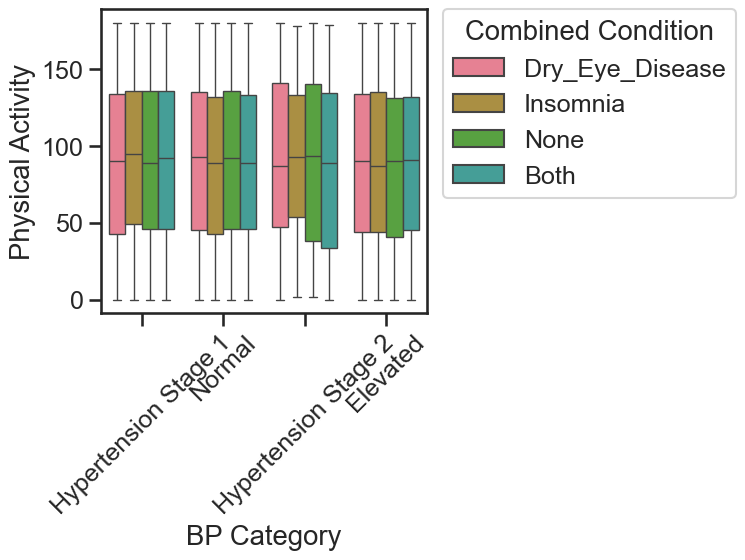

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


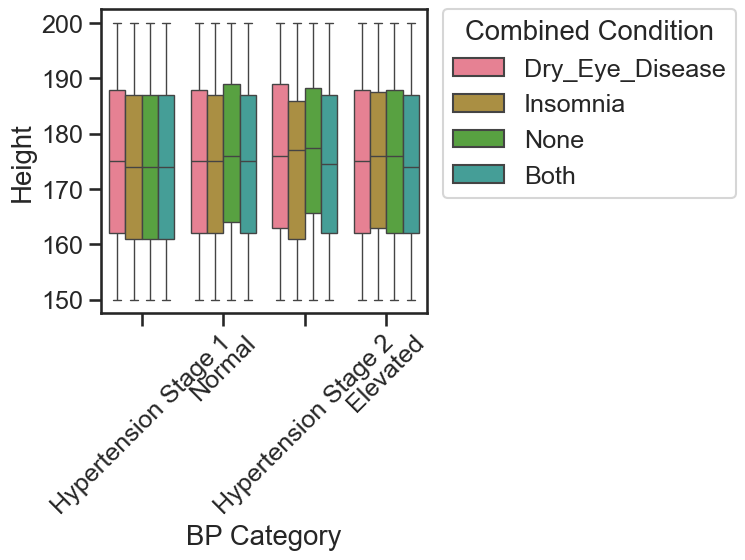

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


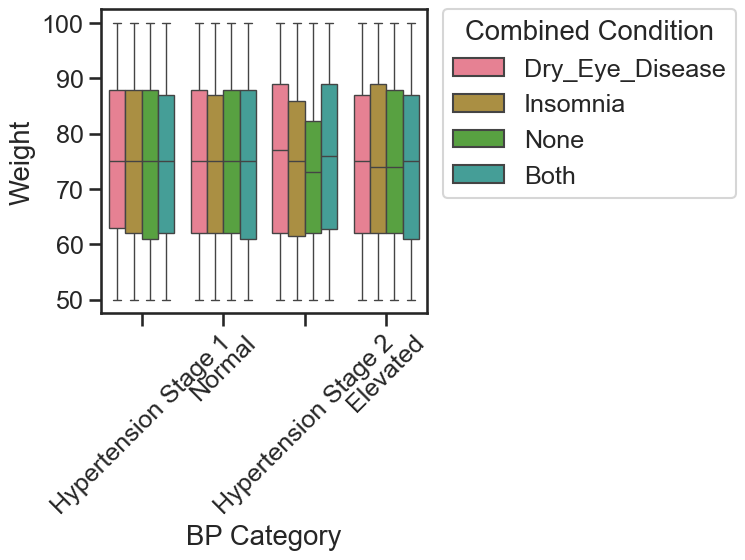

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


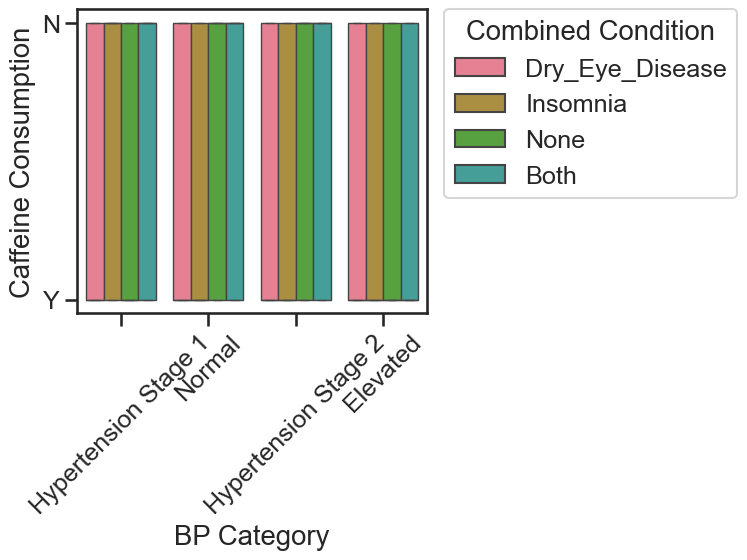

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


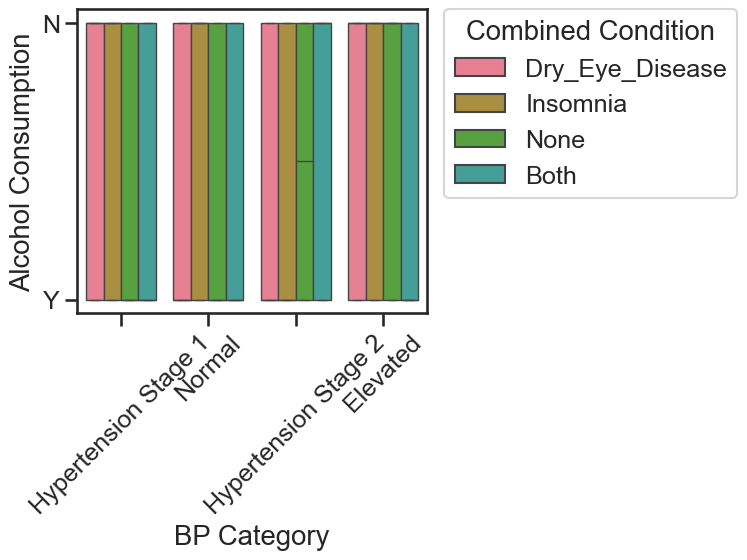

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


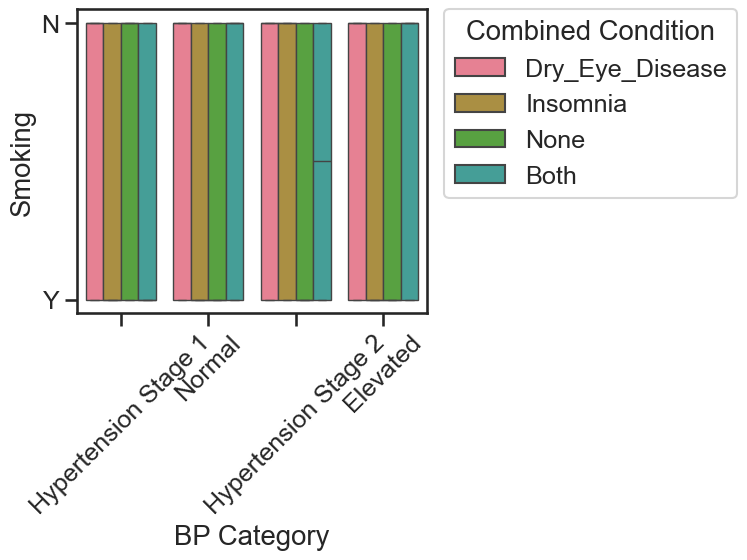

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


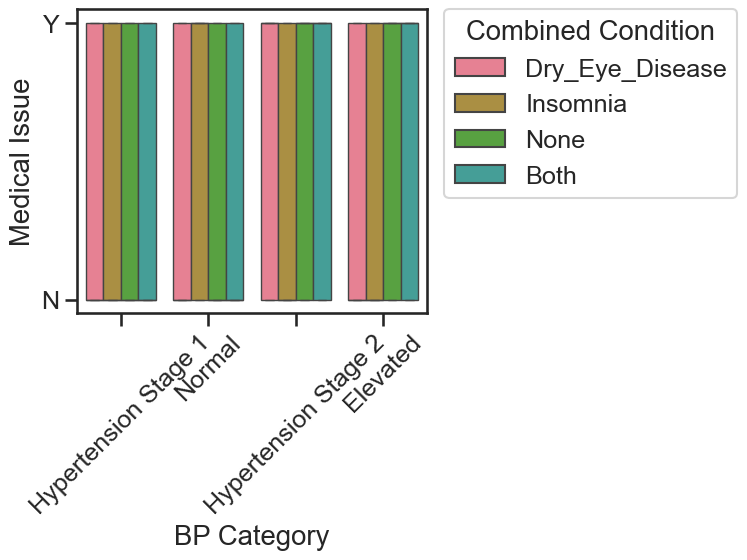

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


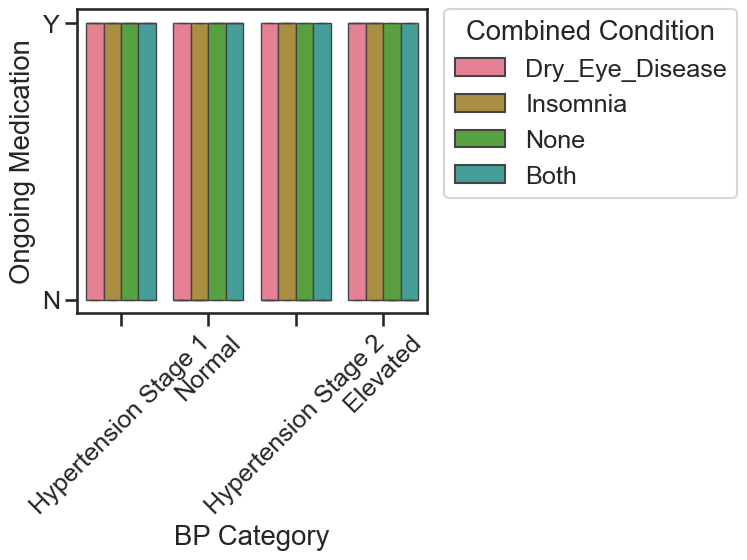

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


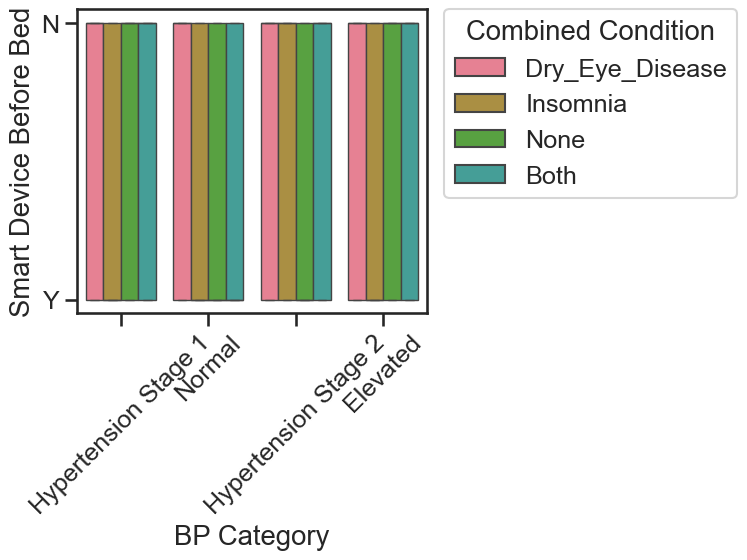

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


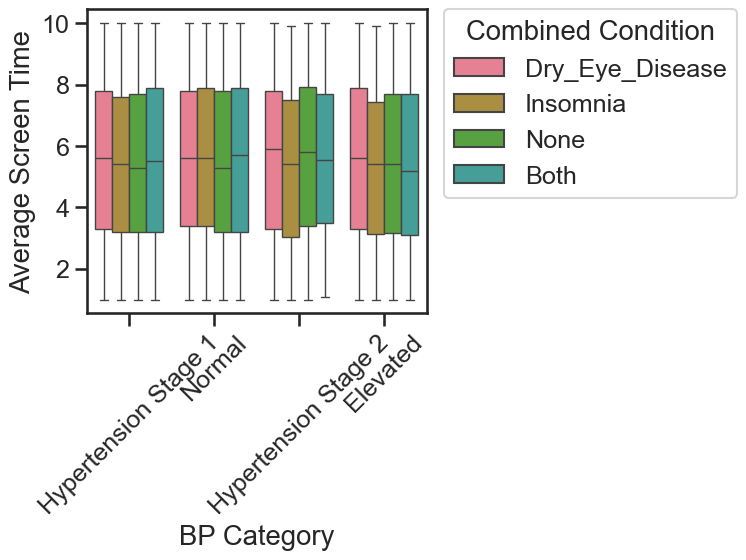

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


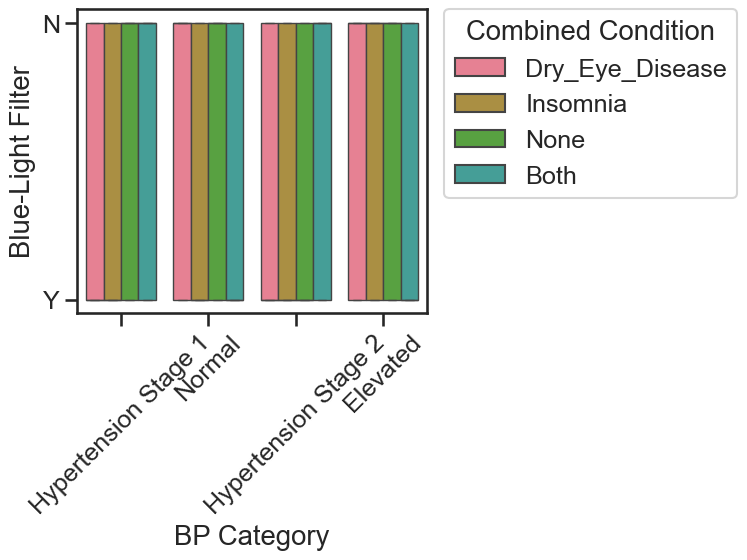

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


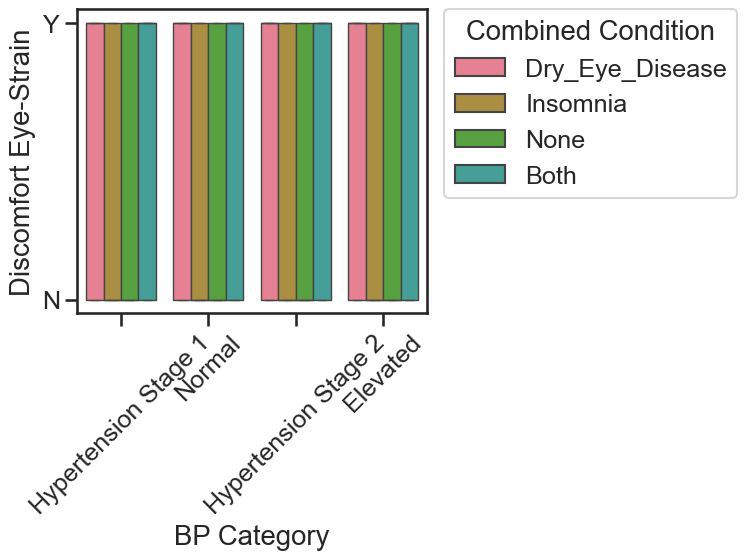

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


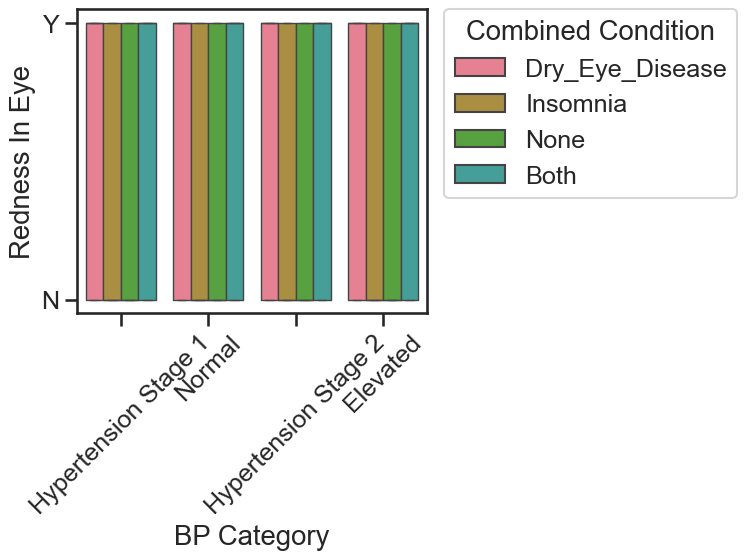

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


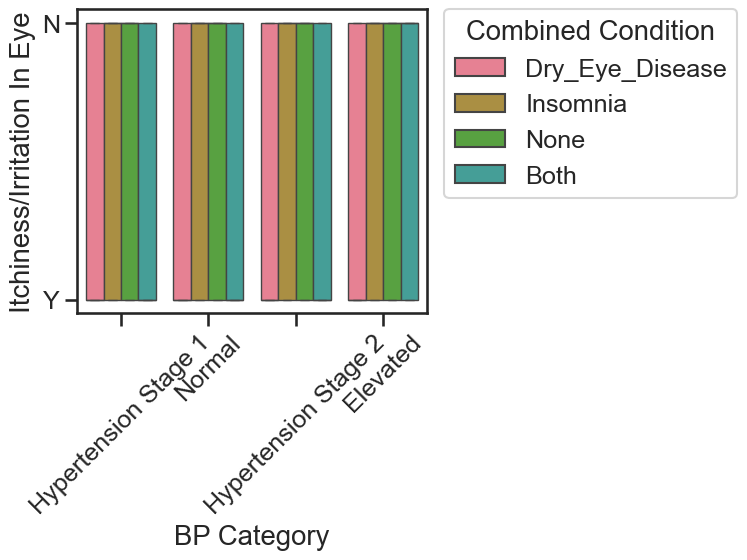

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


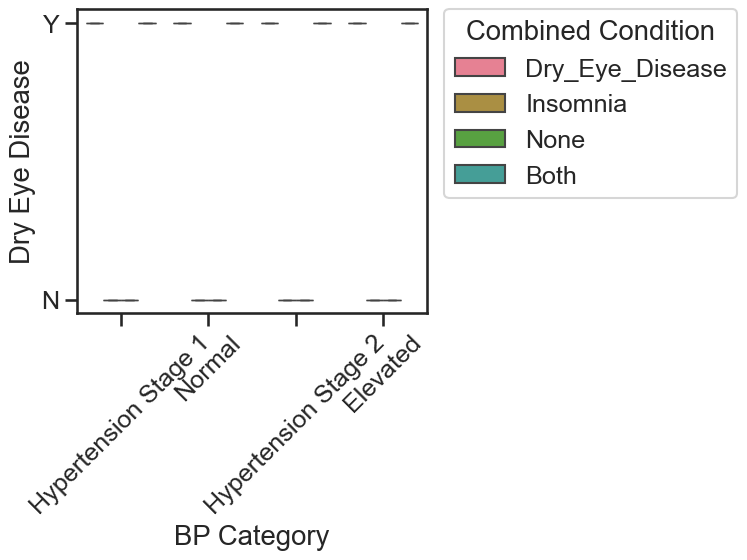

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_19259/1876571267.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(processed_labels)


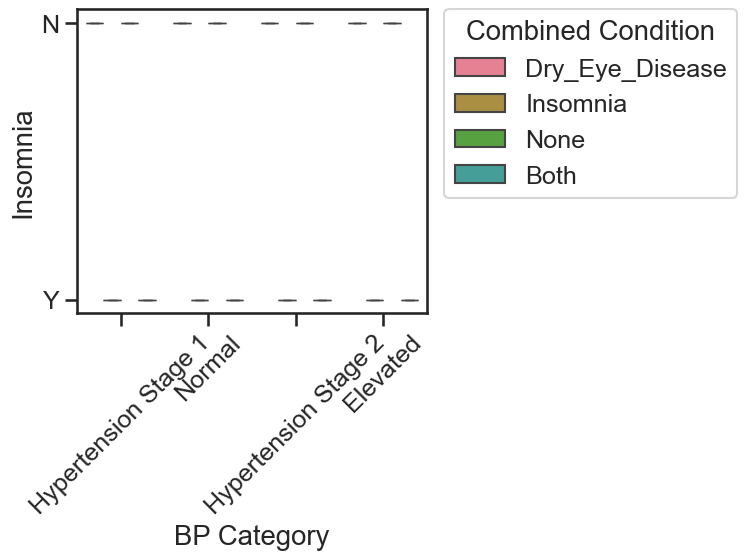

In [209]:
features_to_remove = ["bp_category", "combined_condition"]
features_to_remove.extend(features_for_bp_category)
features_to_remove.extend(features_for_insomnia)
list_dummy = feature_list.copy()
mod_list = remove_objects_from_list(list_dummy, features_to_remove)
for col in mod_list:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x="bp_category", y=col,
                hue="combined_condition",
                data=df)

    current_labels = ax.get_xticklabels()
    processed_labels = [label.get_text().replace('_', ' ').title() for label in current_labels]
    ax.set_xticklabels(processed_labels)

    #plt.title(f"Dry Eye Disease vs. {col.replace('_', ' ').title()} by Stress Level")
    plt.xticks(rotation=45)
    plt.xlabel("BP Category")
    plt.ylabel(col.replace('_', ' ').title())
    
    # Format legend labels to title case
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, [label.title() for label in labels], bbox_to_anchor=(1.05, 1),\
        loc='upper left', borderaxespad=0., title='Combined Condition')
    
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
#sns.despine(offset=10, trim=True)
